In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from pytrends.request import TrendReq
import pandas_datareader.data as web
import gdown

In [2]:
start_date = datetime(1939, 12, 29)

In [3]:
end_date = datetime(2024, 10, 1)

### SP500

In [4]:
sp500 = yf.download('%5ESPX', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [5]:
sp500.to_csv('sp500.csv')

In [5]:
sp500

Open         High          Low        Close    Adj Close  \
Date                                                                          
1939-12-29    12.460000    12.460000    12.460000    12.460000    12.460000   
1940-01-02    12.630000    12.630000    12.630000    12.630000    12.630000   
1940-01-03    12.770000    12.770000    12.770000    12.770000    12.770000   
1940-01-04    12.730000    12.730000    12.730000    12.730000    12.730000   
1940-01-05    12.660000    12.660000    12.660000    12.660000    12.660000   
...                 ...          ...          ...          ...          ...   
2024-09-24  5727.660156  5735.319824  5698.990234  5732.930176  5732.930176   
2024-09-25  5733.649902  5741.029785  5712.060059  5722.259766  5722.259766   
2024-09-26  5762.220215  5767.370117  5721.009766  5745.370117  5745.370117   
2024-09-27  5755.359863  5763.779785  5727.339844  5738.169922  5738.169922   
2024-09-30  5726.520020  5765.140137  5703.529785  5762.479980  5762.479980   

                Volume  
Date                    
1939-12-29           0  
1940-01-02           0  
1940-01-03           0  
1940-01-04           0  
1940-01-05           0  
...                ...  
2024-09-24  3872710000  
2024-09-25  3624910000  
2024-09-26  4391180000  
2024-09-27  3898530000  
2024-09-30  4425730000  

[21308 rows x 6 columns]

In [6]:
sp500_freq = sp500.asfreq('d')

In [7]:
sp500_filled = sp500_freq.ffill()

In [8]:
sp500_filled

Open         High          Low        Close    Adj Close  \
Date                                                                          
1939-12-29    12.460000    12.460000    12.460000    12.460000    12.460000   
1939-12-30    12.460000    12.460000    12.460000    12.460000    12.460000   
1939-12-31    12.460000    12.460000    12.460000    12.460000    12.460000   
1940-01-01    12.460000    12.460000    12.460000    12.460000    12.460000   
1940-01-02    12.630000    12.630000    12.630000    12.630000    12.630000   
...                 ...          ...          ...          ...          ...   
2024-09-26  5762.220215  5767.370117  5721.009766  5745.370117  5745.370117   
2024-09-27  5755.359863  5763.779785  5727.339844  5738.169922  5738.169922   
2024-09-28  5755.359863  5763.779785  5727.339844  5738.169922  5738.169922   
2024-09-29  5755.359863  5763.779785  5727.339844  5738.169922  5738.169922   
2024-09-30  5726.520020  5765.140137  5703.529785  5762.479980  5762.479980   

                  Volume  
Date                      
1939-12-29  0.000000e+00  
1939-12-30  0.000000e+00  
1939-12-31  0.000000e+00  
1940-01-01  0.000000e+00  
1940-01-02  0.000000e+00  
...                  ...  
2024-09-26  4.391180e+09  
2024-09-27  3.898530e+09  
2024-09-28  3.898530e+09  
2024-09-29  3.898530e+09  
2024-09-30  4.425730e+09  

[30958 rows x 6 columns]

In [9]:
sp500_filled_week = sp500_filled[sp500_filled.index.weekday == 4].copy()

In [10]:
sp500_filled_week.head(15)

Open   High    Low  Close  Adj Close  Volume
Date                                                     
1939-12-29  12.46  12.46  12.46  12.46      12.46     0.0
1940-01-05  12.66  12.66  12.66  12.66      12.66     0.0
1940-01-12  12.13  12.13  12.13  12.13      12.13     0.0
1940-01-19  12.15  12.15  12.15  12.15      12.15     0.0
1940-01-26  12.15  12.15  12.15  12.15      12.15     0.0
1940-02-02  12.06  12.06  12.06  12.06      12.06     0.0
1940-02-09  12.37  12.37  12.37  12.37      12.37     0.0
1940-02-16  12.29  12.29  12.29  12.29      12.29     0.0
1940-02-23  12.23  12.23  12.23  12.23      12.23     0.0
1940-03-01  12.06  12.06  12.06  12.06      12.06     0.0
1940-03-08  12.20  12.20  12.20  12.20      12.20     0.0
1940-03-15  12.07  12.07  12.07  12.07      12.07     0.0
1940-03-22  12.14  12.14  12.14  12.14      12.14     0.0
1940-03-29  12.18  12.18  12.18  12.18      12.18     0.0
1940-04-05  12.48  12.48  12.48  12.48      12.48     0.0

In [11]:
def calculate_obv(close, volume):
    # Calculate daily price changes
    price_change = np.diff(close)
    
    # Initialize OBV array with zeros
    obv = np.zeros(len(close))
    
    # Calculate OBV
    for i in range(1, len(close)):
        if price_change[i-1] > 0:
            obv[i] = obv[i-1] + volume[i]
        elif price_change[i-1] < 0:
            obv[i] = obv[i-1] - volume[i]
        else:
            obv[i] = obv[i-1]
    
    return obv

In [12]:
sp500_filled_week.loc[:, 'daily_returns'] = (sp500_filled_week['Close'] - sp500_filled_week['Close'].shift(1)) / sp500_filled_week['Close'].shift(1)

In [13]:
sp500_filled_week_2 = sp500_filled_week.copy()

In [14]:
sp500_filled_week_2.loc[:, 'obv'] = calculate_obv(sp500_filled_week_2['Close'], sp500_filled_week_2['Volume'])

In [15]:
sp500_filled_week_2

Open         High          Low        Close    Adj Close  \
Date                                                                          
1939-12-29    12.460000    12.460000    12.460000    12.460000    12.460000   
1940-01-05    12.660000    12.660000    12.660000    12.660000    12.660000   
1940-01-12    12.130000    12.130000    12.130000    12.130000    12.130000   
1940-01-19    12.150000    12.150000    12.150000    12.150000    12.150000   
1940-01-26    12.150000    12.150000    12.150000    12.150000    12.150000   
...                 ...          ...          ...          ...          ...   
2024-08-30  5612.740234  5651.370117  5581.790039  5648.399902  5648.399902   
2024-09-06  5507.330078  5522.470215  5402.620117  5408.419922  5408.419922   
2024-09-13  5603.339844  5636.270020  5601.649902  5626.020020  5626.020020   
2024-09-20  5709.640137  5715.140137  5674.490234  5702.549805  5702.549805   
2024-09-27  5755.359863  5763.779785  5727.339844  5738.169922  5738.169922   

                  Volume  daily_returns           obv  
Date                                                   
1939-12-29  0.000000e+00            NaN  0.000000e+00  
1940-01-05  0.000000e+00       0.016051  0.000000e+00  
1940-01-12  0.000000e+00      -0.041864  0.000000e+00  
1940-01-19  0.000000e+00       0.001649  0.000000e+00  
1940-01-26  0.000000e+00       0.000000  0.000000e+00  
...                  ...            ...           ...  
2024-08-30  4.185850e+09       0.002447  4.895737e+11  
2024-09-06  3.822800e+09      -0.042486  4.857509e+11  
2024-09-13  3.500790e+09       0.040234  4.892516e+11  
2024-09-20  7.867260e+09       0.013603  4.971189e+11  
2024-09-27  3.898530e+09       0.006246  5.010174e+11  

[4423 rows x 8 columns]

In [16]:
sp500_filled_week_2 = sp500_filled_week_2.dropna()

In [17]:
sp500_filled_week_2

Open         High          Low        Close    Adj Close  \
Date                                                                          
1940-01-05    12.660000    12.660000    12.660000    12.660000    12.660000   
1940-01-12    12.130000    12.130000    12.130000    12.130000    12.130000   
1940-01-19    12.150000    12.150000    12.150000    12.150000    12.150000   
1940-01-26    12.150000    12.150000    12.150000    12.150000    12.150000   
1940-02-02    12.060000    12.060000    12.060000    12.060000    12.060000   
...                 ...          ...          ...          ...          ...   
2024-08-30  5612.740234  5651.370117  5581.790039  5648.399902  5648.399902   
2024-09-06  5507.330078  5522.470215  5402.620117  5408.419922  5408.419922   
2024-09-13  5603.339844  5636.270020  5601.649902  5626.020020  5626.020020   
2024-09-20  5709.640137  5715.140137  5674.490234  5702.549805  5702.549805   
2024-09-27  5755.359863  5763.779785  5727.339844  5738.169922  5738.169922   

                  Volume  daily_returns           obv  
Date                                                   
1940-01-05  0.000000e+00       0.016051  0.000000e+00  
1940-01-12  0.000000e+00      -0.041864  0.000000e+00  
1940-01-19  0.000000e+00       0.001649  0.000000e+00  
1940-01-26  0.000000e+00       0.000000  0.000000e+00  
1940-02-02  0.000000e+00      -0.007407  0.000000e+00  
...                  ...            ...           ...  
2024-08-30  4.185850e+09       0.002447  4.895737e+11  
2024-09-06  3.822800e+09      -0.042486  4.857509e+11  
2024-09-13  3.500790e+09       0.040234  4.892516e+11  
2024-09-20  7.867260e+09       0.013603  4.971189e+11  
2024-09-27  3.898530e+09       0.006246  5.010174e+11  

[4422 rows x 8 columns]

In [18]:
sp500_filled_week = sp500_filled_week_2.copy()

In [19]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
import warnings
import torch

c:\Users\mgrad\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
print(torch.cuda.is_available())

True


In [21]:
from autogluon.timeseries.utils.forecast import get_forecast_horizon_index_ts_dataframe

### Trial

In [22]:
import pandas as pd
import numpy as np
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
from pandas.tseries.holiday import USFederalHolidayCalendar
import matplotlib.dates as mdates
from autogluon.timeseries.utils.forecast import get_forecast_horizon_index_ts_dataframe

In [23]:
from scipy.stats import pearsonr

In [24]:
def forecast_sp500(sp500_filled_week, forecast_year, train_years=[60, 40, 20, 1], train_all_years=False, every_10=False, forecast_months=12, find_most_correlated=False, month_offset=1):
    def prepare_data(data, start_date, end_date):
        data = data[['obv', 'daily_returns']].copy()
        data['item_id'] = 'obv'
        data.rename(columns={'obv': 'target'}, inplace=True)
        data['timestamp'] = pd.to_datetime(data.index)
        data.reset_index(drop=True, inplace=True)
        
        # Set the frequency to weekly (Friday)
        data.set_index('timestamp', inplace=True)
        # data = data.asfreq('W-FRI')
        data = data.asfreq('W-FRI').dropna()
        data.reset_index(inplace=True)
        
        ts_data = TimeSeriesDataFrame.from_data_frame(
            data,
            id_column='item_id',
            timestamp_column='timestamp'
        )
        
        return ts_data

    # def train_and_predict(train_data, prediction_length, known_covariates):
    def train_and_predict(train_data, prediction_length):
        predictor = TimeSeriesPredictor(
            prediction_length=prediction_length,
            target="target",
            # known_covariates_names=["weekend", "holiday"],
            path='model',
            eval_metric='MSE',
            freq = 'W-FRI',
            verbosity=2
        )
        predictor = predictor.fit(
            train_data,
            hyperparameters={
                "Chronos": {
                    "model_path": "base",
                    "batch_size": 64,
                    "device": "cuda",
                }
            },
            verbosity=0,
        )
        # return predictor.predict(train_data, known_covariates=known_covariates)
        return predictor.predict(train_data)

    def find_correlated_years(full_train_data, current_data, n_years=3):
        correlations = []

        str_date = full_train_data.index[0]
        nd_date = full_train_data.index[-1]

        current_str_date = current_data.index.get_level_values('timestamp')[0]
        current_nd_date = current_data.index.get_level_values('timestamp')[-1]

        # print("str_date", str_date)
        # print("nd_date", nd_date)

        # print("current_str_date", current_str_date)
        # print("current_nd_date", current_nd_date)
        for year in range(full_train_data.index[0].year, forecast_year):
            # print("year", year)

            current_data = full_train_data.loc[current_str_date:current_nd_date]['obv']

            len_data = len(current_data)


            historical_start = f'{year}-01-01'
            historical_end = full_train_data.loc[historical_start:].index[len_data - 1]
            historical_data = full_train_data.loc[historical_start:historical_end]['obv']

            current_data_normalized = (current_data - current_data.mean()) / current_data.std()
            historical_data_normalized = (historical_data - historical_data.mean()) / historical_data.std()
            # print("current_data_normalized", current_data_normalized)
            # print("historical_data_normalized", historical_data_normalized)

            correlation, _ = pearsonr(current_data_normalized, historical_data_normalized)
            correlations.append((year, correlation))
        
        # Sort correlations and get the top correlated years
        top_correlated = sorted(correlations, key=lambda x: x[1], reverse=True)[:n_years]
        print(f"Top correlated years: {top_correlated}")
        return [year for year, _ in top_correlated]

    results = []
    errors = []
    current_year_data = []

    for month in range(1, forecast_months + 1):
        forecast_date = pd.Timestamp(f"{forecast_year}-{month:02d}-01")
        
        if not find_most_correlated or month == 1:
            # Use the default train_years approach
            train_data_list = []
            if every_10:
                n = (forecast_year - sp500_filled_week.index.year.min()) // 10
                train_years = [i*10 for i in range(n, -1, -1)]
                train_years.append(1)
            
            for years_back in train_years:
                train_start = forecast_date - pd.DateOffset(years=years_back)
                train_end = train_start + pd.DateOffset(years=1) - pd.DateOffset(days=1)
                train_data = sp500_filled_week[
                    (sp500_filled_week.index >= train_start) & 
                    (sp500_filled_week.index <= train_end)
                ]
                train_data_list.append(train_data)
            combined_train_data = pd.concat(train_data_list)
        else:
            correlated_years = find_correlated_years(sp500_filled_week, pd.concat(results), 3)
            train_data_list = [sp500_filled_week[sp500_filled_week.index.year == year] for year in correlated_years]

            train_start = forecast_date - pd.DateOffset(years=1)
            train_end = train_start + pd.DateOffset(years=1) - pd.DateOffset(days=1)
            train_data = sp500_filled_week[
                (sp500_filled_week.index >= train_start) & 
                (sp500_filled_week.index <= train_end)
                ]
            train_data_list.append(train_data)
            combined_train_data = pd.concat(train_data_list)

        if train_all_years:
            combined_train_data = sp500_filled_week[sp500_filled_week.index.year != forecast_year]
        
        # Prepare the combined data
        prepared_data = prepare_data(combined_train_data, combined_train_data.index.min(), combined_train_data.index.max())

        # print("prepared_data", prepared_data)
        
        # Prepare forecast period
        forecast_end = forecast_date + pd.DateOffset(months=month_offset) - pd.DateOffset(days=1)
        prediction_length = len(pd.date_range(forecast_date, forecast_end, freq='W-FRI'))
        
        forecast = train_and_predict(prepared_data, prediction_length)
        # print("forecast", forecast)
        
        # Calculate error
        actual_values = sp500_filled_week[
            (sp500_filled_week.index >= forecast_date) & 
            (sp500_filled_week.index <= forecast_end)
        ]['obv'].values
        predicted_values = forecast["mean"].values
        print("actual_values", actual_values)
        print("predicted_values", predicted_values)
        if actual_values.shape[0] == predicted_values.shape[0]: 
            error = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100
            errors.append(error)
        
        results.append(forecast)
        

        if find_most_correlated:
            current_year_data.extend(actual_values)
    
    # Combine all monthly forecasts
    final_forecast = pd.concat(results)
    
    # Visualize results
    import matplotlib.pyplot as plt
    plt.figure(figsize=(15, 10))
    actual_data = sp500_filled_week[sp500_filled_week.index.year == forecast_year]['obv']
    plt.plot(actual_data.index, actual_data.values, label='Actual')
    plt.plot(final_forecast.index.get_level_values('timestamp'), final_forecast["mean"].values, label='Forecast')
    
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show month ticks
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as 'Month Year'

    # Rotate and align the x-axis labels for better readability
    plt.gcf().autofmt_xdate()

    # Add title, labels, and legend
    plt.title(f'S&P 500 Forecast for {forecast_year}')
    plt.xlabel('Date')
    plt.ylabel('S&P 500 obv Price')
    plt.legend()
    plt.show()
    
    if len(errors) > 0:
        print(f"Average Error Rate: {np.mean(errors):.2f}%")
    
    return final_forecast, errors

## 60 40 20

### 2024

actual_values [4.6107393e+11 4.6456027e+11 4.6884747e+11 4.7220087e+11]
predicted_values [4.67326206e+11 4.65891295e+11 4.68442317e+11 4.69398979e+11]


actual_values [4.7617522e+11 4.8008821e+11 4.7625494e+11 4.7992773e+11]
predicted_values [4.74153845e+11 4.73510773e+11 4.75600945e+11 4.76243984e+11]


actual_values [4.8467584e+11 4.8046697e+11 4.7271330e+11 4.7608800e+11 4.8008627e+11]
predicted_values [4.81604043e+11 4.81928839e+11 4.82578629e+11 4.82578596e+11
 4.81279181e+11]


actual_values [4.7669949e+11 4.7273627e+11 4.6885752e+11 4.7246166e+11]
predicted_values [4.81139294e+11 4.80317178e+11 4.80646005e+11 4.81961509e+11]


actual_values [4.7638665e+11 4.8000455e+11 4.8358267e+11 4.8658818e+11 4.8115102e+11]
predicted_values [4.75110474e+11 4.77595337e+11 4.78754898e+11 4.79914525e+11
 4.80742736e+11]


actual_values [4.8484378e+11 4.8828243e+11 4.9505623e+11 4.8785701e+11]
predicted_values [4.82155758e+11 4.83494625e+11 4.82992521e+11 4.83996631e+11]


actual_values [4.9111009e+11 4.9481037e+11 4.9104980e+11 4.8741103e+11]
predicted_values [4.91220828e+11 4.91558601e+11 4.92233720e+11 4.93077725e+11]


actual_values [4.8225458e+11 4.7873818e+11 4.8209587e+11 4.8538781e+11 4.8957366e+11]
predicted_values [4.86729908e+11 4.87920337e+11 4.87069942e+11 4.87750205e+11
 4.89961030e+11]


actual_values [4.8575086e+11 4.8925165e+11 4.9711891e+11 5.0101744e+11]
predicted_values [4.89747808e+11 4.91460755e+11 4.91118133e+11 4.91632034e+11]
actual_values []
predicted_values [5.04156062e+11 5.04502223e+11 5.04502223e+11 5.05886802e+11]


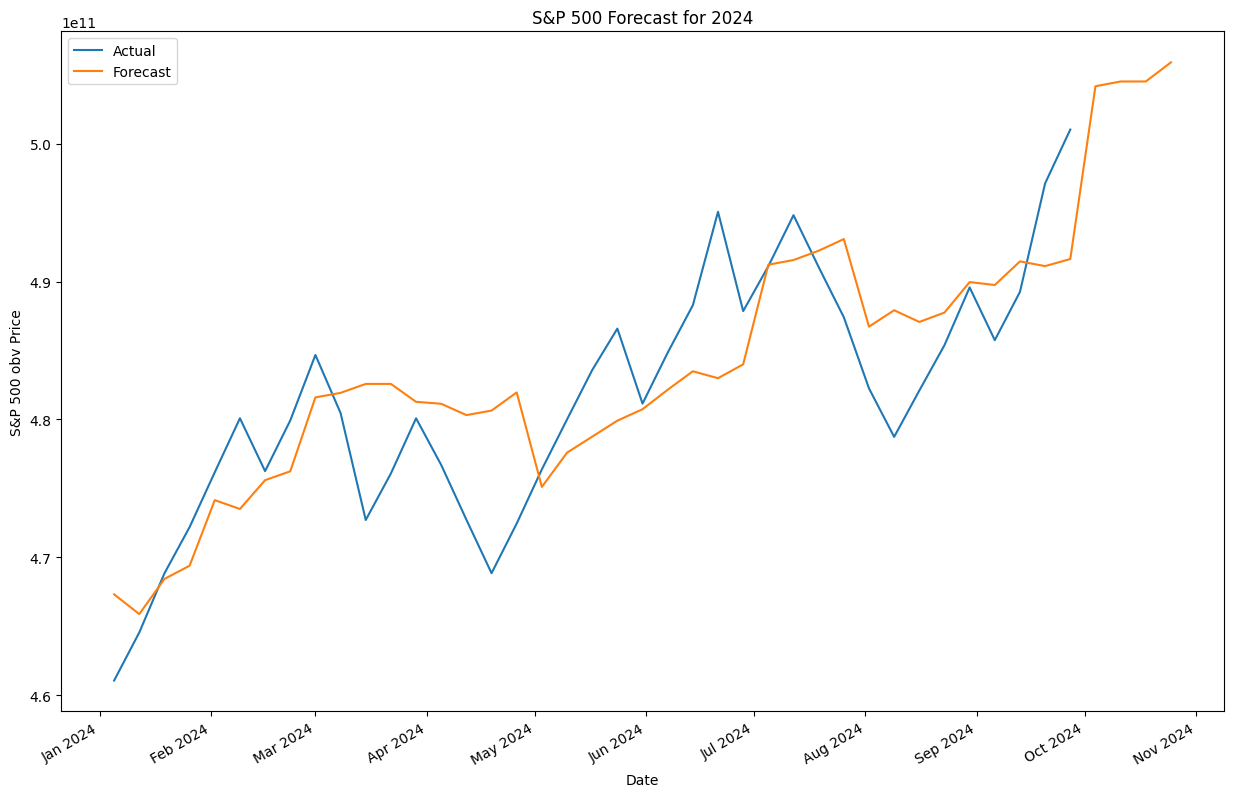

Average Error Rate: 0.92%


In [25]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2024, train_years=[60, 40, 20, 1], forecast_months=10)

### 2023 60, 40, 20

actual_values [4.1715260e+11 4.2109230e+11 4.1707894e+11 4.2098670e+11]
predicted_values [4.10309755e+11 4.13059219e+11 4.15808553e+11 4.16940687e+11]


actual_values [4.2568121e+11 4.2178969e+11 4.1774421e+11 4.1386651e+11]
predicted_values [4.19711975e+11 4.19230745e+11 4.19391209e+11 4.20032938e+11]


actual_values [4.1795124e+11 4.1243305e+11 4.2178733e+11 4.2637130e+11 4.3089642e+11]
predicted_values [4.13711925e+11 4.14030299e+11 4.14348673e+11 4.15622136e+11
 4.17532346e+11]


actual_values [4.2740973e+11 4.3098542e+11 4.2737367e+11 4.3146147e+11]
predicted_values [4.29845774e+11 4.28581487e+11 4.31109997e+11 4.29845742e+11]


actual_values [4.2727520e+11 4.2374146e+11 4.2778336e+11 4.3149882e+11]
predicted_values [4.32349643e+11 4.31251522e+11 4.32663396e+11 4.31408382e+11]


actual_values [4.3595302e+11 4.3973953e+11 4.4658813e+11 4.4053451e+11 4.4445796e+11]
predicted_values [4.32271426e+11 4.31645688e+11 4.33523065e+11 4.33679499e+11
 4.36339147e+11]


actual_values [4.4082748e+11 4.4447493e+11 4.4804512e+11 4.5202613e+11]
predicted_values [4.43899609e+11 4.44056371e+11 4.44369928e+11 4.45624254e+11]


actual_values [4.4788282e+11 4.4412953e+11 4.4018913e+11 4.4348531e+11]
predicted_values [4.50786066e+11 4.52043538e+11 4.50943255e+11 4.51100377e+11]


actual_values [4.4673157e+11 4.4347228e+11 4.3654005e+11 4.3319048e+11 4.2932452e+11]
predicted_values [4.42364527e+11 4.41892733e+11 4.41735447e+11 4.42049921e+11
 4.42049954e+11]


actual_values [4.3322655e+11 4.3679311e+11 4.3278908e+11 4.2876958e+11]
predicted_values [4.28765381e+11 4.27031986e+11 4.26874372e+11 4.27347116e+11]


actual_values [4.3334054e+11 4.3700562e+11 4.4078286e+11 4.4242236e+11]
predicted_values [4.30101266e+11 4.29154206e+11 4.31206007e+11 4.29785547e+11]
actual_values [4.4681948e+11 4.5052649e+11 4.5874547e+11 4.6179224e+11 4.6491830e+11]
predicted_values [4.42462994e+11 4.42779369e+11 4.42146587e+11 4.43412120e+11
 4.43728462e+11]


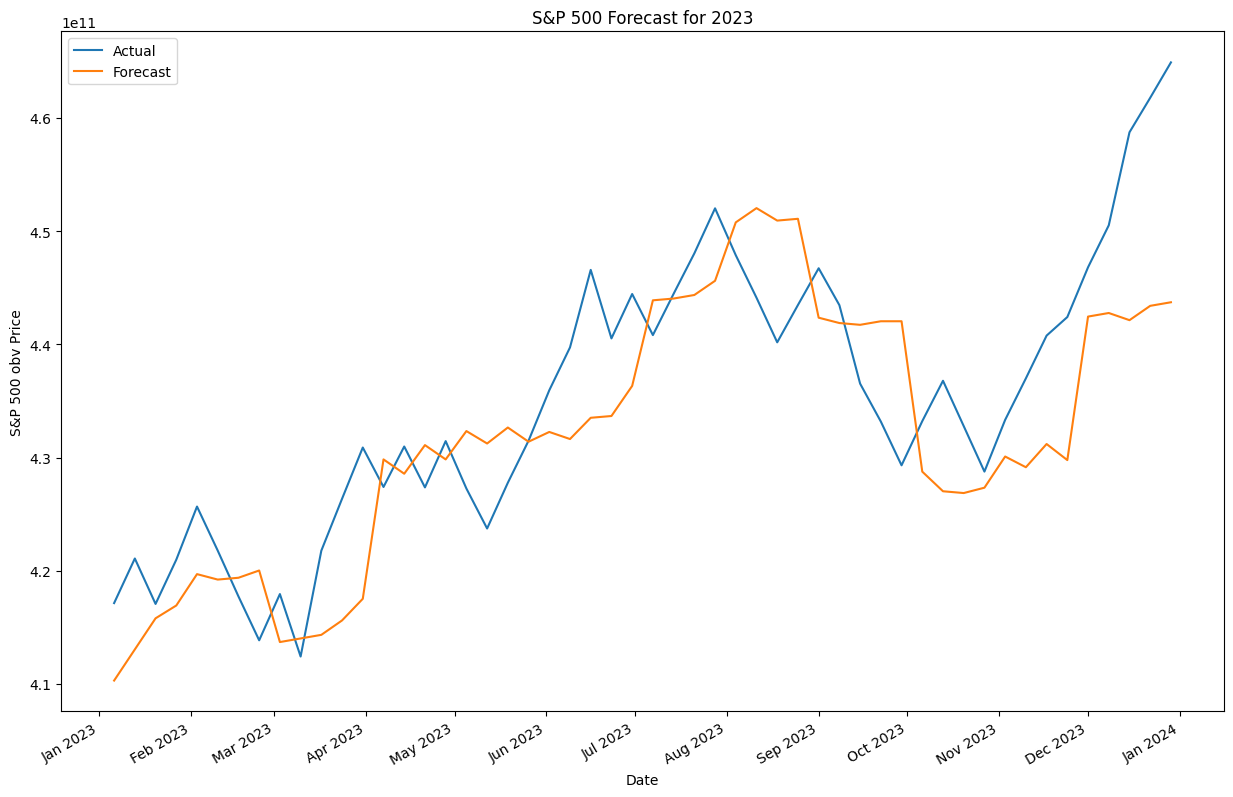

Average Error Rate: 1.45%


In [26]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2023, train_years=[60, 40, 20, 1], forecast_months=12)

### 2023 60, 20

actual_values [3895.08007812 3999.09008789 3972.61010742 4070.56005859]
predicted_values [3823.56640625 3853.55517578 3883.54382324 3913.53259277]


actual_values [4136.47998047 4090.45996094 4079.09008789 3970.04003906]
predicted_values [4035.66992188 4050.50598145 3946.64404297 4035.66992188]


actual_values [4045.63989258 3861.59008789 3916.63989258 3970.98999023 4109.31005859]
predicted_values [3920.83056641 3891.35253906 3861.87084961 3906.09155273 3920.83251953]


actual_values [4105.02001953 4137.64013672 4133.52001953 4169.47998047]
predicted_values [4095.11694336 4138.99414062 4212.12207031 4168.24487305]


actual_values [4136.25       4124.08007812 4191.97998047 4205.45019531]
predicted_values [4156.76269531 4113.15917969 4011.41967773 3924.21679688]


actual_values [4282.37011719 4298.85986328 4409.58984375 4348.33007812 4450.37988281]
predicted_values [4122.15527344 4107.59033203 4078.45678711 4078.45678711 4194.98388672]


actual_values [4398.95019531 4505.41992188 4536.33984375 4582.22998047]
predicted_values [4445.27832031 4474.71533203 4533.59326172 4474.71533203]


actual_values [4478.02978516 4464.04980469 4369.70996094 4405.70996094]
predicted_values [4584.80371094 4599.69018555 4569.91894531 4569.91894531]


actual_values [4515.77001953 4457.49023438 4450.31982422 4320.06005859 4288.04980469]
predicted_values [4427.16699219 4397.25585938 4442.12451172 4457.08203125 4486.99365234]


actual_values [4308.5        4327.77978516 4224.16015625 4117.37011719]
predicted_values [4275.18554688 4275.18554688 4244.86279297 4244.86279297]


actual_values [4358.33984375 4415.24023438 4514.02001953 4559.33984375]
predicted_values [4072.02001953 4041.40527344 4041.40332031 4072.02001953]
actual_values [4594.62988281 4604.37011719 4719.18994141 4754.62988281 4769.83007812]
predicted_values [4559.46899414 4513.10058594 4559.46899414 4544.01416016 4544.01416016]


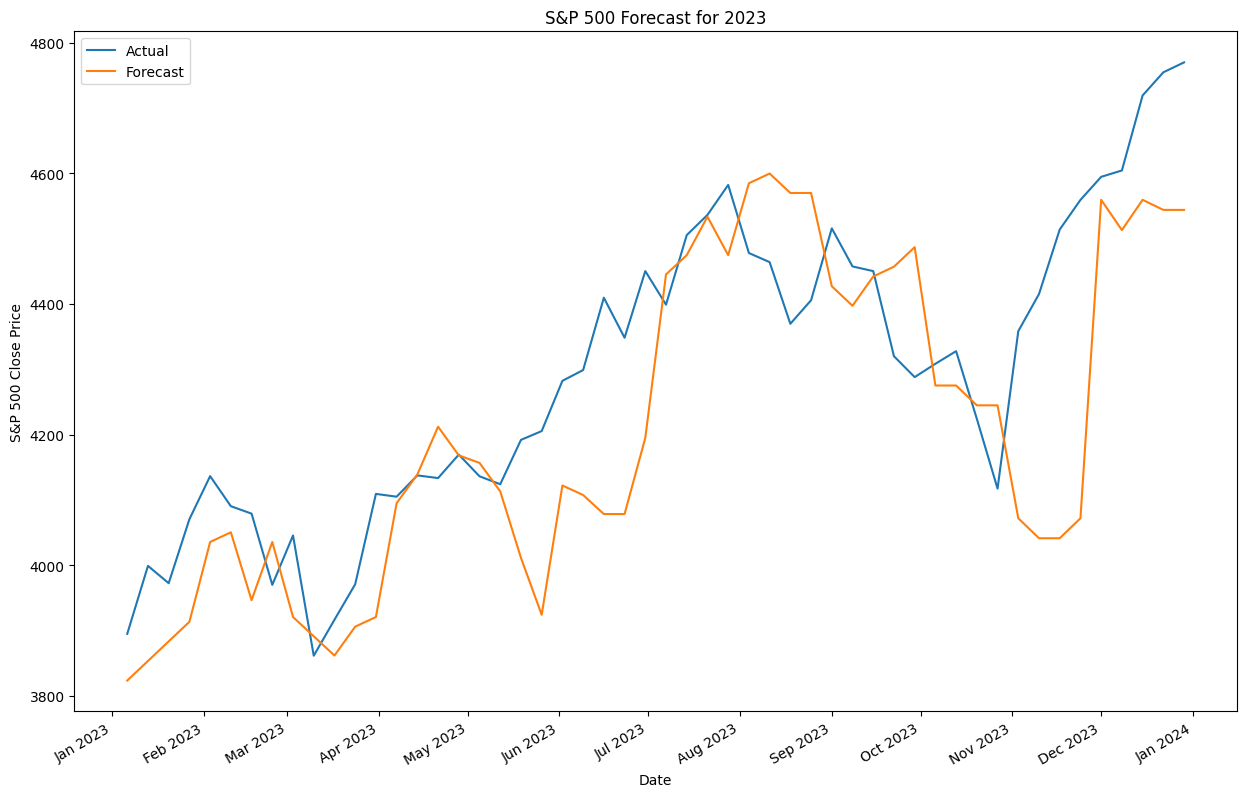

Average Error Rate: 3.04%


In [50]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2023, train_years=[60, 20, 1], forecast_months=12)

### 2022 60, 40, 20

actual_values [4.6961428e+11 4.6527579e+11 4.5968669e+11 4.6471778e+11]
predicted_values [4.76936143e+11 4.75262583e+11 4.75262583e+11 4.78609703e+11]


actual_values [4.6942407e+11 4.6417257e+11 4.5946451e+11 4.6464157e+11]
predicted_values [4.64668459e+11 4.64668459e+11 4.64668459e+11 4.64668459e+11]


actual_values [4.5884419e+11 4.5390555e+11 4.6218398e+11 4.6648900e+11]
predicted_values [4.61888160e+11 4.60196151e+11 4.63580168e+11 4.60196381e+11]


actual_values [4.7105194e+11 4.6696874e+11 4.6288565e+11 4.5823371e+11 4.5314968e+11]
predicted_values [4.63736226e+11 4.62037451e+11 4.65435001e+11 4.67133546e+11
 4.63736226e+11]


actual_values [4.4803274e+11 4.4284940e+11 4.3771867e+11 4.4209429e+11]
predicted_values [4.53321949e+11 4.53321949e+11 4.53321949e+11 4.53321949e+11]


actual_values [4.3838318e+11 4.3349354e+11 4.2497280e+11 4.3309306e+11]
predicted_values [4.44219638e+11 4.44219638e+11 4.44219638e+11 4.49325728e+11]


actual_values [4.2904611e+11 4.3256773e+11 4.2842393e+11 4.3240317e+11 4.3701953e+11]
predicted_values [4.30586462e+11 4.33977131e+11 4.37367341e+11 4.40758010e+11
 4.44148253e+11]


actual_values [4.4110547e+11 4.4489348e+11 4.4113214e+11 4.3729939e+11]
predicted_values [4.37795160e+11 4.37795160e+11 4.36111213e+11 4.37795160e+11]


actual_values [4.3363354e+11 4.3753548e+11 4.2958083e+11 4.2443656e+11 4.1879120e+11]
predicted_values [4.35851788e+11 4.35851788e+11 4.34175328e+11 4.35851788e+11
 4.37528035e+11]


actual_values [4.2324086e+11 4.1899783e+11 4.2407585e+11 4.2853526e+11]
predicted_values [4.15970460e+11 4.20962206e+11 4.24289960e+11 4.27617731e+11]


actual_values [4.2313508e+11 4.2872839e+11 4.2469103e+11 4.2639749e+11]
predicted_values [4.29100499e+11 4.30750777e+11 4.30750777e+11 4.34051547e+11]
actual_values [4.3041011e+11 4.2652185e+11 4.1902819e+11 4.1620891e+11 4.1322904e+11]
predicted_values [4.25195209e+11 4.26830463e+11 4.26830463e+11 4.30101185e+11
 4.30101185e+11]


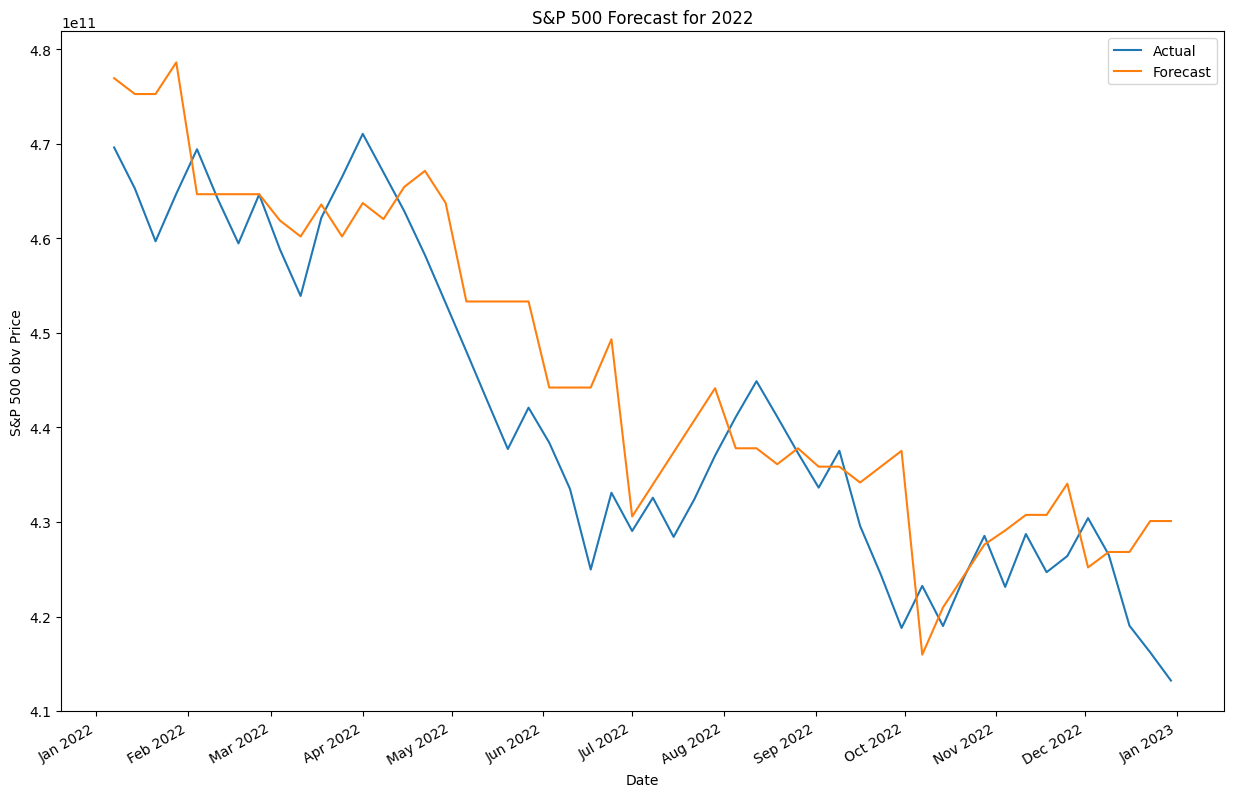

Average Error Rate: 1.58%


In [44]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2022, train_years=[60, 40, 20, 1], forecast_months=12)

### 2022 60, 20

actual_values [4677.02978516 4662.85009766 4397.93994141 4431.85009766]
predicted_values [4762.43066406 4762.43066406 4809.42944336 4762.43066406]


actual_values [4500.52978516 4418.64013672 4348.87011719 4384.64990234]
predicted_values [4456.29589844 4440.3815918  4392.63476562 4440.3815918 ]


actual_values [4328.87011719 4204.31005859 4463.12011719 4543.06005859]
predicted_values [4369.49169922 4385.55712891 4353.42871094 4369.49389648]


actual_values [4545.85986328 4488.27978516 4392.58984375 4271.77978516 4131.93017578]
predicted_values [4534.84667969 4518.65185547 4470.06298828 4470.06298828 4486.26000977]


actual_values [4123.33984375 4023.88989258 3901.36010742 4158.24023438]
predicted_values [4134.07373047 4166.62792969 4215.4543457  4199.17724609]


actual_values [4108.54003906 3900.86010742 3674.84008789 3911.73999023]
predicted_values [4124.05419922 4156.52929688 4107.81884766 4059.11071777]


actual_values [3825.33007812 3899.37988281 3863.15991211 3961.62988281 4130.29003906]
predicted_values [3874.27026367 3906.55371094 3906.55371094 3922.69763184 3971.12487793]


actual_values [4145.18994141 4280.14990234 4228.47998047 4057.65991211]
predicted_values [4141.24682617 4093.27978516 4093.27758789 4109.26806641]


actual_values [3924.26000977 4067.36010742 3873.33007812 3693.22998047 3585.62011719]
predicted_values [3977.17871094 4072.63305664 4072.63098145 4088.54064941 4120.3581543 ]


actual_values [3639.65991211 3583.07006836 3752.75       3901.06005859]
predicted_values [3625.72827148 3735.59790039 3766.99145508 3751.29467773]


actual_values [3770.55004883 3992.92993164 3965.34008789 4026.12011719]
predicted_values [3851.87756348 3944.69396973 3898.28686523 3867.34802246]
actual_values [4071.69995117 3934.37988281 3852.36010742 3844.82006836 3839.5       ]
predicted_values [4014.34912109 3968.55908203 3968.55908203 4029.61376953 4029.61376953]


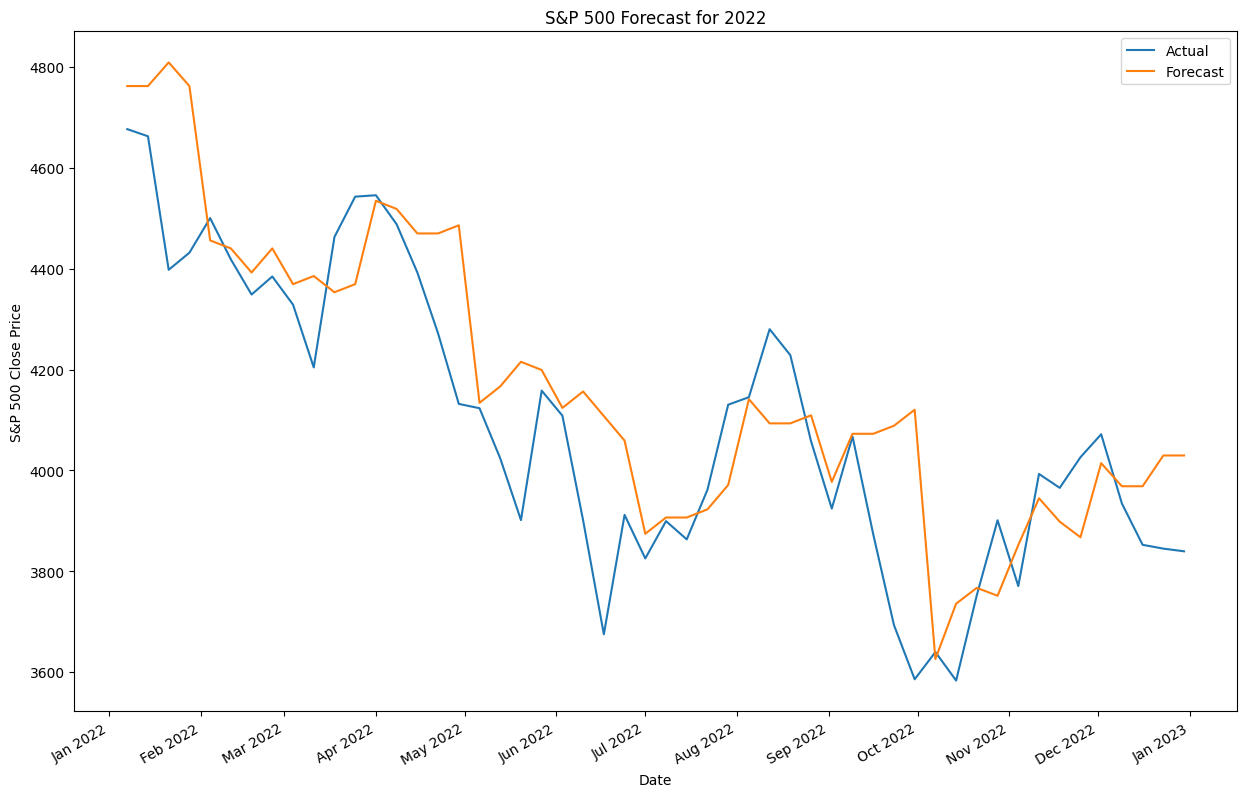

Average Error Rate: 3.22%


In [52]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2022, train_years=[60, 20, 1], forecast_months=12)

### 2021 60, 40, 20

actual_values [4.3313495e+11 4.3790799e+11 4.3253817e+11 4.3764906e+11 4.3100569e+11]
predicted_values [4.29425328e+11 4.27923751e+11 4.26422174e+11 4.26422174e+11
 4.30926725e+11]


actual_values [4.3588516e+11 4.4002022e+11 4.3517490e+11 4.2864883e+11]
predicted_values [4.32434446e+11 4.30922334e+11 4.29410222e+11 4.29410222e+11]


actual_values [4.3549990e+11 4.3997618e+11 4.3221876e+11 4.3770192e+11]
predicted_values [4.30439891e+11 4.28918997e+11 4.31960785e+11 4.31960785e+11]


actual_values [4.4186405e+11 4.4550444e+11 4.4966826e+11 4.4609838e+11 4.5039926e+11]
predicted_values [4.38505964e+11 4.38505964e+11 4.36972634e+11 4.36972634e+11
 4.41572262e+11]


actual_values [4.5441534e+11 4.5040646e+11 4.4641121e+11 4.5106046e+11]
predicted_values [4.49570865e+11 4.51121005e+11 4.52671144e+11 4.55771849e+11]


actual_values [4.5520025e+11 4.5901526e+11 4.5219825e+11 4.5953970e+11]
predicted_values [4.51847324e+11 4.51847324e+11 4.48709722e+11 4.50278523e+11]


actual_values [4.6276554e+11 4.6629666e+11 4.6231096e+11 4.6685103e+11 4.6289429e+11]
predicted_values [4.62324204e+11 4.59157832e+11 4.62324204e+11 4.62324204e+11
 4.59157832e+11]


actual_values [4.6634616e+11 4.6936263e+11 4.6571002e+11 4.6904122e+11]
predicted_values [4.64511730e+11 4.64511730e+11 4.64511730e+11 4.61308002e+11]


actual_values [4.7225875e+11 4.6863557e+11 4.6134604e+11 4.6473033e+11]
predicted_values [4.71192830e+11 4.67965706e+11 4.71192830e+11 4.71192830e+11]


actual_values [4.6071996e+11 4.6400012e+11 4.6781950e+11 4.7157772e+11 4.7608792e+11]
predicted_values [4.68605469e+11 4.71859855e+11 4.66978472e+11 4.71859855e+11
 4.75113849e+11]


actual_values [4.8055510e+11 4.7682650e+11 4.8107968e+11 4.7756198e+11]
predicted_values [4.76840296e+11 4.76840296e+11 4.78484464e+11 4.80128631e+11]
actual_values [4.7232191e+11 4.7619202e+11 4.6820493e+11 4.7111797e+11 4.7379579e+11]
predicted_values [4.81430405e+11 4.79770198e+11 4.81430405e+11 4.79770198e+11
 4.79770198e+11]


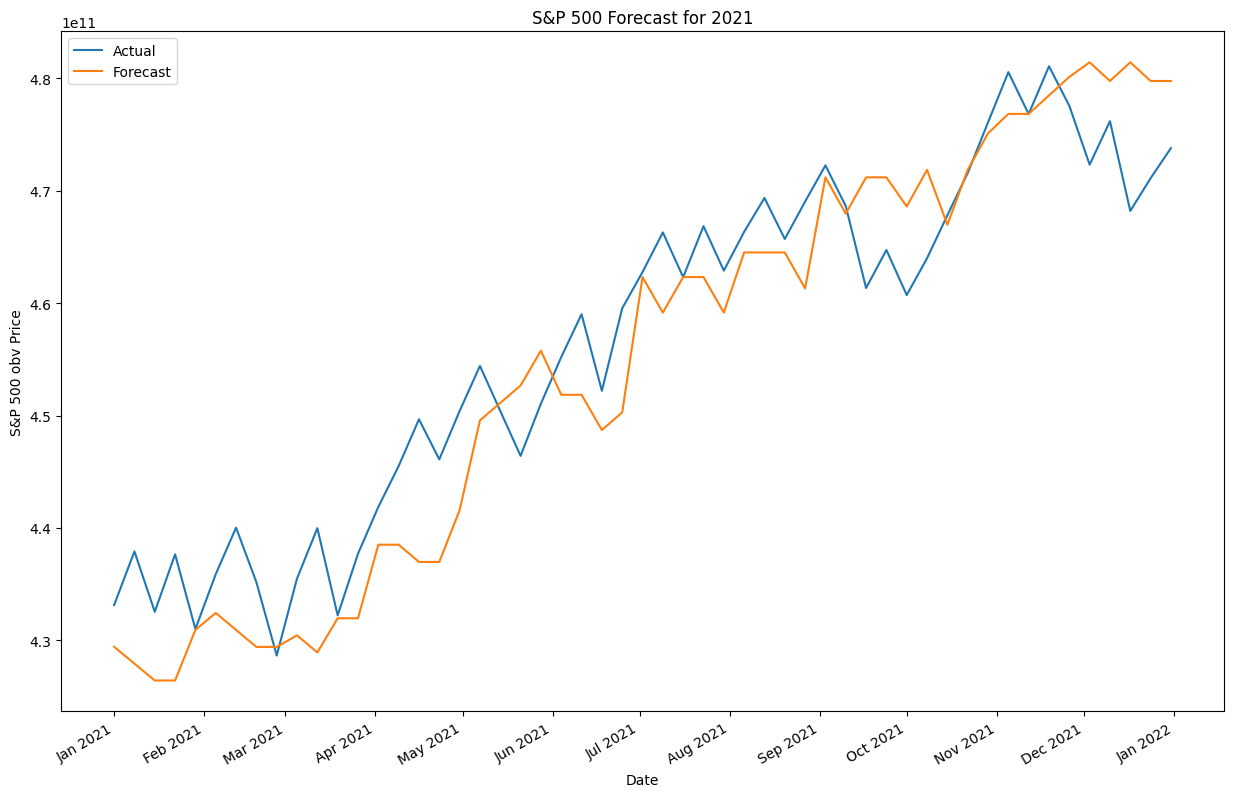

Average Error Rate: 1.10%


In [45]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2021, train_years=[60, 40, 20, 1], forecast_months=12)

### 2021 60, 20

actual_values [3756.07006836 3824.67993164 3768.25       3841.4699707  3714.23999023]
predicted_values [3672.7590332  3684.53149414 3696.30395508 3731.61816406 3743.38903809]


actual_values [3886.83007812 3934.83007812 3906.70996094 3811.14990234]
predicted_values [3716.97949219 3728.93041992 3752.83520508 3800.64208984]


actual_values [3841.93994141 3943.34008789 3913.10009766 3974.54003906]
predicted_values [3784.78808594 3809.05126953 3809.05126953 3857.57397461]


actual_values [4019.87011719 4128.79980469 4185.47021484 4180.16992188 4181.16992188]
predicted_values [3972.8684082  3985.36083984 3997.85327148 3997.85327148 4035.33398438]


actual_values [4232.60009766 4173.85009766 4155.85986328 4204.10986328]
predicted_values [4214.80859375 4253.59423828 4266.52392578 4240.66455078]


actual_values [4229.89013672 4247.43994141 4166.45019531 4280.70019531]
predicted_values [4225.14038086 4198.48339844 4225.14038086 4251.79736328]


actual_values [4352.33984375 4369.54980469 4327.16015625 4411.79003906 4395.25976562]
predicted_values [4286.58691406 4286.58886719 4286.58886719 4354.84545898 4368.49609375]


actual_values [4436.52001953 4468.         4441.66992188 4509.37011719]
predicted_values [4387.50048828 4401.56396484 4415.62744141 4443.75048828]


actual_values [4535.43017578 4458.58007812 4432.99023438 4455.47998047]
predicted_values [4480.45361328 4509.17626953 4509.17626953 4552.25634766]


actual_values [4357.04003906 4391.33984375 4471.37011719 4544.89990234 4605.37988281]
predicted_values [4461.93359375 4461.93359375 4505.96655273 4461.93359375 4491.29003906]


actual_values [4697.52978516 4682.85009766 4697.95996094 4594.62011719]
predicted_values [4606.16308594 4621.21484375 4636.26660156 4636.26660156]
actual_values [4538.43017578 4712.02001953 4620.64013672 4725.79003906 4766.18017578]
predicted_values [4639.25146484 4608.52587891 4685.33544922 4654.61206055 4700.69824219]


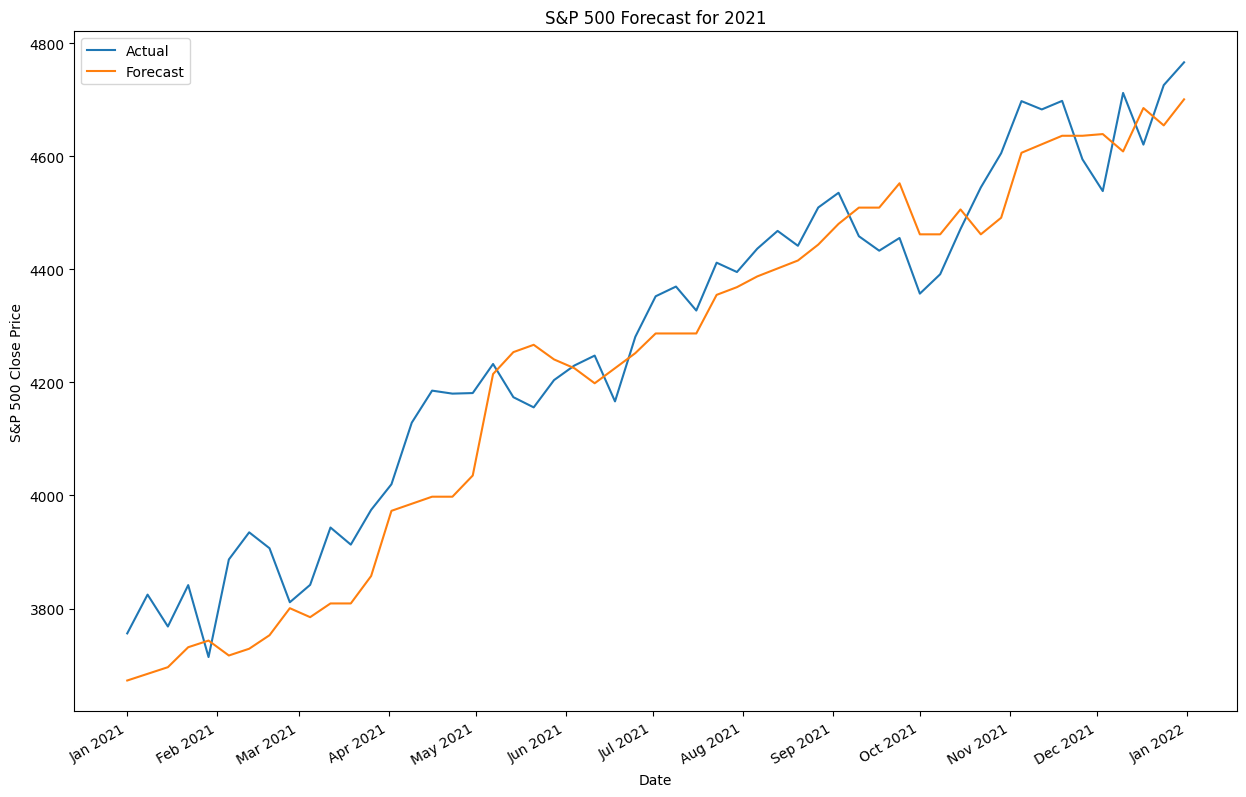

Average Error Rate: 1.91%


In [54]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2021, train_years=[60, 20, 1], forecast_months=12)

### 2020 60, 40, 20

actual_values [4.0217890e+11 4.0539348e+11 4.0911970e+11 4.0541092e+11 4.0088122e+11]
predicted_values [4.06843425e+11 4.06843425e+11 4.12416606e+11 4.12416606e+11
 4.12416606e+11]


actual_values [4.0461514e+11 4.0803484e+11 4.0412606e+11 3.9555649e+11]
predicted_values [4.01148379e+11 4.01148379e+11 4.01148379e+11 4.02555994e+11]


actual_values [4.0211173e+11 3.9381266e+11 3.8475871e+11 3.9096038e+11]
predicted_values [3.96792693e+11 3.96792693e+11 3.96792693e+11 3.96792693e+11]


actual_values [3.8486341e+11 3.9276296e+11 3.9856777e+11 3.9318496e+11]
predicted_values [3.89641568e+11 3.86797273e+11 3.91063519e+11 3.91063519e+11]


actual_values [3.8842515e+11 3.9330118e+11 3.8779348e+11 3.9176434e+11 3.9906189e+11]
predicted_values [3.93071133e+11 3.93071133e+11 3.93071133e+11 3.93071133e+11
 3.94495394e+11]


actual_values [4.0770119e+11 4.0185586e+11 4.1020251e+11 4.0209466e+11]
predicted_values [3.99662055e+11 3.96807504e+11 3.98234780e+11 3.98234780e+11]


actual_values [4.0629238e+11 4.1081657e+11 4.1482942e+11 4.1114001e+11 4.1614754e+11]
predicted_values [4.01460625e+11 4.00026927e+11 4.00026927e+11 3.98593229e+11
 3.98593229e+11]


actual_values [4.2025757e+11 4.2345763e+11 4.2696264e+11 4.3083115e+11]
predicted_values [4.12540895e+11 4.12540895e+11 4.12540895e+11 4.12540895e+11]


actual_values [4.2639243e+11 4.2268234e+11 4.1560594e+11 4.1180261e+11]
predicted_values [4.31284486e+11 4.31284486e+11 4.34198774e+11 4.34198774e+11]


actual_values [4.1577779e+11 4.1972188e+11 4.2440991e+11 4.2075831e+11 4.1591438e+11]
predicted_values [4.11251868e+11 4.11251868e+11 4.08314348e+11 4.08314544e+11
 4.12720710e+11]


actual_values [4.2075684e+11 4.2547642e+11 4.2124005e+11 4.2401844e+11]
predicted_values [4.15034933e+11 4.15034933e+11 4.15034933e+11 4.15034933e+11]
actual_values [4.2911806e+11 4.2474259e+11 4.3183969e+11 4.2995591e+11]
predicted_values [4.24080572e+11 4.22587433e+11 4.24080572e+11 4.24080572e+11]


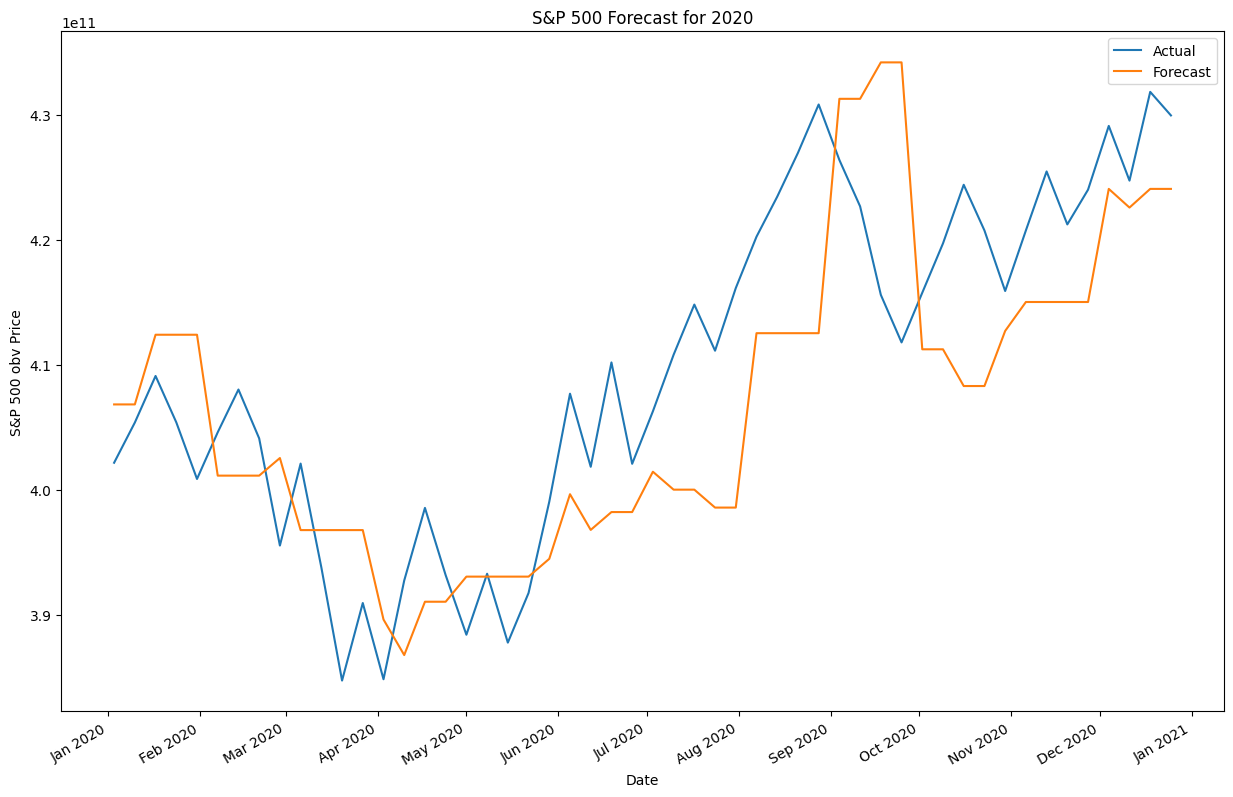

Average Error Rate: 1.88%


In [46]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2020, train_years=[60, 40, 20, 1], forecast_months=12)

### 2020 60, 20

actual_values [3234.85009766 3265.35009766 3329.62011719 3295.4699707  3225.52001953]
predicted_values [3229.8112793  3229.8112793  3229.8112793  3229.8112793  3251.19946289]


actual_values [3327.70996094 3380.15991211 3337.75       2954.2199707 ]
predicted_values [3237.33789062 3237.33789062 3248.23876953 3259.13818359]


actual_values [2972.37011719 2711.02001953 2304.91992188 2541.4699707 ]
predicted_values [2936.54321289 2914.46533203 2892.38452148 2925.50427246]


actual_values [2488.64990234 2789.82006836 2874.56005859 2836.73999023]
predicted_values [2619.66601562 2619.66601562 2630.67382812 2597.65209961]


actual_values [2830.70996094 2929.80004883 2863.69995117 2955.44995117 3044.31005859]
predicted_values [2838.84960938 2805.96801758 2838.84960938 2827.88818359 2882.69274902]


actual_values [3193.92993164 3041.31005859 3097.73999023 3009.05004883]
predicted_values [3065.13330078 3032.17407227 3010.20336914 3021.1887207 ]


actual_values [3130.01000977 3185.04003906 3224.72998047 3215.62988281 3271.12011719]
predicted_values [2946.27612305 2869.03369141 2880.06774902 2924.20666504 2891.10314941]


actual_values [3351.2800293  3372.85009766 3397.15991211 3508.01000977]
predicted_values [3286.95288086 3253.64001465 3286.95288086 3264.74536133]


actual_values [3426.95996094 3340.9699707  3319.4699707  3298.45996094]
predicted_values [3511.81811523 3511.81811523 3534.33129883 3545.58630371]


actual_values [3348.41992188 3477.13989258 3483.81005859 3465.38989258 3269.95996094]
predicted_values [3305.10766602 3259.67675781 3327.82312012 3259.67675781 3271.03369141]


actual_values [3509.43994141 3585.14990234 3557.54003906 3638.35009766]
predicted_values [3207.70336914 3161.71484375 3173.21118164 3161.71484375]
actual_values [3699.12011719 3663.45996094 3709.40991211 3703.06005859]
predicted_values [3617.16052246 3628.79052734 3652.0534668  3686.94494629]


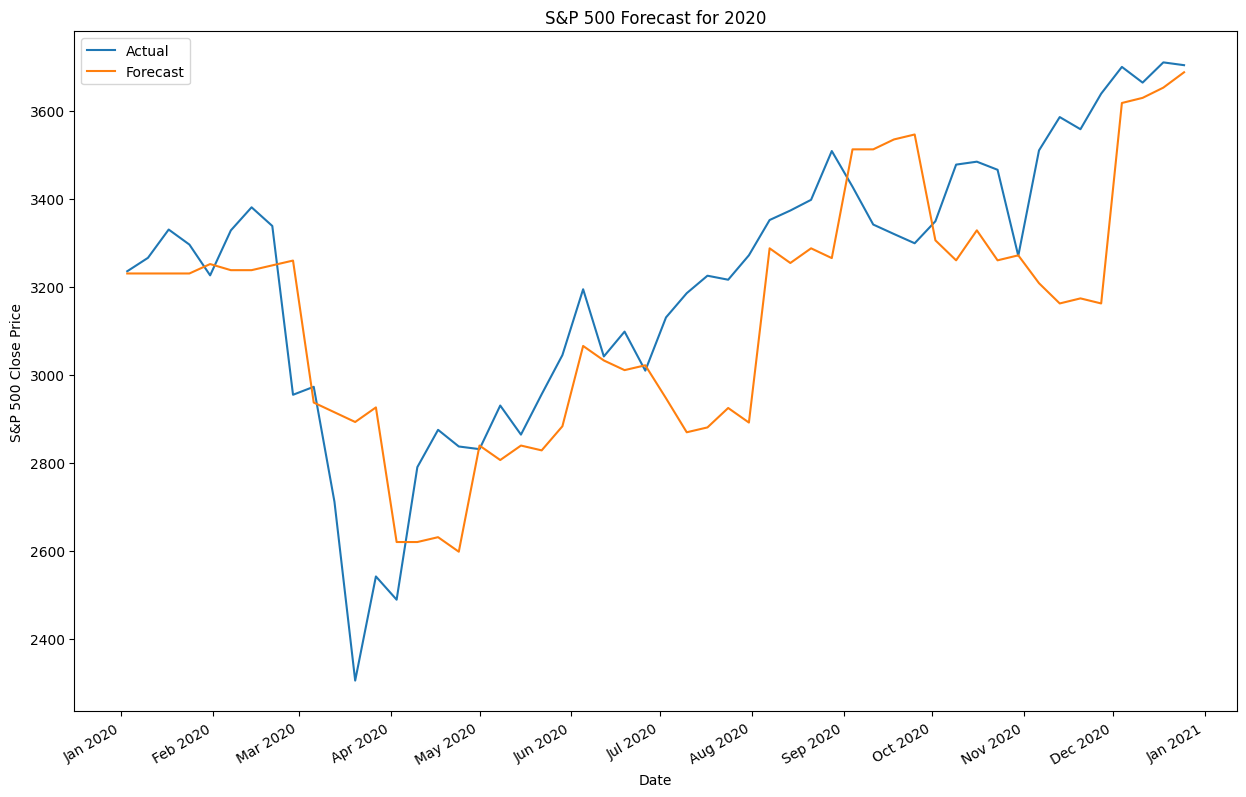

Average Error Rate: 5.45%


In [56]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2020, train_years=[60, 20, 1], forecast_months=12)

### 2019 60, 40, 20

actual_values [3.5562211e+11 3.5906957e+11 3.6307858e+11 3.5925758e+11]
predicted_values [3.48883386e+11 3.50166122e+11 3.51448859e+11 3.46318242e+11]


actual_values [3.6304007e+11 3.6668958e+11 3.7033826e+11 3.7376761e+11]
predicted_values [3.60345371e+11 3.59058506e+11 3.60345371e+11 3.60345371e+11]


actual_values [3.7776256e+11 3.7433826e+11 3.8030804e+11 3.7605431e+11 3.7980683e+11]
predicted_values [3.71379667e+11 3.71379667e+11 3.70085757e+11 3.71379667e+11
 3.72673577e+11]


actual_values [3.8296280e+11 3.8668885e+11 3.8318175e+11 3.8644614e+11]
predicted_values [3.79011891e+11 3.79011891e+11 3.79011891e+11 3.81625598e+11]


actual_values [3.8980332e+11 3.8623654e+11 3.8292050e+11 3.8003127e+11 3.7604860e+11]
predicted_values [3.85326973e+11 3.85326973e+11 3.87966370e+11 3.87966370e+11
 3.85326973e+11]


actual_values [3.7929298e+11 3.8228579e+11 3.8728933e+11 3.8186668e+11]
predicted_values [3.74774481e+11 3.76108286e+11 3.76108286e+11 3.76108106e+11]


actual_values [3.8430136e+11 3.8728550e+11 3.8399961e+11 3.8725978e+11]
predicted_values [3.82105977e+11 3.79415265e+11 3.82105977e+11 3.83451513e+11]


actual_values [3.8337697e+11 3.8002012e+11 3.7649604e+11 3.7255352e+11 3.7556343e+11]
predicted_values [3.87730440e+11 3.87730440e+11 3.86374664e+11 3.87730440e+11
 3.90441665e+11]


actual_values [3.7877277e+11 3.8232978e+11 3.7622634e+11 3.7297986e+11]
predicted_values [3.76074142e+11 3.76074142e+11 3.76074142e+11 3.76074142e+11]


actual_values [3.6997426e+11 3.7355558e+11 3.7682455e+11 3.8020361e+11]
predicted_values [3.71675529e+11 3.71675529e+11 3.74408610e+11 3.68942809e+11]


actual_values [3.8415990e+11 3.8766806e+11 3.9102786e+11 3.8779259e+11 3.8953601e+11]
predicted_values [3.81129687e+11 3.81129687e+11 3.78387595e+11 3.81129687e+11
 3.82500569e+11]
actual_values [3.9301932e+11 3.9677697e+11 4.0323445e+11 4.0566360e+11]
predicted_values [3.89234000e+11 3.89234000e+11 3.89234000e+11 3.86473296e+11]


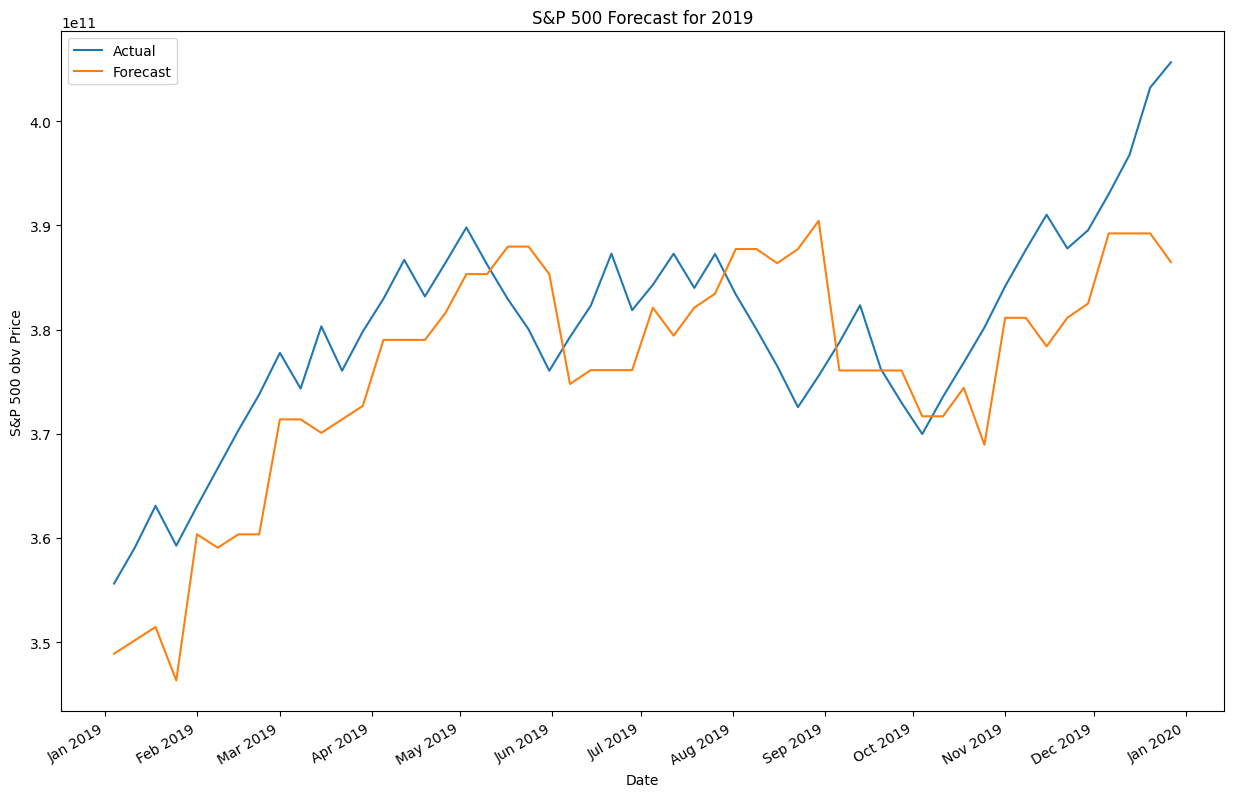

Average Error Rate: 1.81%


In [47]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2019, train_years=[60, 40, 20, 1], forecast_months=12)

### 2019 60, 20

actual_values [2531.93994141 2596.26000977 2670.70996094 2664.76000977]
predicted_values [2504.37927246 2524.49475098 2544.61022949 2584.84118652]


actual_values [2706.5300293  2707.87988281 2775.60009766 2792.66992188]
predicted_values [2651.31359863 2641.30932617 2621.2980957  2651.31359863]


actual_values [2803.68994141 2743.07006836 2822.47998047 2800.70996094 2834.39990234]
predicted_values [2783.76025391 2763.73193359 2743.70629883 2733.69213867 2733.69213867]


actual_values [2892.73999023 2907.40991211 2905.0300293  2939.87988281]
predicted_values [2814.55102539 2824.6036377  2814.55102539 2814.55102539]


actual_values [2945.63989258 2881.39990234 2859.5300293  2826.06005859 2752.06005859]
predicted_values [2956.66967773 2946.5447998  2976.92236328 2976.92236328 2946.5447998 ]


actual_values [2873.34008789 2886.97998047 2950.45996094 2941.76000977]
predicted_values [2726.20483398 2716.03173828 2705.85864258 2726.20471191]


actual_values [2990.40991211 3013.77001953 2976.61010742 3025.86010742]
predicted_values [2922.63574219 2922.63574219 2922.63574219 2922.63574219]


actual_values [2932.05004883 2918.64990234 2888.67993164 2847.11010742 2926.45996094]
predicted_values [3031.7598877  3011.20556641 3042.03637695 3031.7598877  3021.48339844]


actual_values [2978.70996094 3007.38989258 2992.07006836 2961.79003906]
predicted_values [2922.97485352 2922.97485352 2912.68334961 2902.39050293]


actual_values [2952.01000977 2970.27001953 2986.19995117 3022.55004883]
predicted_values [2950.00512695 2939.68969727 2939.68969727 2929.37426758]


actual_values [3066.90991211 3093.08007812 3120.45996094 3110.29003906 3140.97998047]
predicted_values [3029.42651367 3019.05236816 3050.17724609 3029.42651367 3029.42651367]
actual_values [3145.90991211 3168.80004883 3221.2199707  3240.02001953]
predicted_values [3152.57739258 3152.57739258 3163.08666992 3173.59594727]


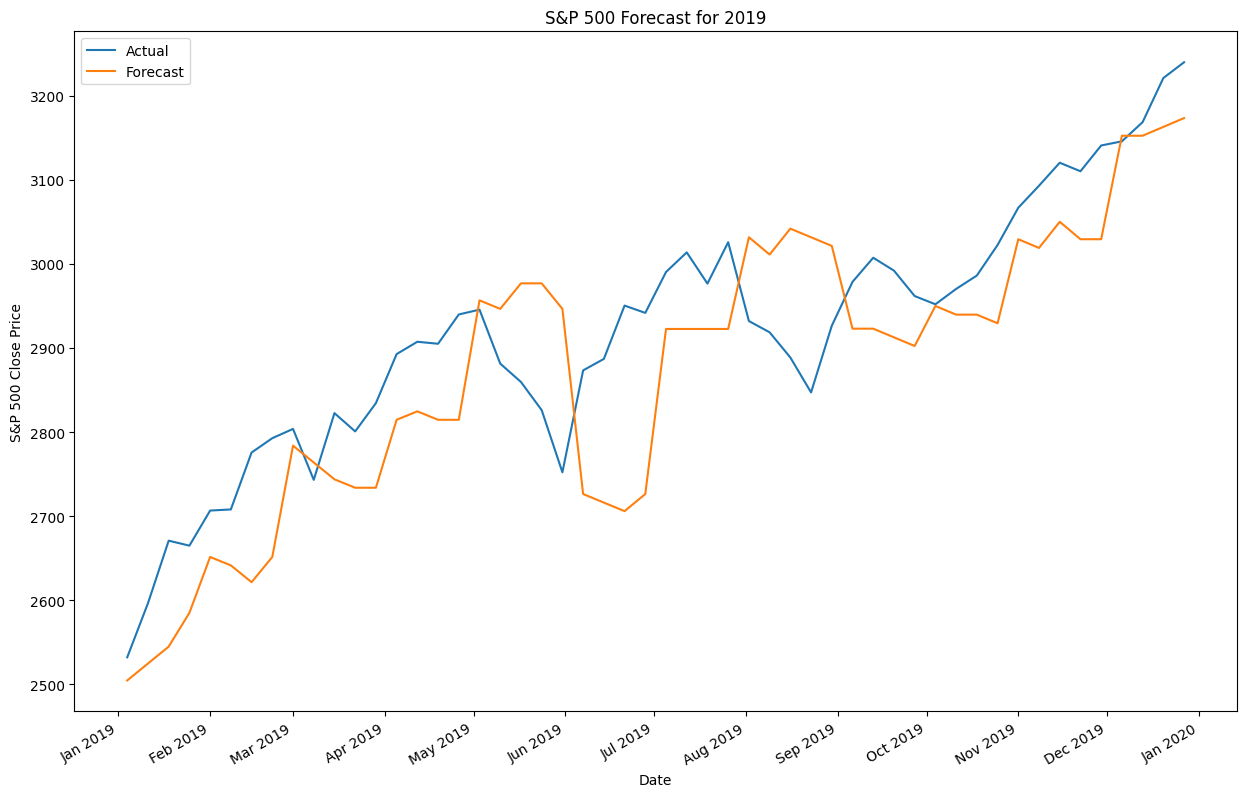

Average Error Rate: 3.06%


In [58]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2019, train_years=[60, 20, 1], forecast_months=12)

### 2018 60, 40, 20

actual_values [3.3862782e+11 3.4221504e+11 3.4593927e+11 3.4941395e+11]
predicted_values [3.36047931e+11 3.38244174e+11 3.38244174e+11 3.38244174e+11]


actual_values [3.4507373e+11 3.3938362e+11 3.4303054e+11 3.4623090e+11]
predicted_values [3.49219258e+11 3.49219258e+11 3.44742101e+11 3.46980844e+11]


actual_values [3.4233965e+11 3.4571652e+11 3.4028738e+11 3.3645800e+11 3.4003036e+11]
predicted_values [3.48150333e+11 3.50425678e+11 3.50425678e+11 3.52701317e+11
 3.57252301e+11]


actual_values [3.3671797e+11 3.3970651e+11 3.4313477e+11 3.3990026e+11]
predicted_values [3.41257732e+11 3.40101005e+11 3.43571333e+11 3.43571333e+11]


actual_values [3.3656500e+11 3.3943985e+11 3.3605658e+11 3.3907184e+11]
predicted_values [3.39841450e+11 3.41013234e+11 3.44528912e+11 3.46872480e+11]


actual_values [3.4276615e+11 3.4590500e+11 3.5135699e+11 3.4588888e+11 3.4230208e+11]
predicted_values [3.39001901e+11 3.39001901e+11 3.39001901e+11 3.39001901e+11
 3.41372404e+11]


actual_values [3.4489233e+11 3.4751212e+11 3.5075537e+11 3.5418974e+11]
predicted_values [3.42974824e+11 3.40567982e+11 3.41771321e+11 3.44178328e+11]


actual_values [3.5723343e+11 3.5396784e+11 3.5700548e+11 3.5960849e+11 3.6249571e+11]
predicted_values [3.55314729e+11 3.55314729e+11 3.60182055e+11 3.60182055e+11
 3.60182055e+11]


actual_values [3.5951913e+11 3.6269854e+11 3.6835101e+11 3.6488933e+11]
predicted_values [3.65363298e+11 3.66597718e+11 3.65363298e+11 3.67832138e+11]


actual_values [3.6154851e+11 3.5752450e+11 3.6111844e+11 3.5631411e+11]
predicted_values [3.65870219e+11 3.68376349e+11 3.70882150e+11 3.73388280e+11]


actual_values [3.6057534e+11 3.6460437e+11 3.6060740e+11 3.5895572e+11 3.6362403e+11]
predicted_values [3.56526686e+11 3.56526686e+11 3.55262317e+11 3.56526506e+11
 3.59055065e+11]
actual_values [3.5938179e+11 3.5531742e+11 3.4765953e+11 3.5138797e+11]
predicted_values [3.64887900e+11 3.64887900e+11 3.63611996e+11 3.64887900e+11]


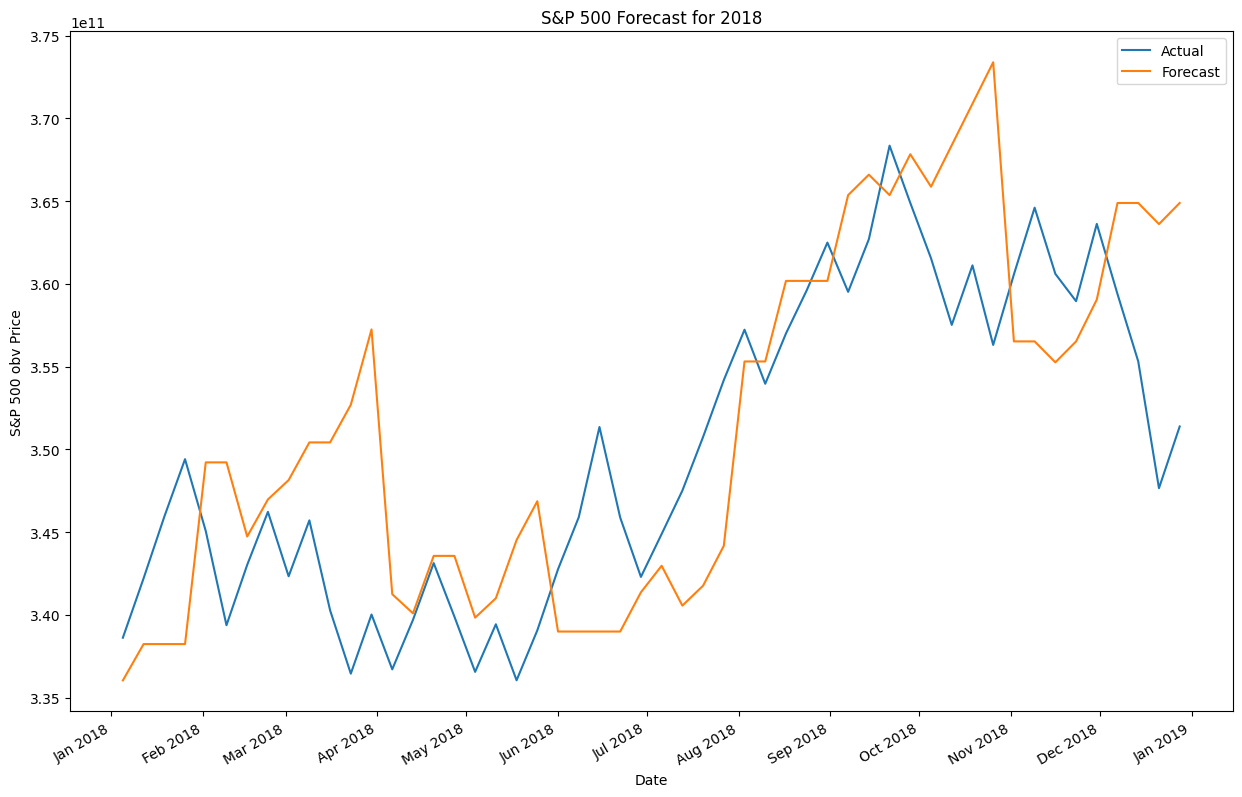

Average Error Rate: 1.77%


In [48]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2018, train_years=[60, 40, 20, 1], forecast_months=12)

### 2018 60, 20

actual_values [2743.14990234 2786.23999023 2810.30004883 2872.87011719]
predicted_values [2695.83398438 2695.83398438 2695.83398438 2686.84838867]


actual_values [2762.12988281 2619.55004883 2732.2199707  2747.30004883]
predicted_values [2849.74389648 2868.01269531 2868.01269531 2877.14587402]


actual_values [2691.25       2786.57006836 2752.01000977 2588.26000977 2640.87011719]
predicted_values [2781.7199707 2772.4777832 2772.4777832 2790.9621582 2800.203125 ]


actual_values [2604.4699707  2656.30004883 2670.13989258 2669.90991211]
predicted_values [2638.30102539 2638.30102539 2638.29992676 2638.29992676]


actual_values [2663.41992188 2727.7199707  2712.9699707  2721.33007812]
predicted_values [2652.38720703 2652.38720703 2642.94750977 2642.94750977]


actual_values [2734.62011719 2779.0300293  2779.65991211 2754.87988281 2718.37011719]
predicted_values [2724.53686523 2715.0098877  2705.48291016 2705.48291016 2743.58813477]


actual_values [2759.82006836 2801.31005859 2801.83007812 2818.82006836]
predicted_values [2718.25585938 2718.25585938 2727.89440918 2737.53295898]


actual_values [2840.35009766 2833.2800293  2850.12988281 2874.68994141 2901.52001953]
predicted_values [2823.02270508 2823.02270508 2861.9609375  2852.22570801 2803.55224609]


actual_values [2871.67993164 2904.97998047 2929.66992188 2913.97998047]
predicted_values [2919.45898438 2899.73413086 2929.32263184 2939.1862793 ]


actual_values [2885.57006836 2767.12988281 2767.7800293  2658.68994141]
predicted_values [2918.11181641 2918.11181641 2938.10009766 2948.09301758]


actual_values [2723.06005859 2781.01000977 2736.27001953 2632.56005859 2760.16992188]
predicted_values [2653.56079102 2653.56079102 2623.40600586 2663.6114502  2673.66345215]
actual_values [2633.08007812 2599.94995117 2416.62011719 2485.73999023]
predicted_values [2754.21313477 2734.0357666  2713.85839844 2764.30249023]


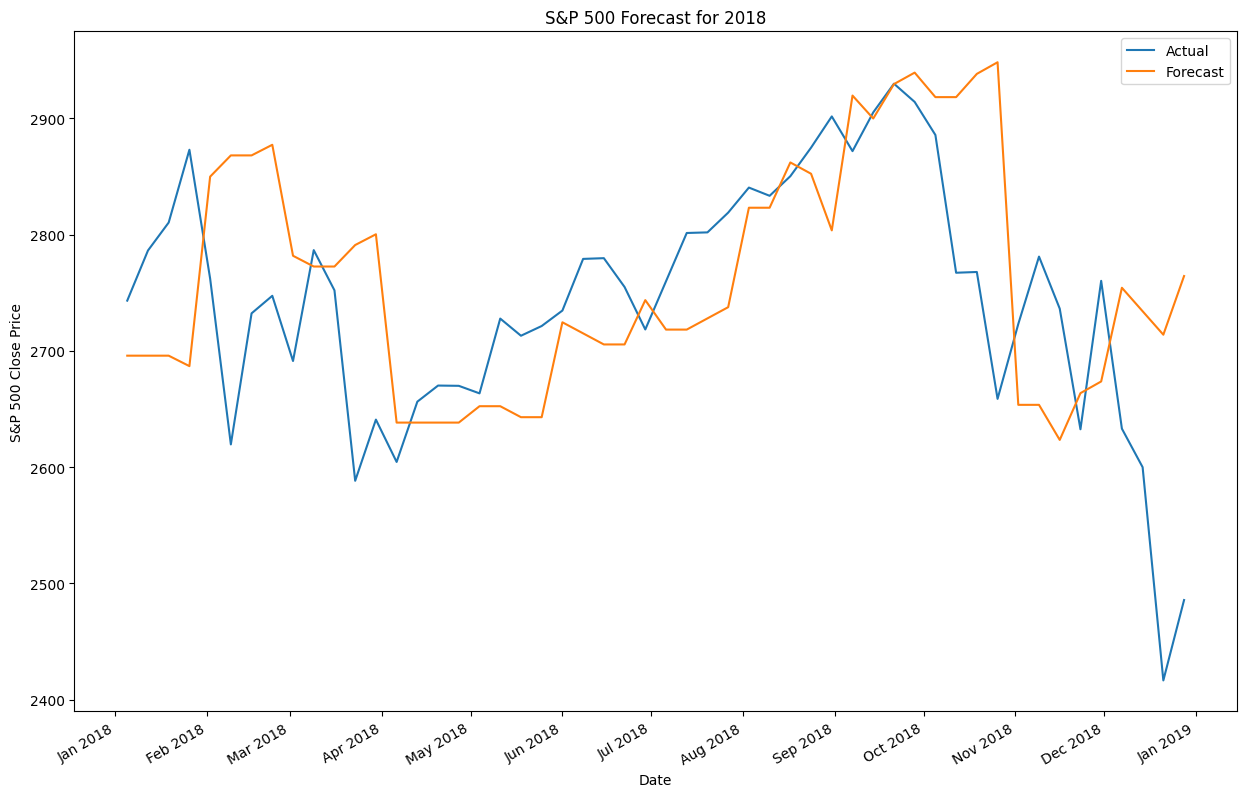

Average Error Rate: 3.30%


In [60]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2018, train_years=[60, 20, 1], forecast_months=12)

### 2017 60, 40, 20

actual_values [2.7253256e+11 2.6944188e+11 2.6590503e+11 2.6904245e+11]
predicted_values [2.71102550e+11 2.70130921e+11 2.68187419e+11 2.69159170e+11]


actual_values [2.7264842e+11 2.7614502e+11 2.7966185e+11 2.8349426e+11]
predicted_values [2.70006731e+11 2.70006731e+11 2.70006731e+11 2.70006731e+11]


actual_values [2.8705093e+11 2.8361653e+11 2.8879635e+11 2.8581782e+11 2.8917456e+11]
predicted_values [2.82157810e+11 2.78211559e+11 2.76238303e+11 2.76238303e+11
 2.80184553e+11]


actual_values [2.8611986e+11 2.8297348e+11 2.8649764e+11 2.9021899e+11]
predicted_values [2.88273498e+11 2.88273498e+11 2.88273498e+11 2.86285267e+11]


actual_values [2.9376223e+11 2.9045761e+11 2.8662591e+11 2.8943284e+11]
predicted_values [2.89656832e+11 2.89656832e+11 2.90655584e+11 2.90655584e+11]


actual_values [2.9289834e+11 2.8886848e+11 2.9416786e+11 2.9945032e+11 2.9608429e+11]
predicted_values [2.87665160e+11 2.87665160e+11 2.87665160e+11 2.87665160e+11
 2.89676657e+11]


actual_values [2.9901368e+11 3.0175214e+11 3.0481902e+11 3.0151617e+11]
predicted_values [2.96467628e+11 2.96467628e+11 2.99513594e+11 2.98498359e+11]


actual_values [3.0475615e+11 3.0159432e+11 2.9816735e+11 3.0076070e+11]
predicted_values [3.03892300e+11 3.01839090e+11 3.03892300e+11 3.02865695e+11]


actual_values [3.0347348e+11 3.0016512e+11 3.0502809e+11 3.0790607e+11 3.1112633e+11]
predicted_values [3.01438501e+11 3.00402704e+11 3.03510241e+11 3.02474297e+11
 2.98330817e+11]


actual_values [3.1402460e+11 3.1717507e+11 3.2056952e+11 3.2446562e+11]
predicted_values [3.10302015e+11 3.11350411e+11 3.12398807e+11 3.12398807e+11]


actual_values [3.2803433e+11 3.2454459e+11 3.2123479e+11 3.2262068e+11]
predicted_values [3.24894228e+11 3.25955912e+11 3.27017595e+11 3.25955912e+11]
actual_values [3.2657161e+11 3.2969836e+11 3.3543527e+11 3.3783630e+11 3.3538854e+11]
predicted_values [3.25132550e+11 3.24055876e+11 3.26209077e+11 3.25132550e+11
 3.27285604e+11]


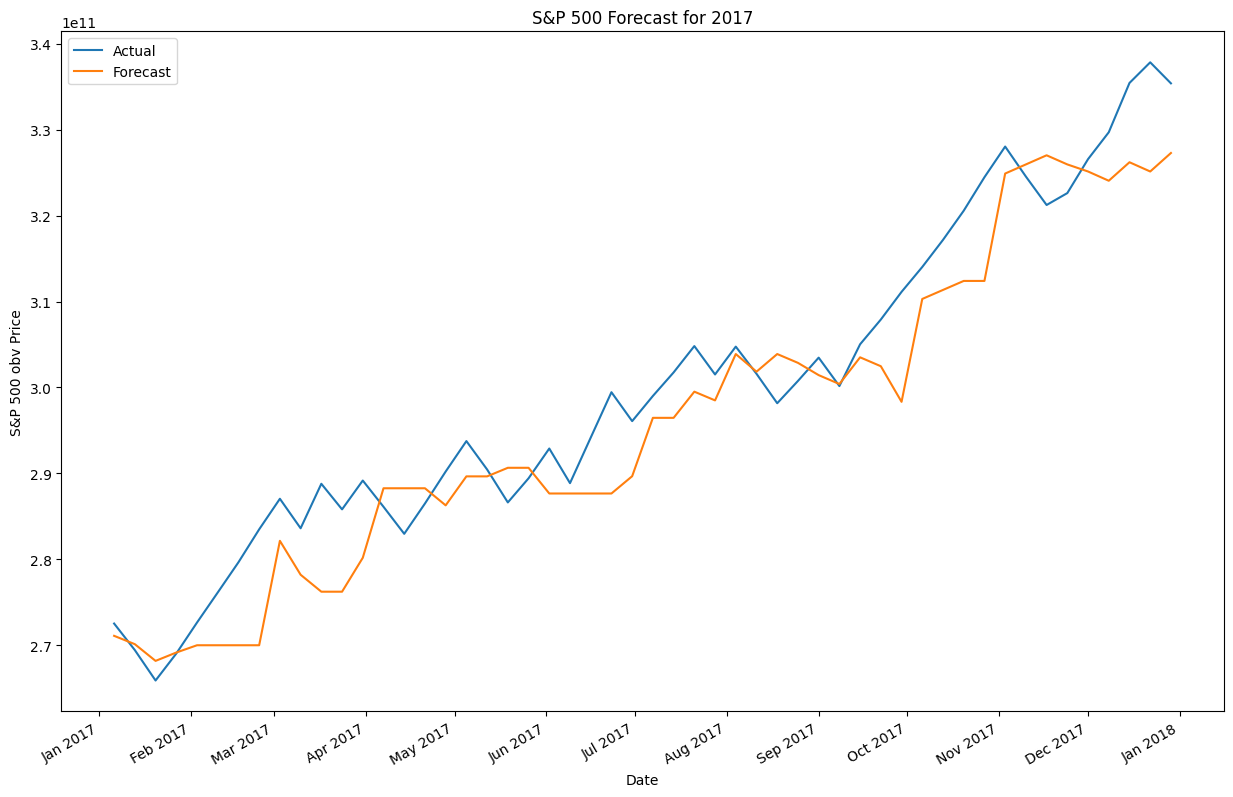

Average Error Rate: 1.62%


In [49]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2017, train_years=[60, 40, 20, 1], forecast_months=12)

### 2017 60, 20

actual_values [2276.97998047 2274.63989258 2271.31005859 2294.68994141]
predicted_values [2249.07617188 2241.3996582  2264.42822266 2264.42822266]


actual_values [2297.41992188 2316.10009766 2351.15991211 2367.34008789]
predicted_values [2288.21728516 2288.21728516 2303.7824707  2311.56591797]


actual_values [2383.12011719 2372.60009766 2378.25       2343.97998047 2362.7199707 ]
predicted_values [2379.2232666  2371.31835938 2379.2232666  2379.2232666  2379.2232666 ]


actual_values [2355.54003906 2328.94995117 2348.68994141 2384.19995117]
predicted_values [2363.96582031 2355.95288086 2371.97875977 2379.99279785]


actual_values [2399.29003906 2390.89990234 2381.72998047 2415.82006836]
predicted_values [2389.86584473 2381.76513672 2397.96655273 2389.86584473]


actual_values [2439.07006836 2431.77001953 2433.14990234 2438.30004883 2423.40991211]
predicted_values [2425.7734375  2409.38427734 2425.7734375  2442.16503906 2442.16503906]


actual_values [2425.17993164 2459.27001953 2472.54003906 2472.10009766]
predicted_values [2425.8359375  2425.8359375  2442.45239258 2442.45239258]


actual_values [2476.83007812 2441.32006836 2425.55004883 2443.05004883]
predicted_values [2487.28149414 2470.4765625  2495.68493652 2504.08837891]


actual_values [2476.55004883 2461.42993164 2500.22998047 2502.2199707  2519.36010742]
predicted_values [2441.71875    2441.71875    2433.24108887 2441.71875    2441.71875   ]


actual_values [2549.33007812 2553.16992188 2575.20996094 2581.07006836]
predicted_values [2544.59692383 2527.40478516 2553.1940918  2561.79125977]


actual_values [2587.84008789 2582.30004883 2578.85009766 2602.41992188]
predicted_values [2580.16308594 2597.59790039 2606.31408691 2615.03027344]
actual_values [2642.2199707  2651.5        2675.81005859 2683.34008789 2673.61010742]
predicted_values [2598.09936523 2598.09936523 2615.7722168  2615.7722168  2615.7722168 ]


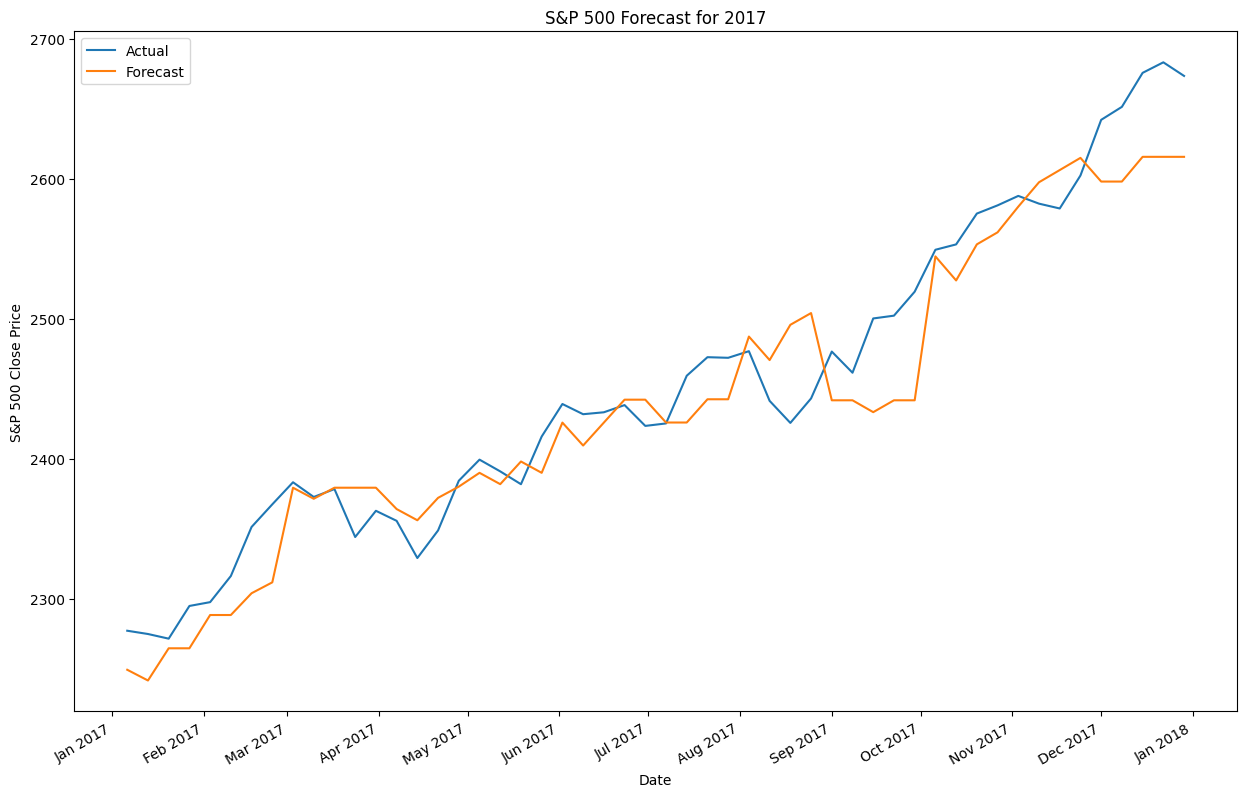

Average Error Rate: 1.09%


In [62]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2017, train_years=[60, 20, 1], forecast_months=12)

### 2016 60, 40, 20

actual_values [2.5365105e+11 2.4898611e+11 2.4351765e+11 2.4841941e+11 2.5391698e+11]
predicted_values [2.55553946e+11 2.53728686e+11 2.51903181e+11 2.52815933e+11
 2.52815933e+11]


actual_values [2.4898704e+11 2.4429012e+11 2.4843297e+11 2.5278148e+11]
predicted_values [2.50527089e+11 2.50527089e+11 2.50527089e+11 2.49612698e+11]


actual_values [2.5883141e+11 2.6291003e+11 2.6941317e+11 2.6600545e+11]
predicted_values [2.49593364e+11 2.48679039e+11 2.50507690e+11 2.51421884e+11]


actual_values [2.6975544e+11 2.6639591e+11 2.7009736e+11 2.7388794e+11 2.6918322e+11]
predicted_values [2.66771841e+11 2.66771841e+11 2.70451458e+11 2.68611535e+11
 2.67691688e+11]


actual_values [2.6538687e+11 2.6180699e+11 2.6531464e+11 2.6839379e+11]
predicted_values [2.68871434e+11 2.69798515e+11 2.72580002e+11 2.68871434e+11]


actual_values [2.7202157e+11 2.6850656e+11 2.6355393e+11 2.5595648e+11]
predicted_values [2.66311762e+11 2.65380536e+11 2.65380536e+11 2.65380536e+11]


actual_values [2.5941537e+11 2.6302287e+11 2.6614547e+11 2.6916875e+11 2.6512991e+11]
predicted_values [2.55250391e+11 2.56185434e+11 2.56185434e+11 2.57120354e+11
 2.58990318e+11]


actual_values [2.6879298e+11 2.7179364e+11 2.6870884e+11 2.6536650e+11]
predicted_values [2.63594607e+11 2.65477538e+11 2.63594607e+11 2.63594607e+11]


actual_values [2.6845762e+11 2.6422366e+11 2.6923802e+11 2.7252788e+11 2.7668668e+11]
predicted_values [2.65488990e+11 2.65488990e+11 2.63592641e+11 2.63592772e+11
 2.68333580e+11]


actual_values [2.7310791e+11 2.6992000e+11 2.7337639e+11 2.6934812e+11]
predicted_values [2.78494347e+11 2.77537391e+11 2.77537391e+11 2.76580303e+11]


actual_values [2.6550621e+11 2.7050020e+11 2.7408110e+11 2.7566569e+11]
predicted_values [2.70063043e+11 2.70063043e+11 2.70063043e+11 2.69098598e+11]
actual_values [2.7188332e+11 2.7576978e+11 2.6984080e+11 2.7186203e+11 2.6919048e+11]
predicted_values [2.73895850e+11 2.72928080e+11 2.70992294e+11 2.70992294e+11
 2.74863620e+11]


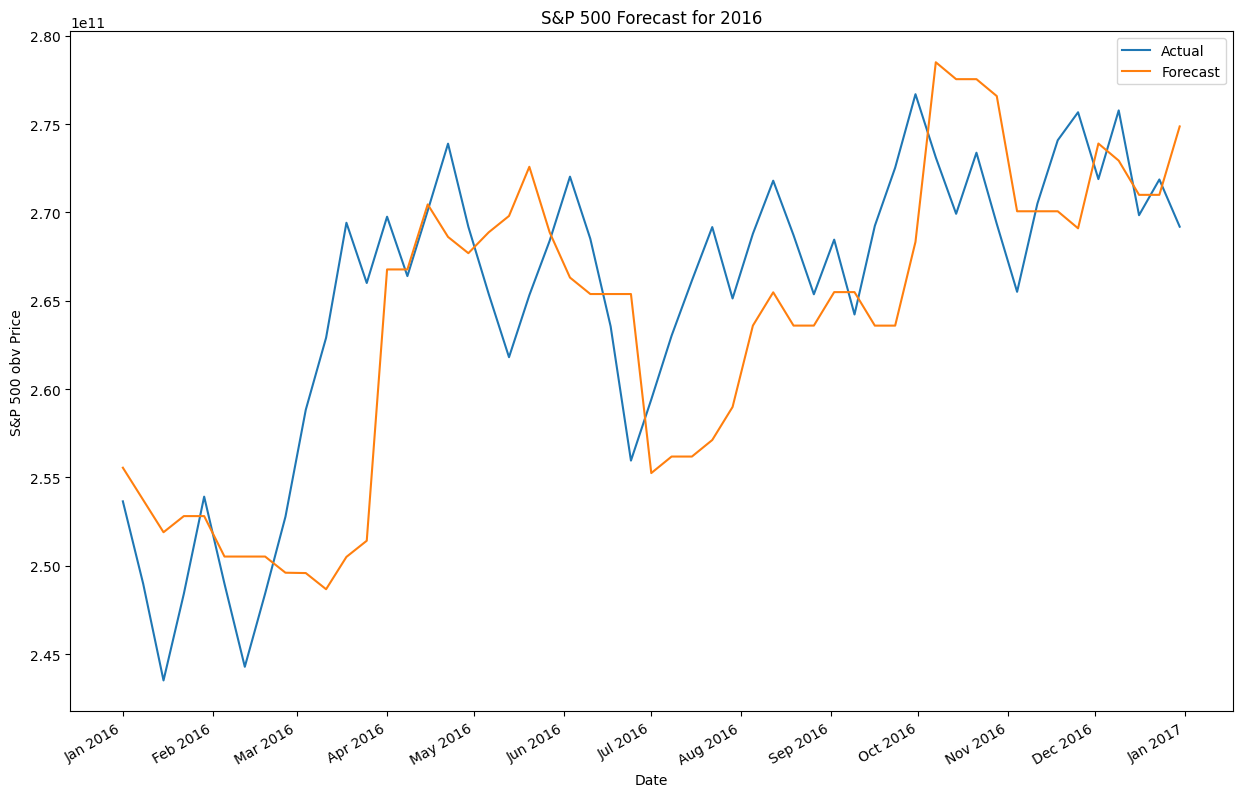

Average Error Rate: 2.01%


In [50]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2016, train_years=[60, 40, 20, 1], forecast_months=12)

### 2016 60, 20

actual_values [2043.93994141 1922.0300293  1880.32995605 1906.90002441 1940.23999023]
predicted_values [2054.86376953 2062.41894531 2085.08227539 2077.52819824 2077.52819824]


actual_values [1880.05004883 1864.7800293  1917.7800293  1948.05004883]
predicted_values [1955.48754883 1932.92370605 1940.44433594 1940.44433594]


actual_values [1999.98999023 2022.18994141 2049.58007812 2035.93994141]
predicted_values [1934.1519165  1911.74914551 1934.1519165  1971.49121094]


actual_values [2072.7800293  2047.59997559 2080.72998047 2091.58007812 2065.30004883]
predicted_values [2050.02990723 2057.48413086 2050.02990723 2057.48413086 2057.48413086]


actual_values [2057.13989258 2046.60998535 2052.32006836 2099.06005859]
predicted_values [2071.55712891 2056.65307617 2049.20184326 2056.65307617]


actual_values [2099.12988281 2096.07006836 2071.2199707  2037.41003418]
predicted_values [2080.68334961 2073.25280762 2080.68334961 2058.39086914]


actual_values [2102.94995117 2129.89990234 2161.73999023 2175.0300293  2173.60009766]
predicted_values [2034.27148438 2034.27148438 1982.29968262 2004.57409668 2004.57318115]


actual_values [2182.87011719 2184.05004883 2183.87011719 2169.04003906]
predicted_values [2188.5546875  2173.66552734 2203.44189453 2188.5546875 ]


actual_values [2179.97998047 2127.81005859 2139.15991211 2164.68994141 2168.27001953]
predicted_values [2170.85986328 2170.85986328 2193.31652832 2178.34509277 2163.37365723]


actual_values [2153.73999023 2132.97998047 2141.15991211 2126.40991211]
predicted_values [2175.13256836 2167.58056641 2160.02856445 2160.02856445]


actual_values [2085.17993164 2164.44995117 2181.89990234 2213.35009766]
predicted_values [2123.80664062 2108.63769531 2093.46655273 2093.46655273]
actual_values [2191.94995117 2259.5300293  2258.07006836 2263.79003906 2238.83007812]
predicted_values [2214.28601074 2206.67724609 2214.28601074 2206.67626953 2199.06750488]


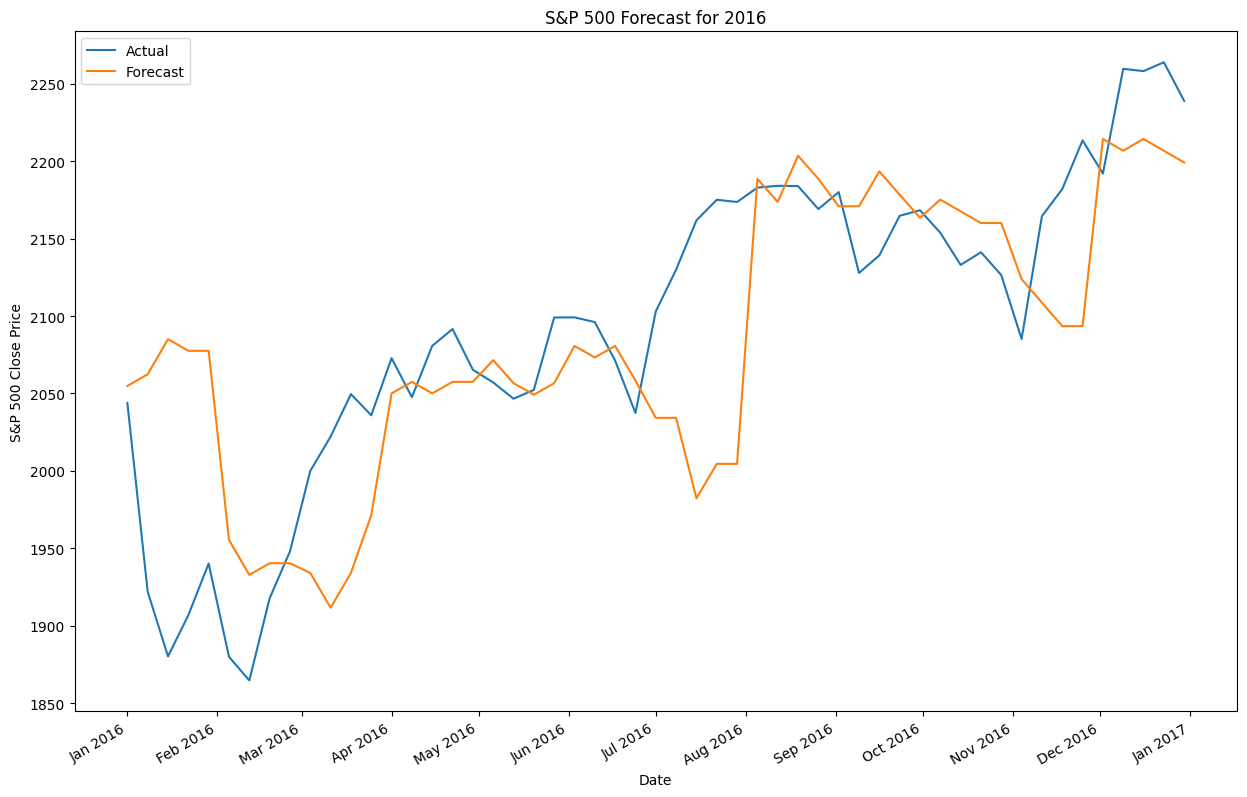

Average Error Rate: 2.60%


In [64]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2016, train_years=[60, 20, 1], forecast_months=12)

### 2015 60, 40, 20

actual_values [2.4965710e+11 2.4629296e+11 2.4223655e+11 2.4581011e+11 2.4124146e+11]
predicted_values [2.51918320e+11 2.50249871e+11 2.51084095e+11 2.51918320e+11
 2.51084095e+11]


actual_values [2.4547443e+11 2.4900188e+11 2.5228348e+11 2.4873610e+11]
predicted_values [2.41362993e+11 2.41362993e+11 2.41362993e+11 2.42206867e+11]


actual_values [2.4488253e+11 2.4138397e+11 2.4693809e+11 2.4392954e+11]
predicted_values [2.50844234e+11 2.49137693e+11 2.52550529e+11 2.50844234e+11]


actual_values [2.4702550e+11 2.5018170e+11 2.4655410e+11 2.4992988e+11]
predicted_values [2.44180009e+11 2.42460541e+11 2.41600700e+11 2.42460434e+11]


actual_values [2.4655049e+11 2.4994993e+11 2.5304201e+11 2.5561387e+11 2.5168648e+11]
predicted_values [2.48014586e+11 2.48014586e+11 2.48014586e+11 2.48014586e+11
 2.49748832e+11]


actual_values [2.4844279e+11 2.5116219e+11 2.5561200e+11 2.5058653e+11]
predicted_values [2.51078984e+11 2.49323078e+11 2.49323078e+11 2.49323078e+11]


actual_values [2.4758999e+11 2.4452492e+11 2.4788767e+11 2.4401763e+11 2.4769897e+11]
predicted_values [2.51428864e+11 2.49658360e+11 2.47887610e+11 2.47887610e+11
 2.51428864e+11]


actual_values [2.4409665e+11 2.4689224e+11 2.4187400e+11 2.4582308e+11]
predicted_values [2.49583976e+11 2.49583976e+11 2.47801233e+11 2.48692662e+11]


actual_values [2.4265599e+11 2.4587458e+11 2.3985334e+11 2.3613147e+11]
predicted_values [2.43808420e+11 2.44704829e+11 2.44704829e+11 2.42015830e+11]


actual_values [2.4051004e+11 2.4421694e+11 2.4781237e+11 2.5192083e+11 2.5617703e+11]
predicted_values [2.37817561e+11 2.36920193e+11 2.34227859e+11 2.36920193e+11
 2.36022710e+11]


actual_values [2.6054605e+11 2.5626730e+11 2.6019690e+11 2.6166374e+11]
predicted_values [2.53169402e+11 2.53169402e+11 2.53169402e+11 2.51361165e+11]
actual_values [2.6587865e+11 2.6157759e+11 2.5489452e+11 2.5630638e+11]
predicted_values [2.60159816e+11 2.56521224e+11 2.54701814e+11 2.54701814e+11]


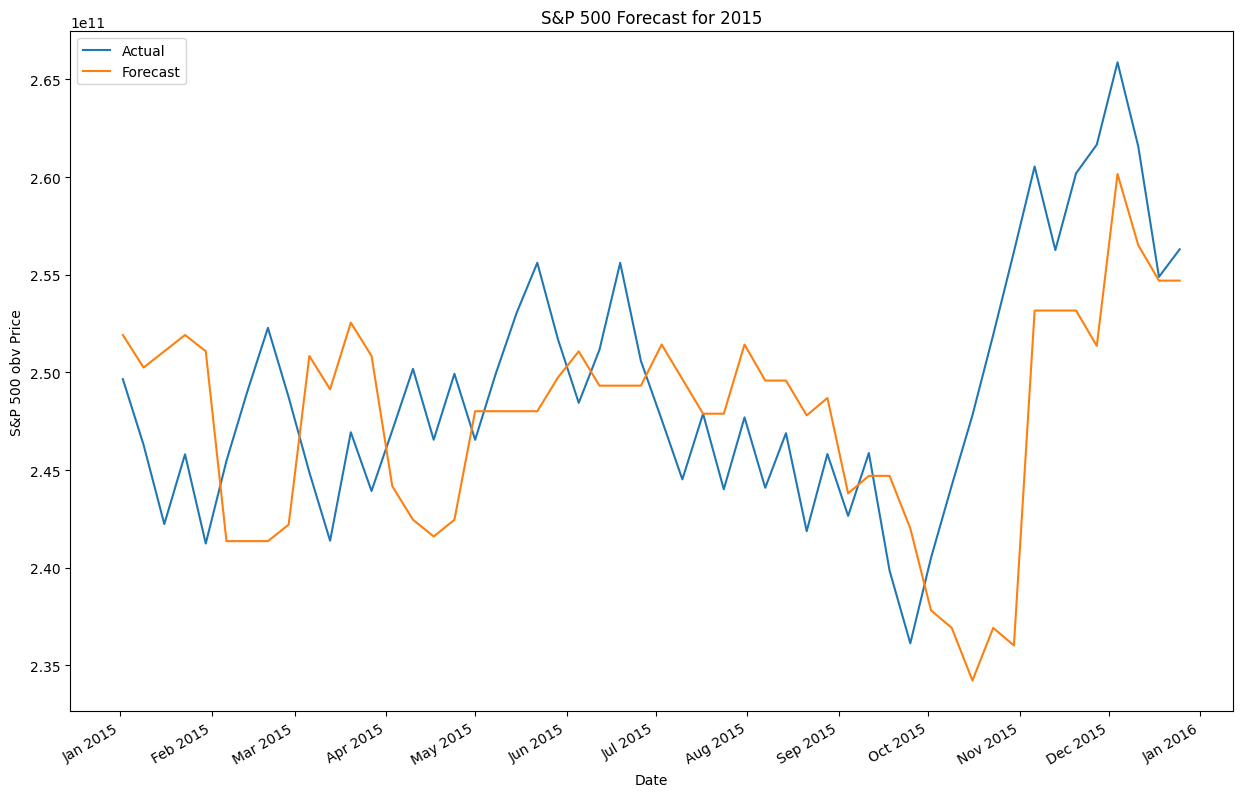

Average Error Rate: 2.17%


In [51]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2015, train_years=[60, 40, 20, 1], forecast_months=12)

### 2015 60, 20

actual_values [2058.19995117 2044.81005859 2019.42004395 2051.82006836 1994.98999023]
predicted_values [2095.44921875 2081.29174805 2095.44921875 2102.52893066 2088.3704834 ]


actual_values [2055.4699707  2096.98999023 2110.30004883 2104.5       ]
predicted_values [2003.57666016 1996.42150879 1974.95410156 1989.26635742]


actual_values [2071.26000977 2053.39990234 2108.10009766 2061.02001953]
predicted_values [2110.76782227 2110.76782227 2132.45422363 2125.22607422]


actual_values [2066.95996094 2102.06005859 2081.17993164 2117.68994141]
predicted_values [2048.09960938 2055.38867188 2055.38867188 2055.38781738]


actual_values [2108.29003906 2116.10009766 2122.72998047 2126.06005859 2107.38989258]
predicted_values [2118.58642578 2133.29980469 2133.29980469 2118.58642578 2118.58642578]


actual_values [2092.83007812 2094.11010742 2109.98999023 2101.48999023]
predicted_values [2111.56445312 2096.6953125  2096.6953125  2081.82397461]


actual_values [2076.7800293  2076.62011719 2126.63989258 2079.64990234 2103.84008789]
predicted_values [2093.44946289 2093.44946289 2093.44946289 2093.44946289 2123.35595703]


actual_values [2077.57006836 2091.54003906 1970.89001465 1988.86999512]
predicted_values [2103.41015625 2118.43554688 2103.41015625 2103.41015625]


actual_values [1921.2199707  1961.05004883 1958.0300293  1931.33996582]
predicted_values [1997.72570801 1990.18762207 1990.18658447 2012.80285645]


actual_values [1951.35998535 2014.89001465 2033.10998535 2075.14990234 2079.36010742]
predicted_values [1948.57116699 1948.57116699 1963.61804199 1993.71179199 1986.18884277]


actual_values [2099.19995117 2023.04003906 2089.16992188 2090.11010742]
predicted_values [2069.35180664 2069.35180664 2069.35180664 2046.6942749 ]
actual_values [2091.68994141 2012.36999512 2005.55004883 2060.98999023]
predicted_values [2071.25878906 2071.25878906 2071.25878906 2071.25878906]


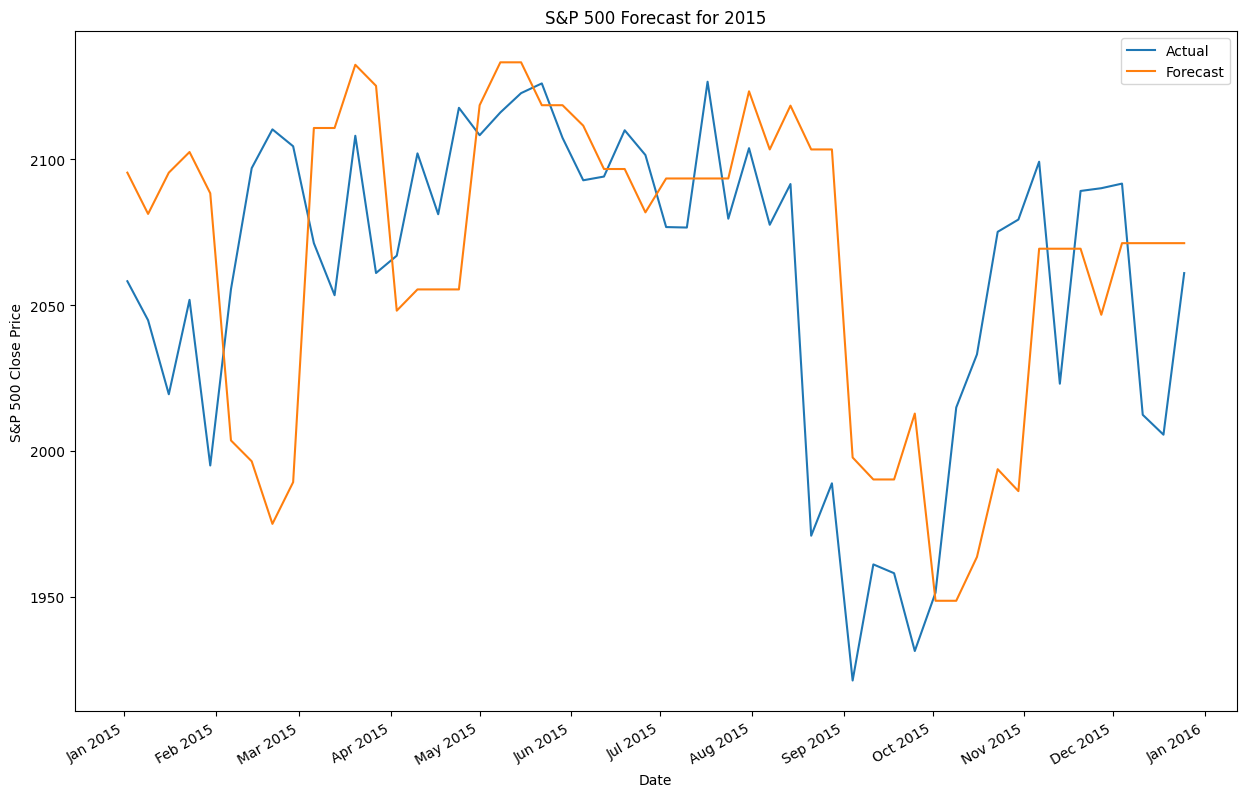

Average Error Rate: 2.26%


In [66]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2015, train_years=[60, 20, 1], forecast_months=12)

### 2014 60, 40, 20

actual_values [2.1952427e+11 2.2285998e+11 2.1923386e+11 2.1461541e+11 2.1055572e+11]
predicted_values [2.23780127e+11 2.22372610e+11 2.24483787e+11 2.25187447e+11
 2.25187447e+11]


actual_values [2.1433171e+11 2.1744646e+11 2.1404258e+11 2.1796003e+11]
predicted_values [2.12044628e+11 2.09880859e+11 2.12044628e+11 2.12765819e+11]


actual_values [2.2152477e+11 2.1823931e+11 2.2351002e+11 2.2055450e+11]
predicted_values [2.19950907e+11 2.18484670e+11 2.18484670e+11 2.19217789e+11]


actual_values [2.2413825e+11 2.2039479e+11 2.2373622e+11 2.2052320e+11]
predicted_values [2.20631990e+11 2.18395918e+11 2.20631990e+11 2.20632097e+11]


actual_values [2.2368276e+11 2.2065774e+11 2.1748409e+11 2.1988037e+11 2.2314386e+11]
predicted_values [2.22332109e+11 2.20819554e+11 2.23844467e+11 2.22332109e+11
 2.22332109e+11]


actual_values [2.2600816e+11 2.2340993e+11 2.2774617e+11 2.2345558e+11]
predicted_values [2.24635912e+11 2.23869190e+11 2.26935882e+11 2.25402634e+11]


actual_values [2.2545367e+11 2.2276904e+11 2.2587510e+11 2.2851406e+11]
predicted_values [2.23827018e+11 2.23827018e+11 2.26158608e+11 2.24604250e+11]


actual_values [2.2472440e+11 2.2762668e+11 2.3065006e+11 2.3295192e+11 2.3521105e+11]
predicted_values [2.27979248e+11 2.27979248e+11 2.31123780e+11 2.29551407e+11
 2.27193061e+11]


actual_values [2.3802935e+11 2.3482278e+11 2.3970300e+11 2.3677356e+11]
predicted_values [2.35723743e+11 2.34924737e+11 2.36522750e+11 2.35723743e+11]


actual_values [2.3321259e+11 2.2866205e+11 2.2417993e+11 2.2725831e+11 2.3155060e+11]
predicted_values [2.38184153e+11 2.36563743e+11 2.39804350e+11 2.38184153e+11
 2.38184153e+11]


actual_values [2.3525488e+11 2.3848201e+11 2.4239843e+11 2.4490307e+11]
predicted_values [2.30801850e+11 2.30801850e+11 2.30801850e+11 2.29164843e+11]
actual_values [2.4832269e+11 2.4416504e+11 2.5063057e+11 2.5236580e+11]
predicted_values [2.44417970e+11 2.42766594e+11 2.44417970e+11 2.41115021e+11]


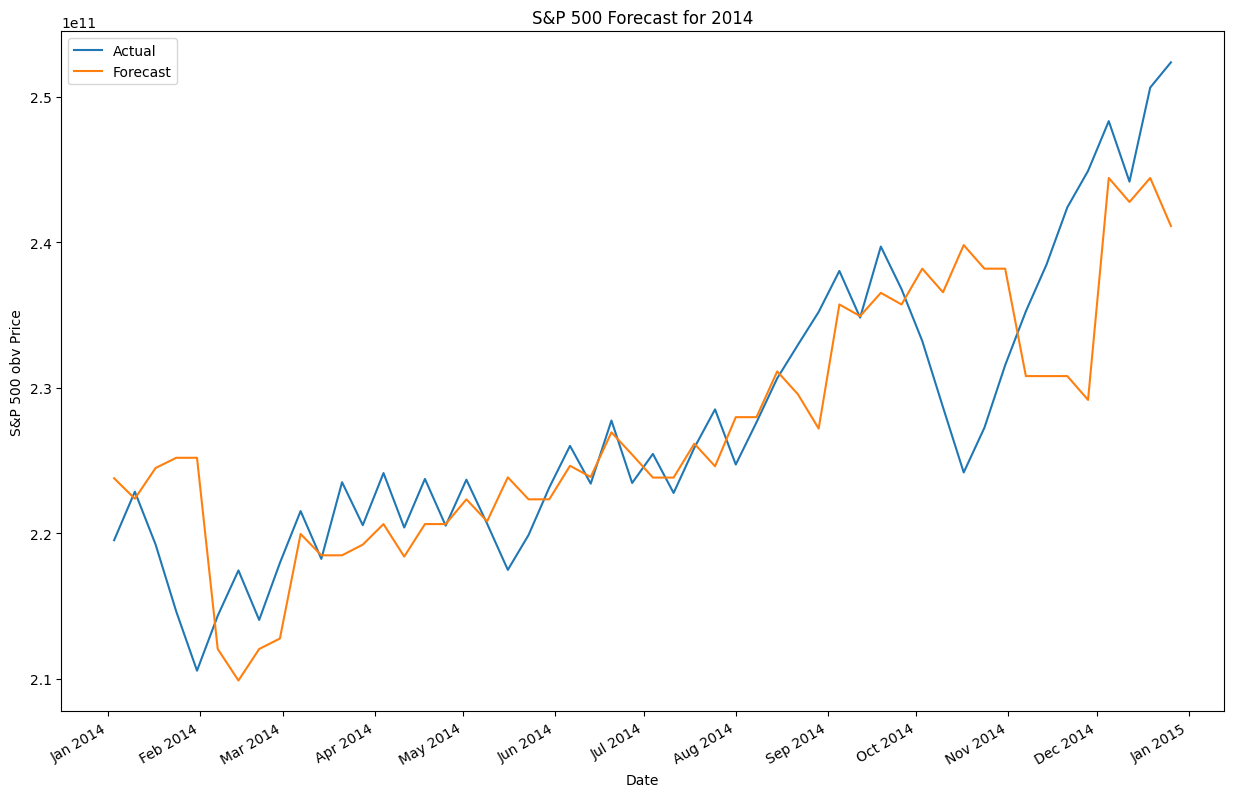

Average Error Rate: 1.82%


In [52]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2014, train_years=[60, 40, 20, 1], forecast_months=12)

### 2014 60, 20

actual_values [1831.36999512 1842.36999512 1838.69995117 1790.29003906 1782.58996582]
predicted_values [1845.79418945 1857.85742188 1857.85742188 1857.85742188 1863.88977051]


actual_values [1797.02001953 1838.63000488 1836.25       1859.44995117]
predicted_values [1779.61572266 1785.75189209 1804.16210938 1822.57147217]


actual_values [1878.04003906 1841.13000488 1866.52001953 1857.61999512]
predicted_values [1867.22546387 1867.22546387 1861.00183105 1867.22546387]


actual_values [1865.08996582 1815.68994141 1864.84997559 1863.40002441]
predicted_values [1871.23095703 1858.58825684 1877.55310059 1877.55310059]


actual_values [1881.14001465 1878.47998047 1877.85998535 1900.5300293  1923.56994629]
predicted_values [1869.1920166  1869.1920166  1888.39648438 1881.99560547 1881.99560547]


actual_values [1949.43994141 1936.16003418 1962.86999512 1960.95996094]
predicted_values [1921.20666504 1908.22644043 1927.69763184 1927.69763184]


actual_values [1985.43994141 1967.56994629 1978.2199707  1978.33996582]
predicted_values [1975.52038574 1975.52038574 1968.93579102 1975.52038574]


actual_values [1925.15002441 1931.58996582 1955.06005859 1988.40002441 2003.36999512]
predicted_values [1974.50634766 1987.84851074 1987.84851074 1987.84851074 1994.51867676]


actual_values [2007.70996094 1985.54003906 2010.40002441 1982.84997559]
predicted_values [2004.76635742 2011.53961182 2018.31286621 2018.31286621]


actual_values [1967.90002441 1906.13000488 1886.76000977 1964.57995605 2018.05004883]
predicted_values [2003.23413086 2003.23413086 2016.95581055 2016.95581055 2010.0949707 ]


actual_values [2031.92004395 2039.81994629 2063.5        2067.56005859]
predicted_values [2036.7598877  2022.90344238 2043.68719482 2036.7598877 ]
actual_values [2075.37011719 2002.32995605 2070.64990234 2088.77001953]
predicted_values [2074.64575195 2060.62890625 2074.64575195 2067.6373291 ]


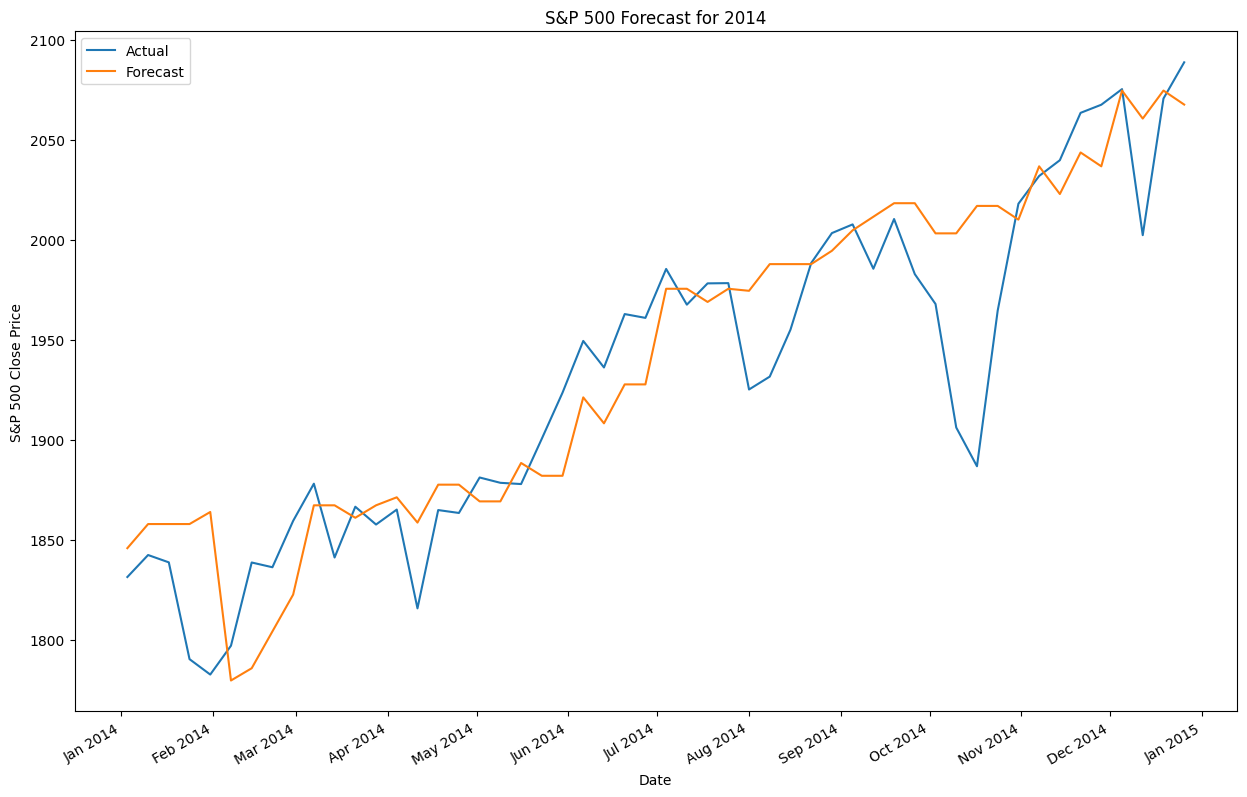

Average Error Rate: 1.37%


In [68]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2014, train_years=[60, 20, 1], forecast_months=12)

### 2010 60, 40, 20

actual_values [9.227167e+10 9.666126e+10 9.190253e+10 8.569388e+10 8.028103e+10]
predicted_values [9.58257562e+10 9.68317993e+10 9.40651971e+10 9.45682186e+10
 9.78378424e+10]


actual_values [7.384213e+10 7.800281e+10 8.194709e+10 7.800190e+10]
predicted_values [8.01217659e+10 8.11794801e+10 8.09150669e+10 7.95929108e+10]


actual_values [8.213490e+10 8.706306e+10 9.227547e+10 9.698389e+10]
predicted_values [7.69614111e+10 7.39270738e+10 7.19961252e+10 7.19961252e+10]


actual_values [1.0099076e+11 1.0550233e+11 9.7393860e+10 1.0271992e+11 9.6671660e+10]
predicted_values [9.73205504e+10 9.67342817e+10 9.52685896e+10 9.67342408e+10
 9.55617444e+10]


actual_values [8.719875e+10 9.332515e+10 8.787302e+10 9.274423e+10]
predicted_values [9.58407803e+10 9.73816463e+10 9.61489674e+10 9.55326300e+10]


actual_values [8.656365e+10 9.062293e+10 9.517829e+10 9.004945e+10]
predicted_values [9.41926728e+10 9.45097974e+10 9.41926728e+10 9.45098424e+10]


actual_values [8.608095e+10 8.958752e+10 8.429017e+10 8.881474e+10 8.480829e+10]
predicted_values [8.96911032e+10 8.61548790e+10 8.42259988e+10 8.67978691e+10
 8.93696082e+10]


actual_values [8.866618e+10 8.533729e+10 8.157572e+10 7.747326e+10]
predicted_values [8.49872118e+10 8.40028242e+10 8.59715994e+10 8.85967667e+10]


actual_values [8.100776e+10 8.406892e+10 8.815506e+10 9.227901e+10]
predicted_values [8.00567869e+10 8.23535206e+10 8.49783316e+10 8.56345313e+10]


actual_values [8.7980100e+10 9.1851520e+10 9.7576430e+10 1.0075432e+11 1.0429220e+11]
predicted_values [9.18538527e+10 8.98925609e+10 8.72774656e+10 9.05463235e+10
 9.25076152e+10]


actual_values [1.0992966e+11 1.0571604e+11 1.0939143e+11 1.0777761e+11]
predicted_values [1.02864511e+11 1.02534836e+11 1.01545775e+11 9.92379003e+10]
actual_values [1.1151339e+11 1.1606070e+11 1.2069317e+11 1.2320819e+11 1.2500796e+11]
predicted_values [1.06565591e+11 1.07570905e+11 1.05225150e+11 1.03884702e+11
 1.03549567e+11]


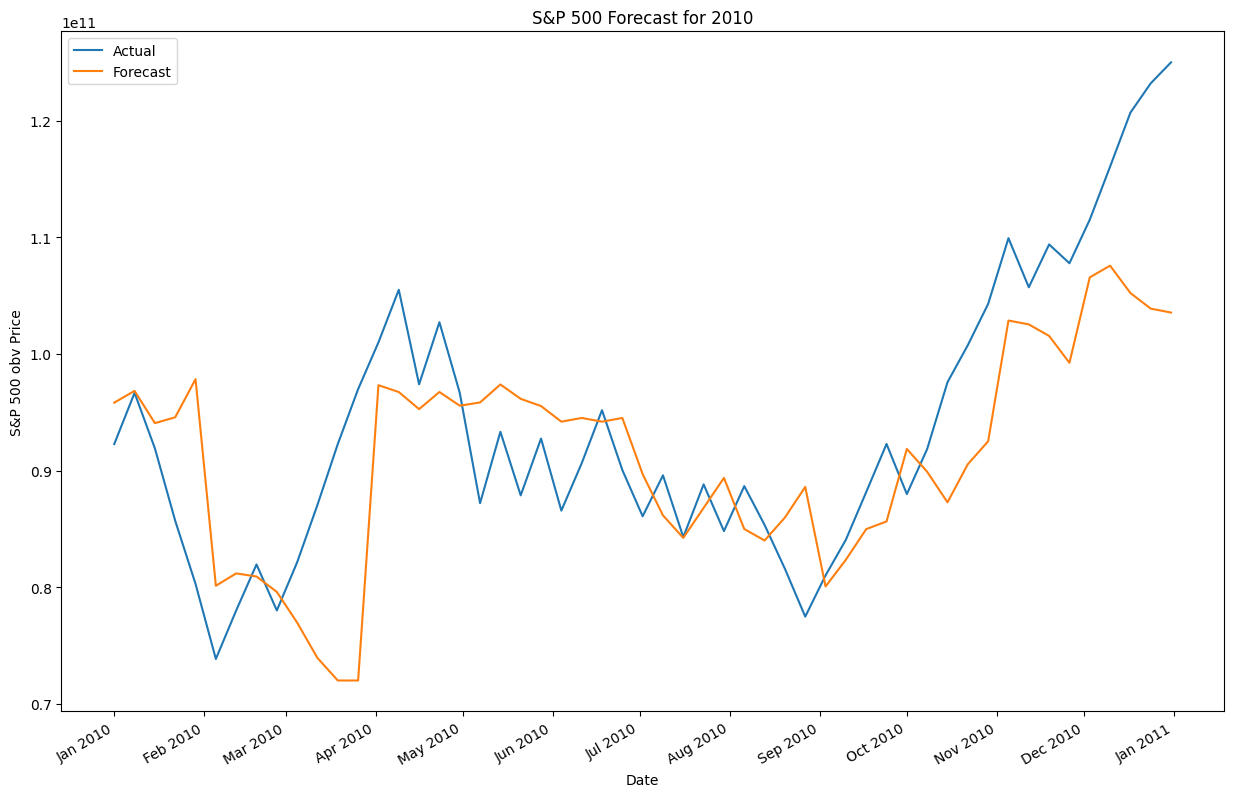

Average Error Rate: 6.91%


In [53]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2010, train_years=[60, 40, 20, 1], forecast_months=12)

### 2010 60, 20

actual_values [1115.09997559 1144.97998047 1136.0300293  1091.76000977 1073.86999512]
predicted_values [1120.796875   1127.73675537 1124.26660156 1117.32714844 1124.26660156]


actual_values [1066.18994141 1075.51000977 1109.17004395 1104.48999023]
predicted_values [1081.26159668 1088.37573242 1091.93225098 1102.60235596]


actual_values [1138.69995117 1149.98999023 1159.90002441 1166.58996582]
predicted_values [1102.37084961 1098.73242188 1113.28564453 1098.73291016]


actual_values [1178.09997559 1194.36999512 1192.13000488 1217.2800293  1186.68994141]
predicted_values [1170.10192871 1173.85247803 1177.60302734 1192.60437012 1196.35443115]


actual_values [1110.88000488 1135.68005371 1087.68994141 1089.41003418]
predicted_values [1194.9901123  1202.69921875 1210.40930176 1221.97344971]


actual_values [1064.88000488 1091.59997559 1117.51000977 1076.76000977]
predicted_values [1098.67883301 1102.60296631 1082.98339844 1098.67883301]


actual_values [1022.58001709 1077.95996094 1064.88000488 1102.66003418 1101.59997559]
predicted_values [1067.35571289 1067.35571289 1051.48382568 1055.45141602 1083.22717285]


actual_values [1121.64001465 1079.25       1071.68994141 1064.58996582]
predicted_values [1096.44854736 1096.44854736 1072.35028076 1092.43249512]


actual_values [1104.51000977 1109.55004883 1125.58996582 1148.67004395]
predicted_values [1069.31549072 1065.28063965 1065.2800293  1073.3503418 ]


actual_values [1146.23999023 1165.15002441 1176.18994141 1183.07995605 1183.26000977]
predicted_values [1144.20605469 1123.91845703 1111.74633789 1115.80352783 1136.09057617]


actual_values [1225.84997559 1199.20996094 1199.72998047 1189.40002441]
predicted_values [1167.5032959  1159.31030273 1147.02050781 1155.21350098]
actual_values [1224.70996094 1240.40002441 1243.91003418 1256.77001953 1257.64001465]
predicted_values [1181.04638672 1172.78686523 1172.78686523 1176.91662598 1176.91662598]


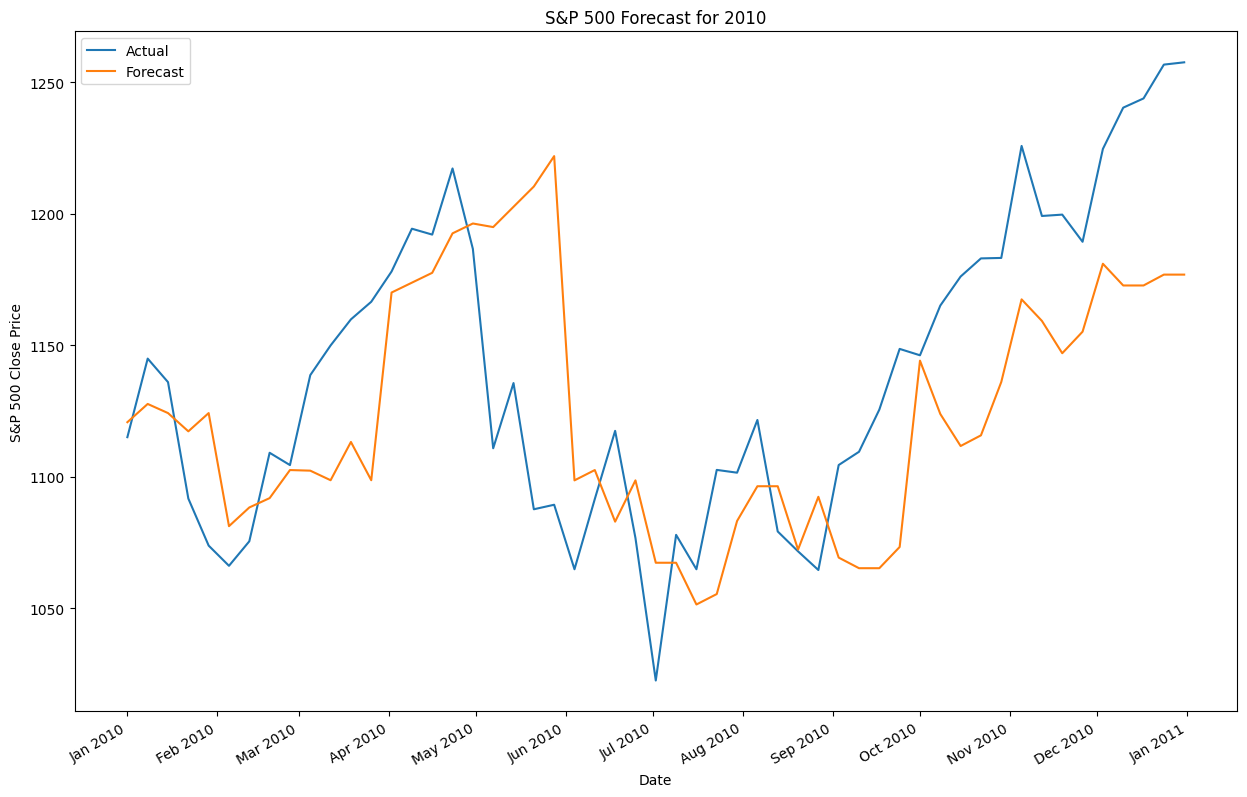

Average Error Rate: 3.53%


In [70]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2010, train_years=[60, 20, 1], forecast_months=12)

### 2009 60, 40, 20

actual_values [6.396268e+10 5.924618e+10 5.246014e+10 4.662798e+10 4.127740e+10]
predicted_values [5.81051720e+10 5.50630175e+10 5.32377272e+10 5.35419617e+10
 5.47588219e+10]


actual_values [4.776150e+10 4.246485e+10 3.425426e+10 2.532778e+10]
predicted_values [4.12992430e+10 4.04267438e+10 3.92633856e+10 3.54824172e+10]


actual_values [1.799595e+10 2.478304e+10 3.242676e+10 3.802697e+10]
predicted_values [2.26322094e+10 2.15415009e+10 2.18141962e+10 2.15415020e+10]


actual_values [4.388261e+10 5.148332e+10 5.883533e+10 5.172089e+10]
predicted_values [3.82769644e+10 3.62355261e+10 3.54700063e+10 3.41940910e+10]


actual_values [5.703306e+10 6.519634e+10 5.975662e+10 6.491194e+10 7.096236e+10]
predicted_values [5.11070269e+10 4.47794668e+10 4.35626496e+10 4.42927657e+10
 4.42927350e+10]


actual_values [7.624027e+10 8.076839e+10 7.505500e+10 6.897834e+10]
predicted_values [7.23545620e+10 7.39675750e+10 7.09720228e+10 7.14328474e+10]


actual_values [6.504734e+10 6.113526e+10 6.627664e+10 7.073494e+10 7.587401e+10]
predicted_values [6.78789366e+10 6.83314627e+10 6.72001638e+10 6.42587607e+10
 6.58425856e+10]


actual_values [8.270110e+10 7.776035e+10 8.364590e+10 8.943168e+10]
predicted_values [7.81896090e+10 7.79649434e+10 7.72909097e+10 7.68415457e+10]


actual_values [8.533431e+10 9.025691e+10 9.586488e+10 9.135779e+10]
predicted_values [8.92760801e+10 8.74860831e+10 8.59198505e+10 8.88285798e+10]


actual_values [8.577455e+10 8.953833e+10 9.443307e+10 8.966561e+10 8.315319e+10]
predicted_values [8.88554332e+10 8.84032430e+10 8.68205937e+10 8.97598136e+10
 8.56901018e+10]


actual_values [8.743032e+10 9.122293e+10 8.747170e+10 8.983461e+10]
predicted_values [8.14845542e+10 8.42703462e+10 8.33417503e+10 8.31096177e+10]
actual_values [9.561575e+10 9.940684e+10 9.308095e+10 9.434866e+10]
predicted_values [8.99384689e+10 8.96979763e+10 8.94575165e+10 8.77741629e+10]


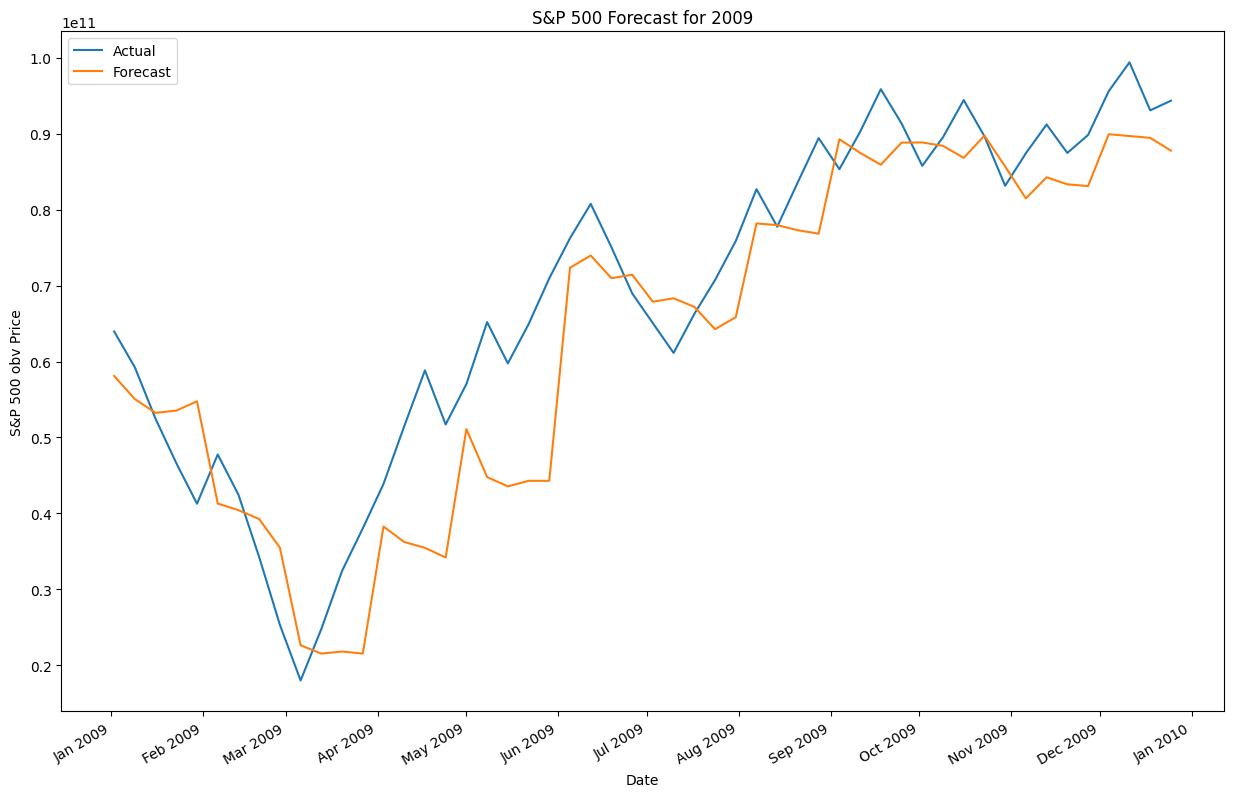

Average Error Rate: 13.24%


In [54]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2009, train_years=[60, 40, 20, 1], forecast_months=12)

### 2009 60, 20

actual_values [931.79998779 890.34997559 850.11999512 831.95001221 825.88000488]
predicted_values [877.12005615 886.06970215 881.59487915 903.97009277 886.06970215]


actual_values [868.59997559 826.84002686 770.04998779 735.09002686]
predicted_values [827.89129639 840.82678223 823.57907104 819.26742554]


actual_values [683.38000488 756.54998779 768.53997803 815.94000244]
predicted_values [745.90325928 729.32766724 725.1835022  721.03985596]


actual_values [842.5        856.55999756 869.59997559 866.22998047]
predicted_values [817.6812439  817.6812439  801.72653198 805.71496582]


actual_values [877.52001953 929.22998047 882.88000488 887.         919.14001465]
predicted_values [872.52383423 887.89865112 903.27352905 907.11700439 941.71066284]


actual_values [940.09002686 946.21002197 921.22998047 918.90002441]
predicted_values [913.06140137 935.06286621 942.396698   935.06286621]


actual_values [896.41998291 879.13000488 940.38000488 979.26000977 987.47998047]
predicted_values [927.79910278 913.57998657 924.24456787 942.01824951 945.57324219]


actual_values [1010.47998047 1004.09002686 1026.13000488 1028.93005371]
predicted_values [ 997.72601318 1001.19055176 1021.97647095 1001.19055176]


actual_values [1016.40002441 1042.72998047 1068.30004883 1044.38000488]
predicted_values [1043.01586914 1036.28625488 1049.74499512 1053.10931396]


actual_values [1025.20996094 1071.48999023 1087.68005371 1079.59997559 1036.18994141]
predicted_values [1052.21044922 1055.519104   1048.90142822 1055.519104   1042.28375244]


actual_values [1069.30004883 1093.47998047 1091.38000488 1091.48999023]
predicted_values [1037.00842285 1037.00799561 1043.6987915  1020.2822876 ]
actual_values [1105.97998047 1106.41003418 1102.4699707  1126.47998047]
predicted_values [1089.52368164 1092.9286499  1099.73815918 1089.52368164]


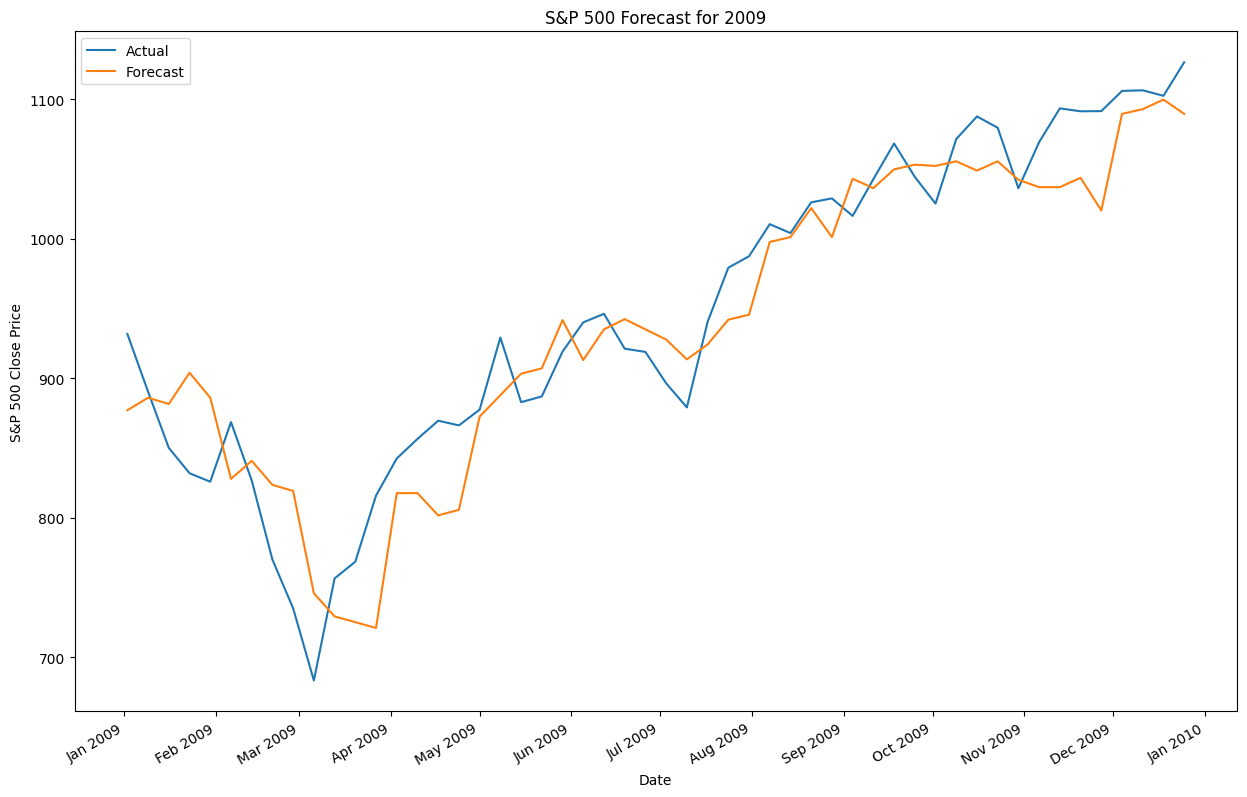

Average Error Rate: 3.62%


In [72]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2009, train_years=[60, 20, 1], forecast_months=12)

### 2008 60, 40, 20

actual_values [9.864795e+10 9.415211e+10 8.814727e+10 9.302952e+10]
predicted_values [1.02614630e+11 1.02614589e+11 1.00915696e+11 1.01255504e+11]


actual_values [9.7680290e+10 9.3911800e+10 9.7495100e+10 1.0106776e+11 9.6641030e+10]
predicted_values [9.09620429e+10 9.02781665e+10 9.02781174e+10 8.92522537e+10
 8.99361792e+10]


actual_values [9.207562e+10 8.692184e+10 9.306706e+10 8.938008e+10]
predicted_values [9.79019981e+10 1.00323623e+11 1.02399238e+11 1.02745203e+11]


actual_values [9.308318e+10 8.935939e+10 9.358177e+10 9.747292e+10]
predicted_values [9.13428111e+10 9.02929203e+10 9.13428111e+10 9.20427561e+10]


actual_values [1.0142595e+11 9.7907330e+10 1.0174992e+11 9.8233540e+10 1.0207917e+11]
predicted_values [9.40828631e+10 9.30257797e+10 9.33781258e+10 9.51400448e+10
 9.54923868e+10]


actual_values [9.730751e+10 9.322709e+10 8.790219e+10 8.169393e+10]
predicted_values [9.95102515e+10 9.88019917e+10 9.63231171e+10 9.56148613e+10]


actual_values [7.844634e+10 7.170414e+10 7.735742e+10 7.268486e+10]
predicted_values [8.41708790e+10 8.38186762e+10 8.94535885e+10 8.98057462e+10]


actual_values [7.736973e+10 8.233654e+10 8.637836e+10 8.263729e+10 7.934917e+10]
predicted_values [7.46072474e+10 7.46071982e+10 7.49526262e+10 7.59888609e+10
 7.77158533e+10]


actual_values [7.433209e+10 8.060535e+10 8.999252e+10 8.460891e+10]
predicted_values [8.05974180e+10 7.92313160e+10 8.19634749e+10 8.26465034e+10]


actual_values [7.789279e+10 6.643656e+10 7.301834e+10 6.646829e+10 7.286264e+10]
predicted_values [8.36153508e+10 8.36153508e+10 8.63235359e+10 8.59850383e+10
 8.66620867e+10]


actual_values [6.793100e+10 6.204997e+10 5.255407e+10 5.529493e+10]
predicted_values [7.52769229e+10 7.33046006e+10 7.39620454e+10 7.62630595e+10]
actual_values [4.912956e+10 5.508915e+10 6.179446e+10 5.991441e+10]
predicted_values [5.30051543e+10 5.17355725e+10 4.95137812e+10 4.82442404e+10]


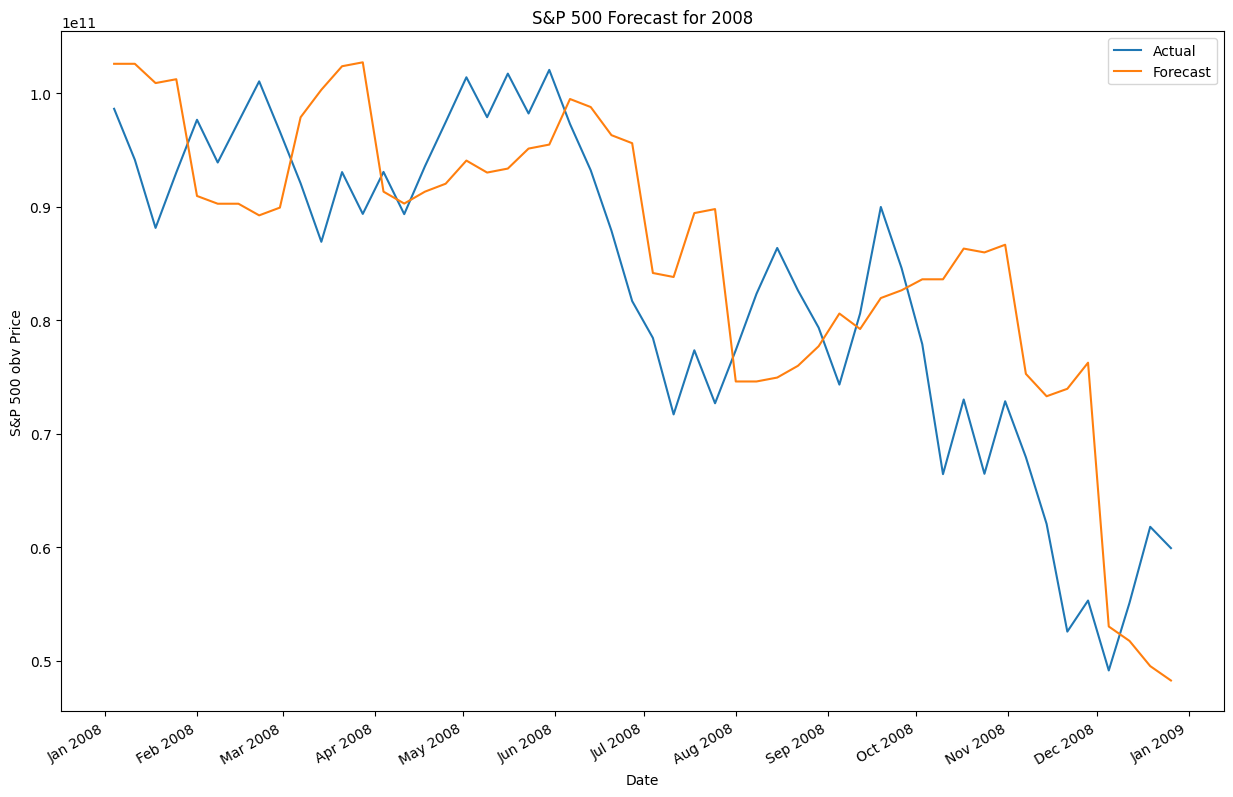

Average Error Rate: 11.18%


In [55]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2008, train_years=[60, 40, 20, 1], forecast_months=12)

### 2008 60, 20

actual_values [1411.63000488 1401.02001953 1325.18994141 1330.60998535]
predicted_values [1483.71264648 1483.71264648 1483.71264648 1478.29730225]


actual_values [1395.42004395 1331.29003906 1349.98999023 1353.10998535 1330.63000488]
predicted_values [1344.3927002  1349.79223633 1360.59057617 1371.38891602 1382.18725586]


actual_values [1293.36999512 1288.14001465 1329.51000977 1315.2199707 ]
predicted_values [1341.04870605 1373.23461914 1367.87005615 1378.59844971]


actual_values [1370.40002441 1332.82995605 1390.32995605 1397.83996582]
predicted_values [1324.30114746 1313.62060547 1324.30114746 1313.62060547]


actual_values [1413.90002441 1388.2800293  1425.34997559 1375.93005371 1400.38000488]
predicted_values [1391.97387695 1376.03564453 1376.03564453 1386.66137695 1397.28710938]


actual_values [1360.68005371 1360.0300293  1317.93005371 1278.38000488]
predicted_values [1398.831604   1393.55334473 1382.9954834  1398.831604  ]


actual_values [1262.90002441 1239.48999023 1260.68005371 1257.76000977]
predicted_values [1294.65881348 1294.65881348 1299.87884521 1294.65881348]


actual_values [1260.31005859 1296.31994629 1298.19995117 1292.19995117 1282.82995605]
predicted_values [1271.06549072 1265.91918945 1271.06549072 1265.91918945 1291.64953613]


actual_values [1242.31005859 1251.69995117 1255.07995605 1213.27001953]
predicted_values [1276.5010376  1301.92956543 1286.67236328 1286.67236328]


actual_values [1099.22998047  899.2199707   940.54998779  876.77001953  968.75      ]
predicted_values [1238.25976562 1233.24621582 1238.25976562 1233.24621582 1258.3125    ]


actual_values [930.98999023 873.28997803 800.0300293  896.23999023]
predicted_values [926.17028809 902.05099487 848.98956299 863.46063232]
actual_values [876.07000732 879.72998047 887.88000488 872.79998779]
predicted_values [868.7331543  836.21405029 812.98562622 822.27685547]


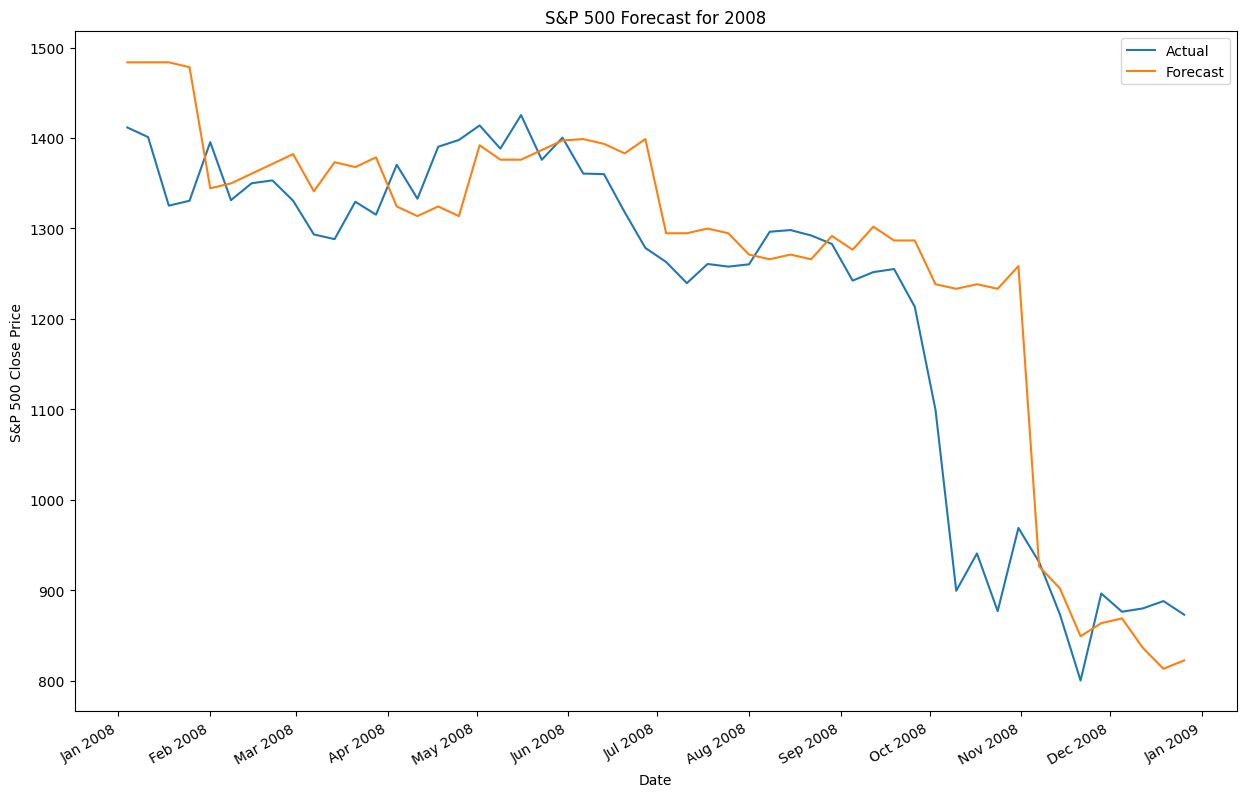

Average Error Rate: 6.07%


In [74]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2008, train_years=[60, 20, 1], forecast_months=12)

### 2007 60, 40, 20

actual_values [8.579601e+10 8.848249e+10 8.570501e+10 8.307839e+10]
predicted_values [8.83407503e+10 8.99971727e+10 9.02732186e+10 9.02732186e+10]


actual_values [8.564784e+10 8.269603e+10 8.509548e+10 8.251553e+10]
predicted_values [8.35746120e+10 8.38541066e+10 8.30155858e+10 8.32951173e+10]


actual_values [7.920327e+10 8.182632e+10 7.843268e+10 8.105170e+10 7.814774e+10]
predicted_values [8.28713165e+10 8.08982118e+10 8.25894584e+10 8.06163579e+10
 8.03344630e+10]


actual_values [8.050497e+10 8.319499e+10 8.652493e+10 8.925774e+10]
predicted_values [7.82579139e+10 7.76908636e+10 7.54224497e+10 7.59895695e+10]


actual_values [9.201967e+10 9.474045e+10 9.769950e+10 9.538325e+10]
predicted_values [8.91645665e+10 8.88778465e+10 8.83044803e+10 8.97379738e+10]


actual_values [9.831027e+10 9.531681e+10 9.872284e+10 9.443852e+10 9.760393e+10]
predicted_values [9.61708851e+10 9.67573258e+10 9.58777016e+10 9.52912937e+10
 9.52912937e+10]


actual_values [1.0004545e+11 1.0284657e+11 9.9100790e+10 9.4316140e+10]
predicted_values [9.65778842e+10 9.71833876e+10 9.74861599e+10 9.68806154e+10]


actual_values [9.004403e+10 9.538981e+10 9.181977e+10 9.436117e+10 9.162956e+10]
predicted_values [9.50467871e+10 9.50467871e+10 9.38002760e+10 9.34886687e+10
 9.38002760e+10]


actual_values [8.843848e+10 9.108022e+10 9.475968e+10 9.768503e+10]
predicted_values [9.41041664e+10 9.28324895e+10 9.47400458e+10 9.47400458e+10]


actual_values [1.0060406e+11 1.0339275e+11 9.9231780e+10 1.0284390e+11]
predicted_values [9.90135214e+10 1.00636668e+11 1.01285982e+11 1.03233782e+11]


actual_values [9.8557910e+10 9.3970860e+10 9.8139730e+10 9.6527010e+10 1.0094921e+11]
predicted_values [1.02819938e+11 1.03150526e+11 1.03811793e+11 1.05134236e+11
 1.03811793e+11]
actual_values [1.0412692e+11 1.0072587e+11 1.0523446e+11 1.0281395e+11]
predicted_values [1.00426826e+11 1.01096337e+11 1.00092092e+11 9.97573591e+10]


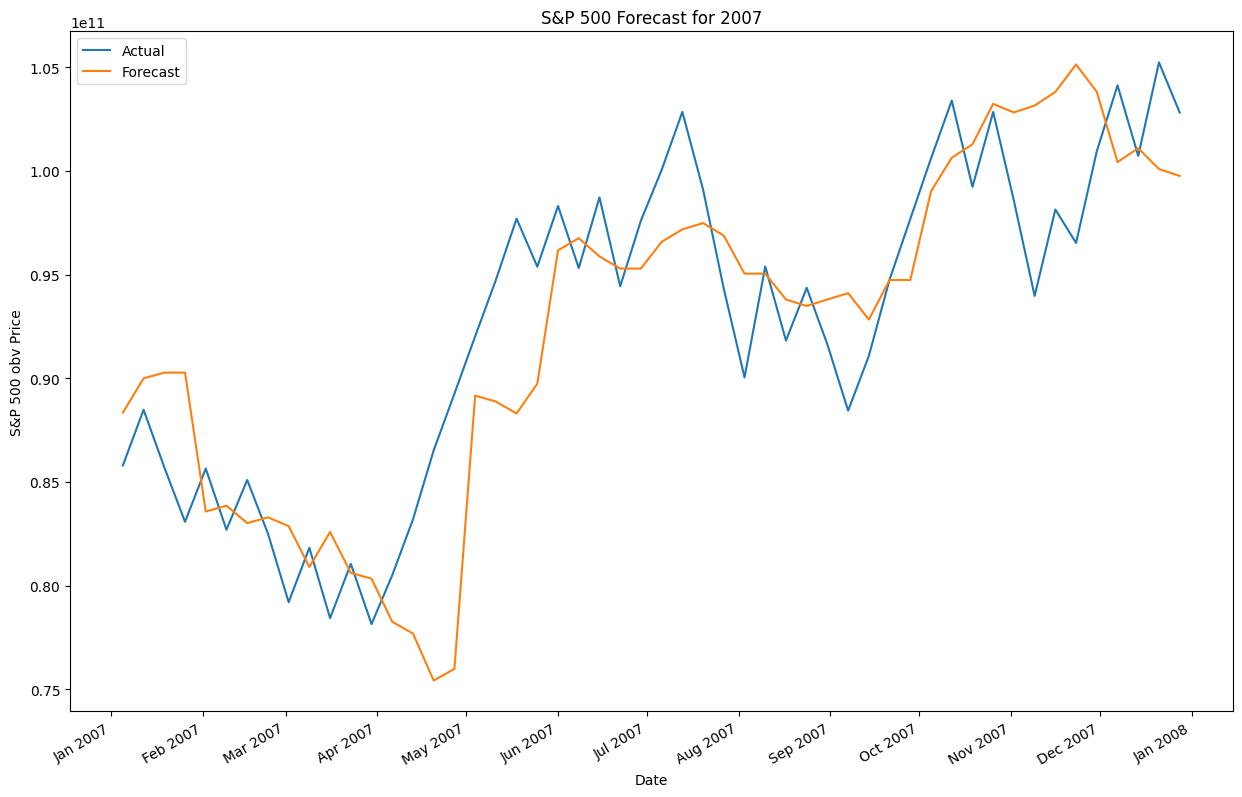

Average Error Rate: 3.85%


In [56]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2007, train_years=[60, 40, 20, 1], forecast_months=12)

### 2007 60, 20

actual_values [1409.70996094 1430.72998047 1430.5        1422.18005371]
predicted_values [1422.921875   1432.53674316 1432.53674316 1432.53674316]


actual_values [1448.39001465 1438.06005859 1455.54003906 1451.18994141]
predicted_values [1434.91674805 1439.76477051 1444.61279297 1444.61279297]


actual_values [1387.17004395 1402.83996582 1386.94995117 1436.10998535 1420.85998535]
predicted_values [1454.11657715 1459.01293945 1459.01293945 1459.01293945 1459.01293945]


actual_values [1443.76000977 1452.84997559 1484.34997559 1494.06994629]
predicted_values [1411.55541992 1411.55541992 1411.55541992 1411.55541992]


actual_values [1505.61999512 1505.84997559 1522.75       1515.72998047]
predicted_values [1504.7557373  1494.78979492 1519.70330811 1514.72033691]


actual_values [1536.33996582 1507.67004395 1532.91003418 1502.56005859 1503.34997559]
predicted_values [1523.61279297 1518.56738281 1528.65753174 1533.70227051 1538.74768066]


actual_values [1530.43994141 1552.5        1534.09997559 1458.94995117]
predicted_values [1509.69909668 1499.42834473 1519.96850586 1509.69909668]


actual_values [1433.06005859 1453.64001465 1445.93994141 1479.36999512 1473.98999023]
predicted_values [1458.64135742 1469.06079102 1463.85107422 1458.64135742 1479.47900391]


actual_values [1453.55004883 1484.25       1525.75       1526.75      ]
predicted_values [1472.6114502  1483.13085938 1477.87115479 1472.6114502 ]


actual_values [1557.58996582 1561.80004883 1500.63000488 1535.2800293 ]
predicted_values [1531.83789062 1531.83789062 1521.20080566 1531.83789062]


actual_values [1509.65002441 1453.69995117 1458.73999023 1440.69995117 1481.14001465]
predicted_values [1535.19580078 1524.45947266 1524.45947266 1524.45947266 1529.82763672]
actual_values [1504.66003418 1467.94995117 1484.45996094 1478.48999023]
predicted_values [1477.07824707 1477.07824707 1482.46868896 1487.85913086]


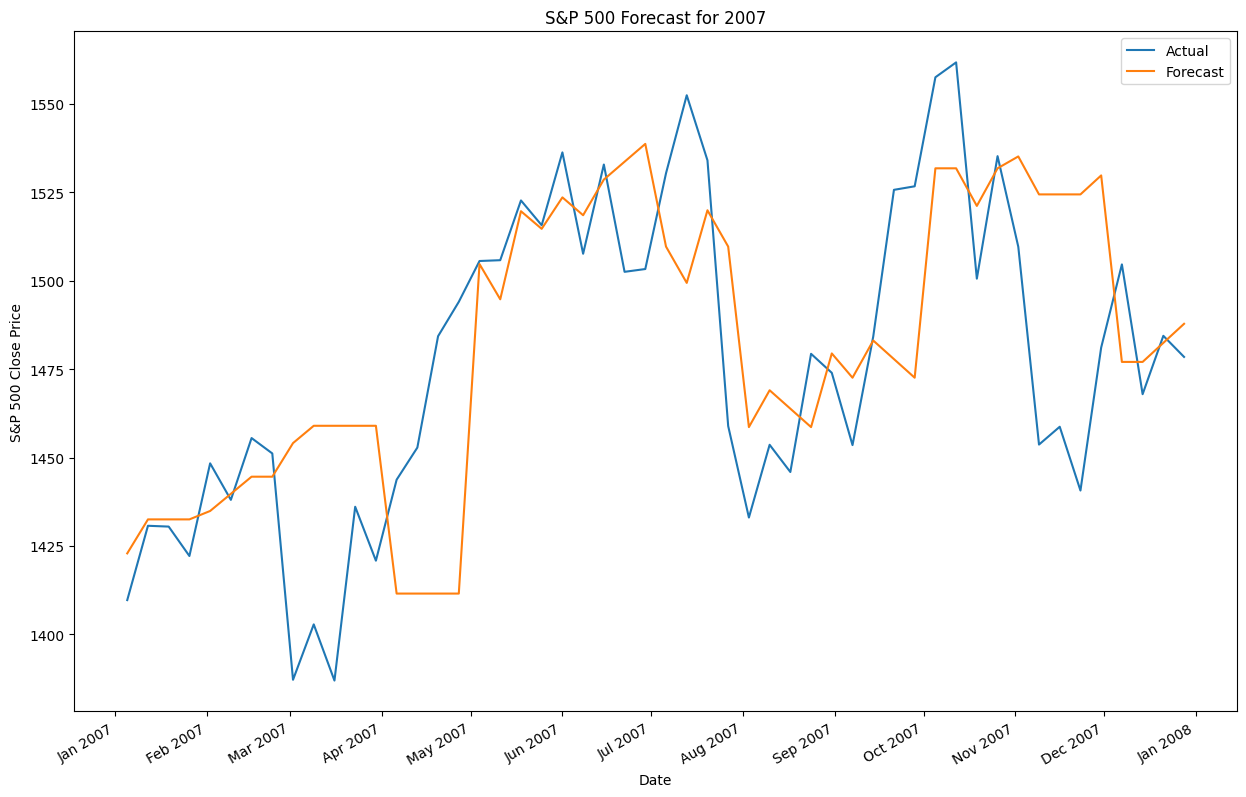

Average Error Rate: 1.81%


In [76]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2007, train_years=[60, 20, 1], forecast_months=12)

### 2006 60, 40, 20

actual_values [7.264667e+10 7.485318e+10 7.200737e+10 7.463099e+10]
predicted_values [7.05442693e+10 7.03091343e+10 7.00739994e+10 7.00739994e+10]


actual_values [7.234878e+10 7.463883e+10 7.676709e+10 7.870010e+10]
predicted_values [7.46980721e+10 7.44578703e+10 7.49382738e+10 7.63793900e+10]


actual_values [7.654715e+10 7.442370e+10 7.697332e+10 7.464725e+10 7.241054e+10]
predicted_values [7.81891174e+10 7.81891174e+10 7.81891174e+10 7.79440292e+10
 7.79439923e+10]


actual_values [7.449301e+10 7.260107e+10 7.499370e+10 7.257378e+10]
predicted_values [7.31194327e+10 7.38706719e+10 7.41210604e+10 7.46219110e+10]


actual_values [7.486854e+10 7.230057e+10 6.931827e+10 7.113229e+10]
predicted_values [7.30662748e+10 7.43436370e+10 7.53655398e+10 7.43436370e+10]


actual_values [7.342783e+10 7.121383e+10 6.843044e+10 6.641317e+10 6.946273e+10]
predicted_values [7.20714301e+10 7.12964506e+10 7.10381486e+10 7.12964506e+10
 7.28463729e+10]


actual_values [6.747458e+10 6.500746e+10 6.771155e+10 7.019197e+10]
predicted_values [6.91751158e+10 6.86550303e+10 6.91751158e+10 6.96952627e+10]


actual_values [7.272294e+10 7.071840e+10 7.275231e+10 7.108473e+10]
predicted_values [6.91665060e+10 6.86464942e+10 6.91665060e+10 7.02066770e+10]


actual_values [7.288525e+10 7.075236e+10 7.395039e+10 7.178751e+10 7.406094e+10]
predicted_values [6.92952351e+10 6.87742484e+10 6.87742177e+10 6.92952351e+10
 6.79927091e+10]


actual_values [7.658394e+10 7.906686e+10 8.159327e+10 8.405172e+10]
predicted_values [7.32501934e+10 7.29886024e+10 7.19421686e+10 7.22037555e+10]


actual_values [8.163199e+10 8.392219e+10 8.664829e+10 8.581574e+10]
predicted_values [8.29881057e+10 8.37860803e+10 8.29881385e+10 8.32541082e+10]
actual_values [8.301476e+10 8.545522e+10 8.868480e+10 8.703721e+10 8.871541e+10]
predicted_values [8.59221524e+10 8.67327181e+10 8.78134968e+10 8.67327181e+10
 8.67327181e+10]


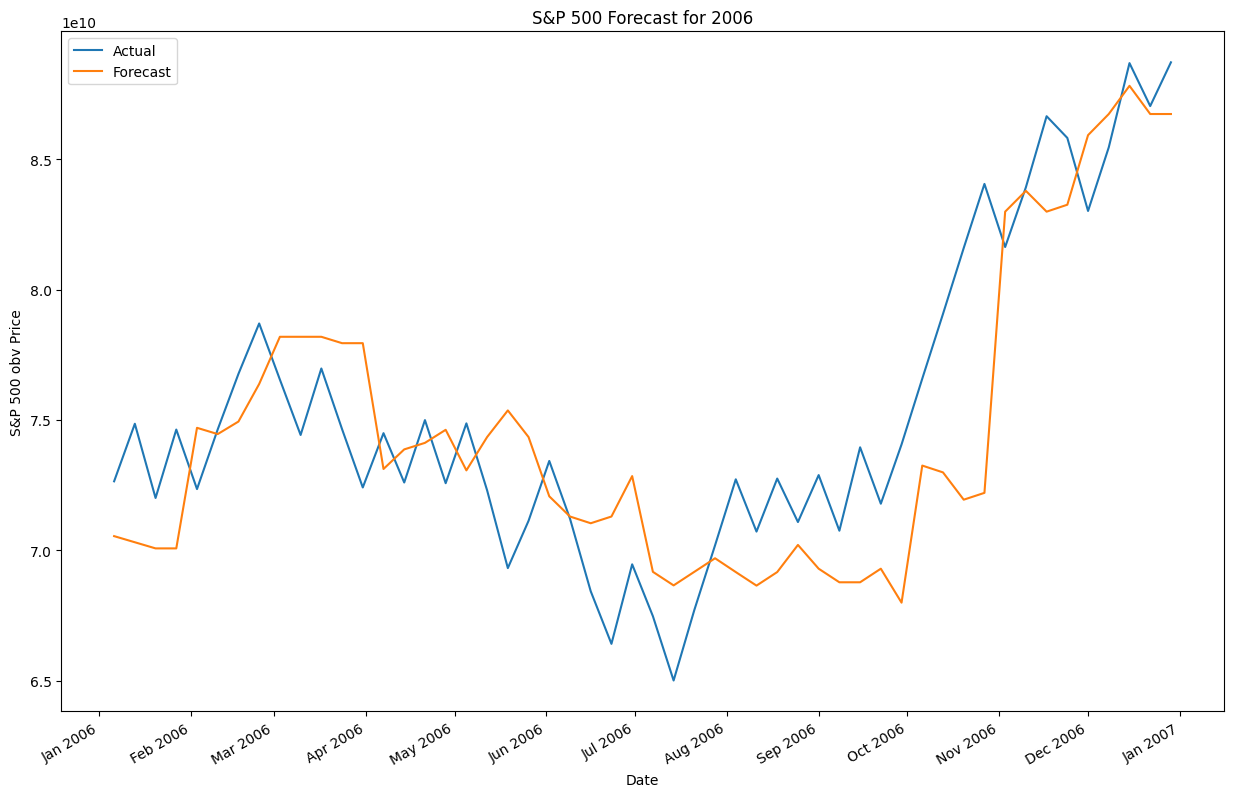

Average Error Rate: 3.83%


In [57]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2006, train_years=[60, 40, 20, 1], forecast_months=12)

### 2006 60, 20

actual_values [1285.44995117 1287.60998535 1261.48999023 1283.7199707 ]
predicted_values [1239.60852051 1248.46350098 1248.46350098 1239.60852051]


actual_values [1264.0300293  1266.98999023 1287.23999023 1289.43005371]
predicted_values [1283.31591797 1283.31591797 1274.40466309 1274.40466309]


actual_values [1287.22998047 1281.42004395 1307.25       1302.94995117 1294.86999512]
predicted_values [1289.13049316 1289.13049316 1280.17883301 1280.17883301 1289.13049316]


actual_values [1295.5        1289.11999512 1311.2800293  1310.60998535]
predicted_values [1298.47961426 1298.47961426 1289.4630127  1293.97131348]


actual_values [1325.76000977 1291.23999023 1267.0300293  1280.16003418]
predicted_values [1311.28540039 1311.28540039 1302.17980957 1311.28540039]


actual_values [1288.2199707  1252.30004883 1251.54003906 1244.5        1270.19995117]
predicted_values [1283.75744629 1283.75744629 1283.75744629 1283.75744629 1288.34259033]


actual_values [1265.47998047 1236.19995117 1240.29003906 1278.55004883]
predicted_values [1261.0501709  1261.0501709  1261.0501709  1256.44750977]


actual_values [1279.35998535 1266.73999023 1302.30004883 1295.08996582]
predicted_values [1273.63916016 1264.41052246 1264.41052246 1250.56628418]


actual_values [1311.01000977 1298.92004395 1319.66003418 1314.7800293  1335.84997559]
predicted_values [1292.63366699 1283.36749268 1278.73413086 1278.73413086 1278.73413086]


actual_values [1349.58996582 1365.61999512 1368.59997559 1377.33996582]
predicted_values [1333.91064453 1324.58190918 1324.58190918 1324.58190918]


actual_values [1364.30004883 1380.90002441 1401.19995117 1400.94995117]
predicted_values [1385.74450684 1376.3170166  1395.1706543  1385.74450684]
actual_values [1396.70996094 1409.83996582 1427.08996582 1410.76000977 1418.30004883]
predicted_values [1402.43536377 1392.92736816 1407.18908691 1397.68164062 1392.92736816]


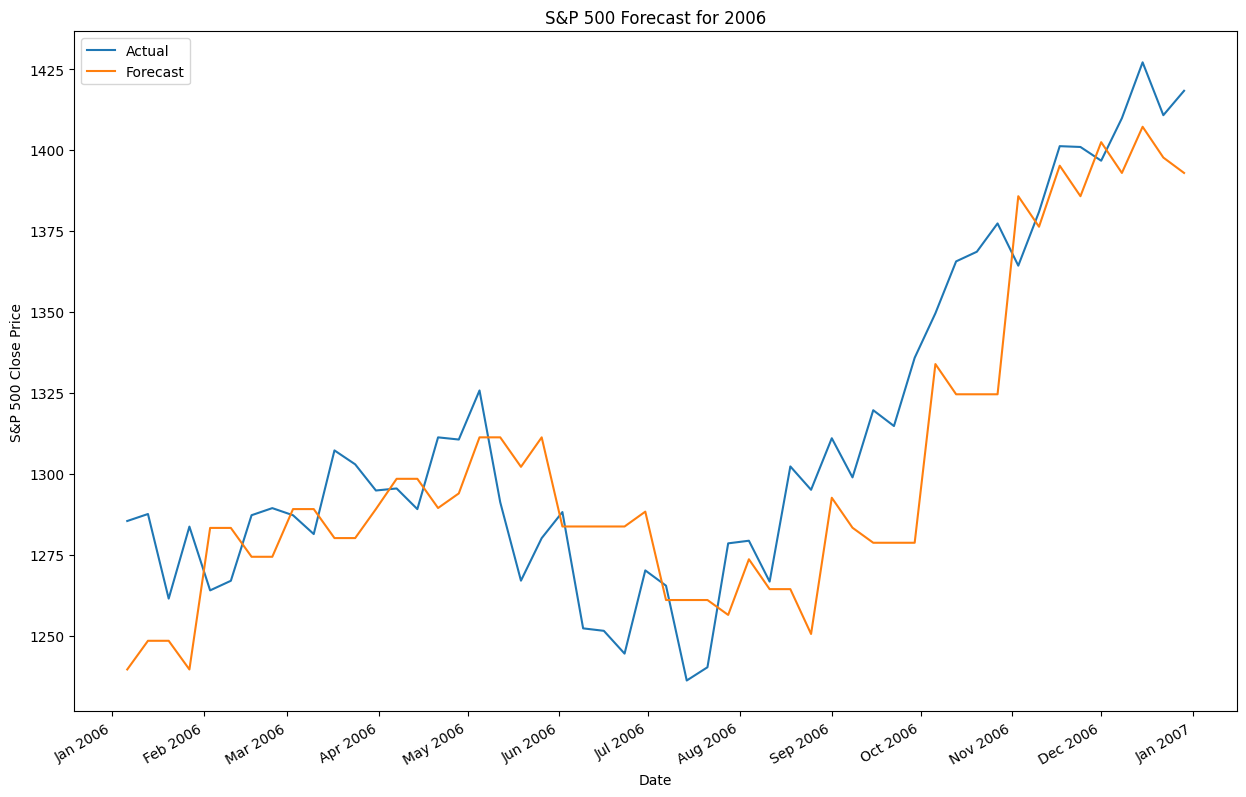

Average Error Rate: 1.71%


In [78]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2006, train_years=[60, 20, 1], forecast_months=12)

## Whole Year

### 2014

actual_values [2.1952427e+11 2.2285998e+11 2.1923386e+11 2.1461541e+11 2.1055572e+11
 2.1433171e+11 2.1744646e+11 2.1404258e+11 2.1796003e+11 2.2152477e+11
 2.1823931e+11 2.2351002e+11 2.2055450e+11 2.2413825e+11 2.2039479e+11
 2.2373622e+11 2.2052320e+11 2.2368276e+11 2.2065774e+11 2.1748409e+11
 2.1988037e+11 2.2314386e+11 2.2600816e+11 2.2340993e+11 2.2774617e+11
 2.2345558e+11 2.2545367e+11 2.2276904e+11 2.2587510e+11 2.2851406e+11
 2.2472440e+11 2.2762668e+11 2.3065006e+11 2.3295192e+11 2.3521105e+11
 2.3802935e+11 2.3482278e+11 2.3970300e+11 2.3677356e+11 2.3321259e+11
 2.2866205e+11 2.2417993e+11 2.2725831e+11 2.3155060e+11 2.3525488e+11
 2.3848201e+11 2.4239843e+11 2.4490307e+11]
predicted_values [2.23780127e+11 2.22372610e+11 2.24483787e+11 2.25187447e+11
 2.25187447e+11 2.26594963e+11 2.28002284e+11 2.26594865e+11
 2.28706042e+11 2.27298623e+11 2.29409710e+11 2.30817219e+11
 2.34335732e+11 2.32928305e+11 2.35039490e+11 2.37150568e+11
 2.33631973e+11 2.33631973e+11 2.36446908e

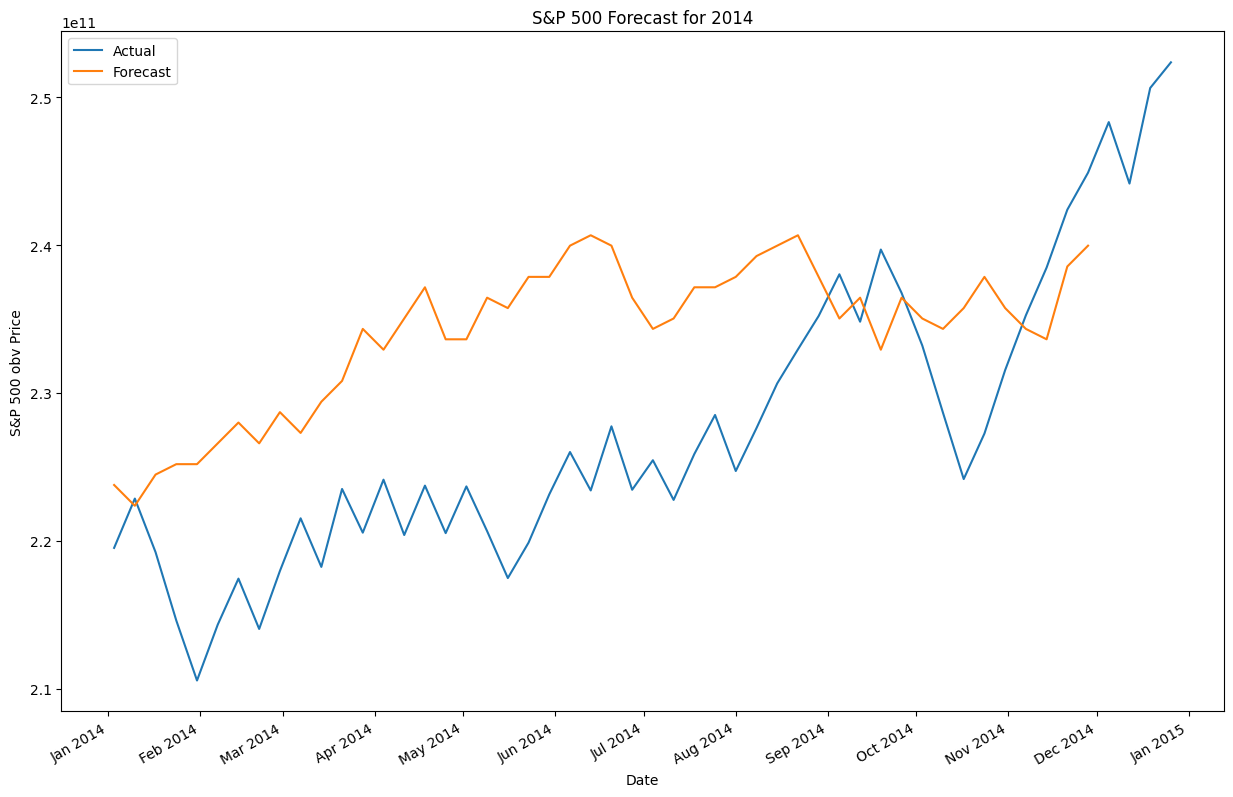

Average Error Rate: 4.18%


In [58]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2014, train_years=[60, 40, 20, 1], forecast_months=1, month_offset=11) 

### 2015

actual_values [2.4965710e+11 2.4629296e+11 2.4223655e+11 2.4581011e+11 2.4124146e+11
 2.4547443e+11 2.4900188e+11 2.5228348e+11 2.4873610e+11 2.4488253e+11
 2.4138397e+11 2.4693809e+11 2.4392954e+11 2.4702550e+11 2.5018170e+11
 2.4655410e+11 2.4992988e+11 2.4655049e+11 2.4994993e+11 2.5304201e+11
 2.5561387e+11 2.5168648e+11 2.4844279e+11 2.5116219e+11 2.5561200e+11
 2.5058653e+11 2.4758999e+11 2.4452492e+11 2.4788767e+11 2.4401763e+11
 2.4769897e+11 2.4409665e+11 2.4689224e+11 2.4187400e+11 2.4582308e+11
 2.4265599e+11 2.4587458e+11 2.3985334e+11 2.3613147e+11 2.4051004e+11
 2.4421694e+11 2.4781237e+11 2.5192083e+11 2.5617703e+11 2.6054605e+11
 2.5626730e+11 2.6019690e+11 2.6166374e+11]
predicted_values [2.51918320e+11 2.50249871e+11 2.51084095e+11 2.51918320e+11
 2.51084095e+11 2.55254970e+11 2.52752429e+11 2.53586538e+11
 2.58591638e+11 2.58591638e+11 2.54420754e+11 2.55254970e+11
 2.55254970e+11 2.55254864e+11 2.52752429e+11 2.54420754e+11
 2.56089080e+11 2.61928190e+11 2.65264857e

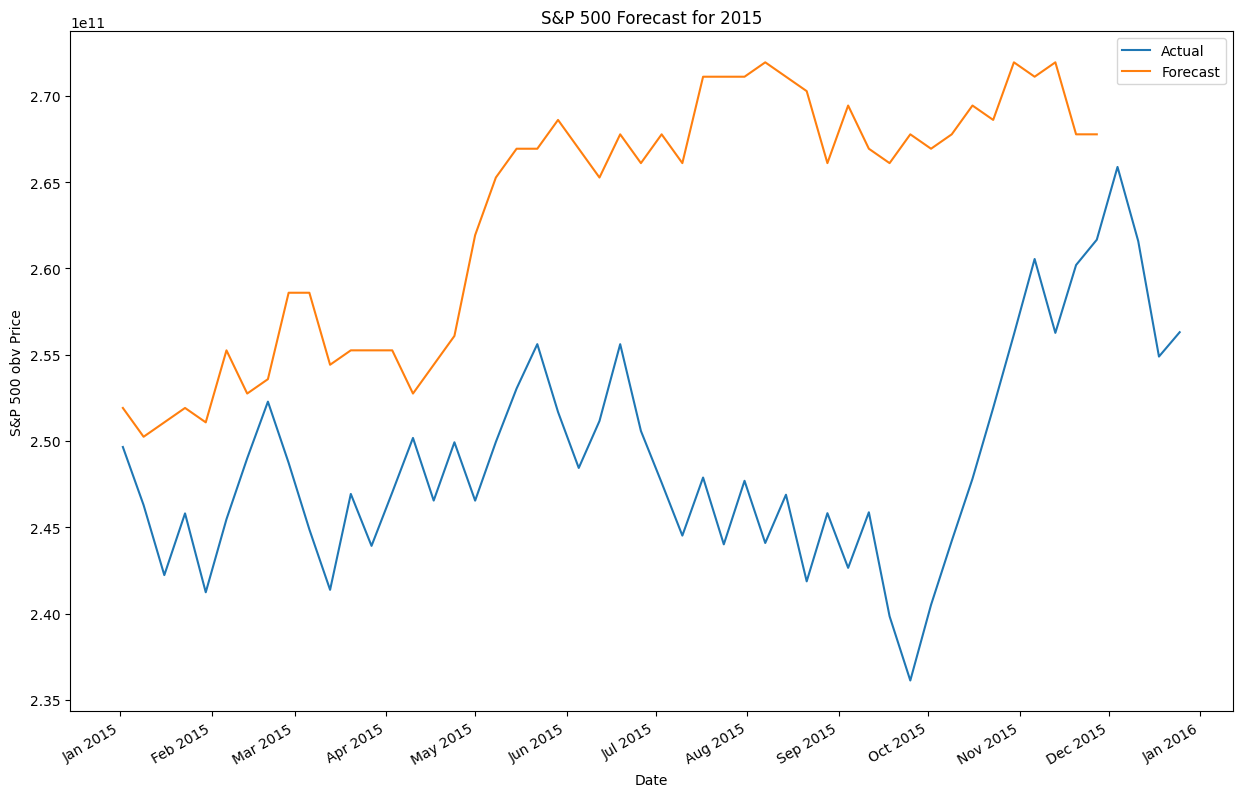

Average Error Rate: 6.13%


In [59]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2015, train_years=[60, 40, 20, 1], forecast_months=1, month_offset=11) 

### 2016

actual_values [2.5365105e+11 2.4898611e+11 2.4351765e+11 2.4841941e+11 2.5391698e+11
 2.4898704e+11 2.4429012e+11 2.4843297e+11 2.5278148e+11 2.5883141e+11
 2.6291003e+11 2.6941317e+11 2.6600545e+11 2.6975544e+11 2.6639591e+11
 2.7009736e+11 2.7388794e+11 2.6918322e+11 2.6538687e+11 2.6180699e+11
 2.6531464e+11 2.6839379e+11 2.7202157e+11 2.6850656e+11 2.6355393e+11
 2.5595648e+11 2.5941537e+11 2.6302287e+11 2.6614547e+11 2.6916875e+11
 2.6512991e+11 2.6879298e+11 2.7179364e+11 2.6870884e+11 2.6536650e+11
 2.6845762e+11 2.6422366e+11 2.6923802e+11 2.7252788e+11 2.7668668e+11
 2.7310791e+11 2.6992000e+11 2.7337639e+11 2.6934812e+11 2.6550621e+11
 2.7050020e+11 2.7408110e+11 2.7566569e+11]
predicted_values [2.55553946e+11 2.53728686e+11 2.51903181e+11 2.52815933e+11
 2.52815933e+11 2.53728686e+11 2.53728686e+11 2.52815933e+11
 2.53728563e+11 2.52815933e+11 2.50990551e+11 2.49165169e+11
 2.52815933e+11 2.52815933e+11 2.54641316e+11 2.53728686e+11
 2.53728563e+11 2.55553946e+11 2.57379451e

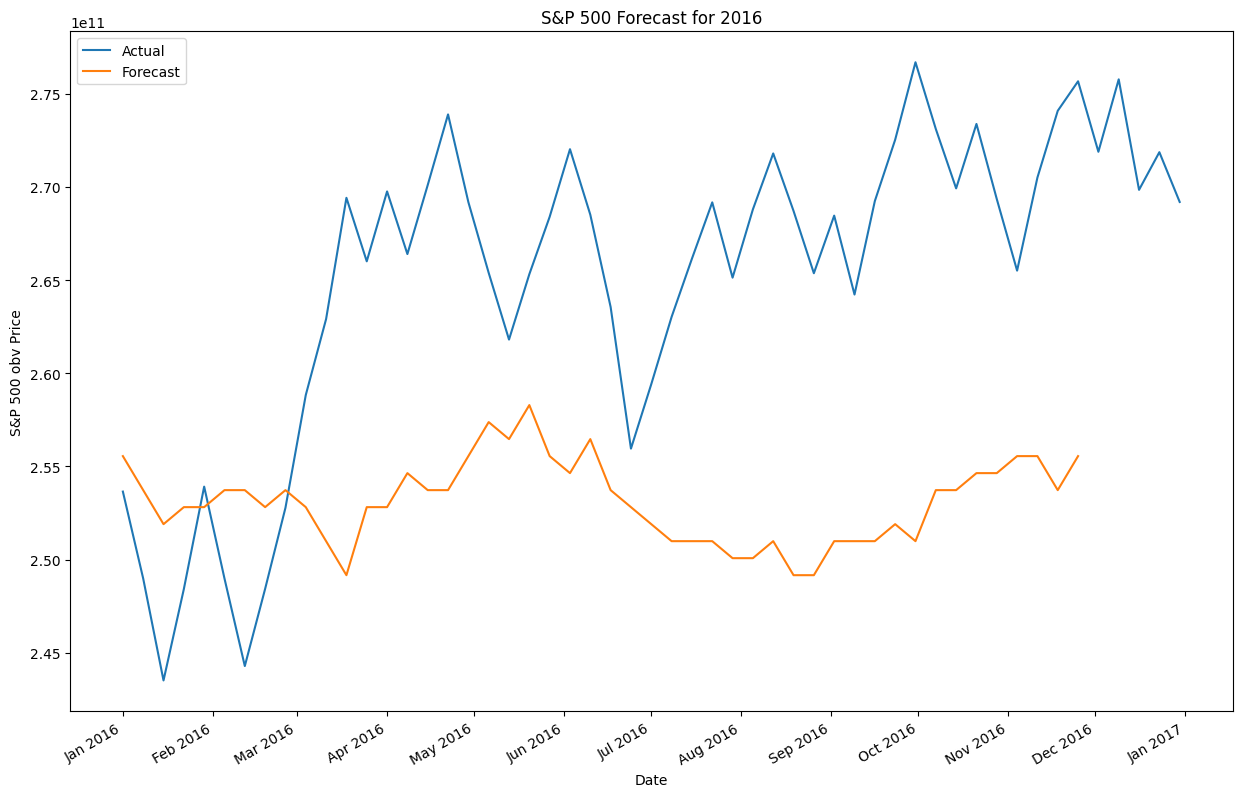

Average Error Rate: 4.82%


In [60]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2016, train_years=[60, 40, 20, 1], forecast_months=1, month_offset=11) 

### 2017

actual_values [2.7253256e+11 2.6944188e+11 2.6590503e+11 2.6904245e+11 2.7264842e+11
 2.7614502e+11 2.7966185e+11 2.8349426e+11 2.8705093e+11 2.8361653e+11
 2.8879635e+11 2.8581782e+11 2.8917456e+11 2.8611986e+11 2.8297348e+11
 2.8649764e+11 2.9021899e+11 2.9376223e+11 2.9045761e+11 2.8662591e+11
 2.8943284e+11 2.9289834e+11 2.8886848e+11 2.9416786e+11 2.9945032e+11
 2.9608429e+11 2.9901368e+11 3.0175214e+11 3.0481902e+11 3.0151617e+11
 3.0475615e+11 3.0159432e+11 2.9816735e+11 3.0076070e+11 3.0347348e+11
 3.0016512e+11 3.0502809e+11 3.0790607e+11 3.1112633e+11 3.1402460e+11
 3.1717507e+11 3.2056952e+11 3.2446562e+11 3.2803433e+11 3.2454459e+11
 3.2123479e+11 3.2262068e+11]
predicted_values [2.71102550e+11 2.70130921e+11 2.68187419e+11 2.69159170e+11
 2.72074179e+11 2.74017698e+11 2.74017698e+11 2.71102550e+11
 2.72074179e+11 2.71102550e+11 2.74017698e+11 2.73045938e+11
 2.72074179e+11 2.73045938e+11 2.75960955e+11 2.73045938e+11
 2.71102558e+11 2.71102550e+11 2.74017567e+11 2.74017567

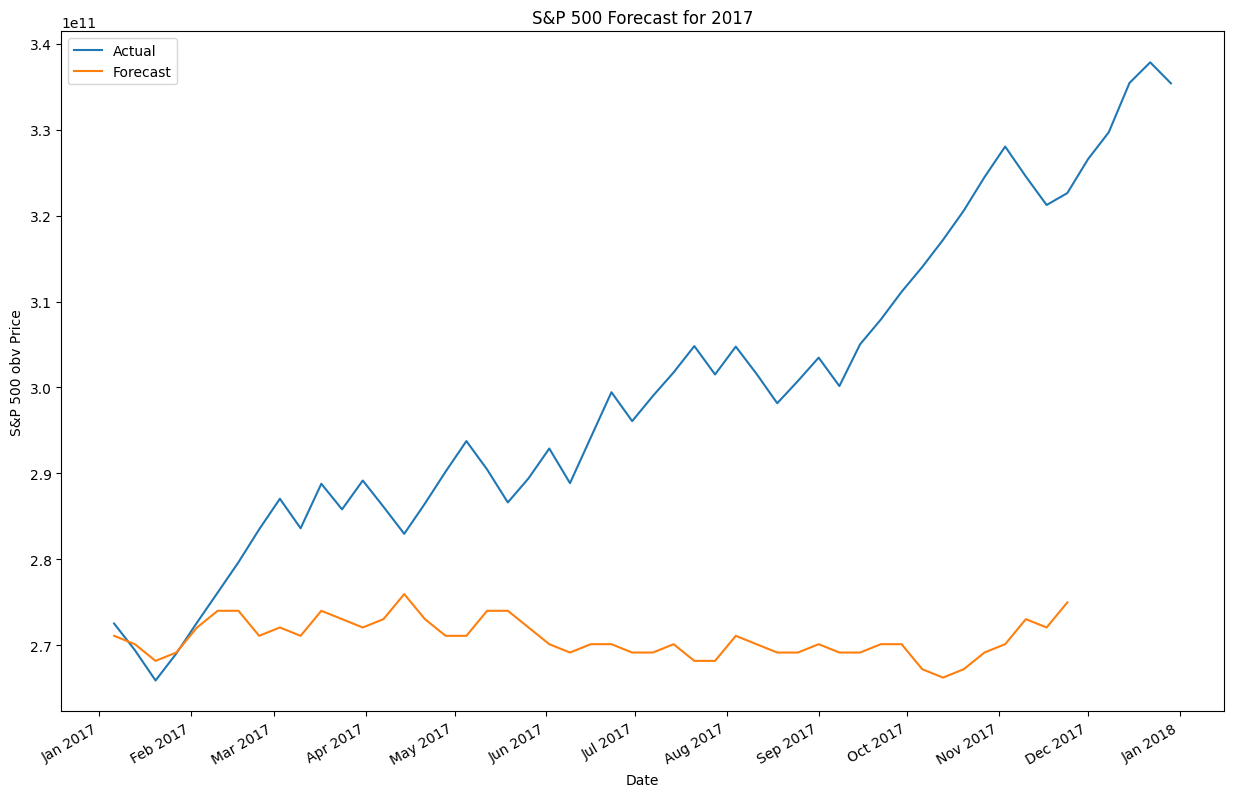

Average Error Rate: 8.30%


In [61]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2017, train_years=[60, 40, 20, 1], forecast_months=1, month_offset=11) 

### 2018

actual_values [3.3862782e+11 3.4221504e+11 3.4593927e+11 3.4941395e+11 3.4507373e+11
 3.3938362e+11 3.4303054e+11 3.4623090e+11 3.4233965e+11 3.4571652e+11
 3.4028738e+11 3.3645800e+11 3.4003036e+11 3.3671797e+11 3.3970651e+11
 3.4313477e+11 3.3990026e+11 3.3656500e+11 3.3943985e+11 3.3605658e+11
 3.3907184e+11 3.4276615e+11 3.4590500e+11 3.5135699e+11 3.4588888e+11
 3.4230208e+11 3.4489233e+11 3.4751212e+11 3.5075537e+11 3.5418974e+11
 3.5723343e+11 3.5396784e+11 3.5700548e+11 3.5960849e+11 3.6249571e+11
 3.5951913e+11 3.6269854e+11 3.6835101e+11 3.6488933e+11 3.6154851e+11
 3.5752450e+11 3.6111844e+11 3.5631411e+11 3.6057534e+11 3.6460437e+11
 3.6060740e+11 3.5895572e+11 3.6362403e+11]
predicted_values [3.36377283e+11 3.37695146e+11 3.37804984e+11 3.38793333e+11
 3.40440678e+11 3.40879966e+11 3.40330873e+11 3.42417408e+11
 3.42527181e+11 3.43954883e+11 3.43405756e+11 3.43735206e+11
 3.44174559e+11 3.44064721e+11 3.47249443e+11 3.49116400e+11
 3.49665493e+11 3.50873518e+11 3.51861866e

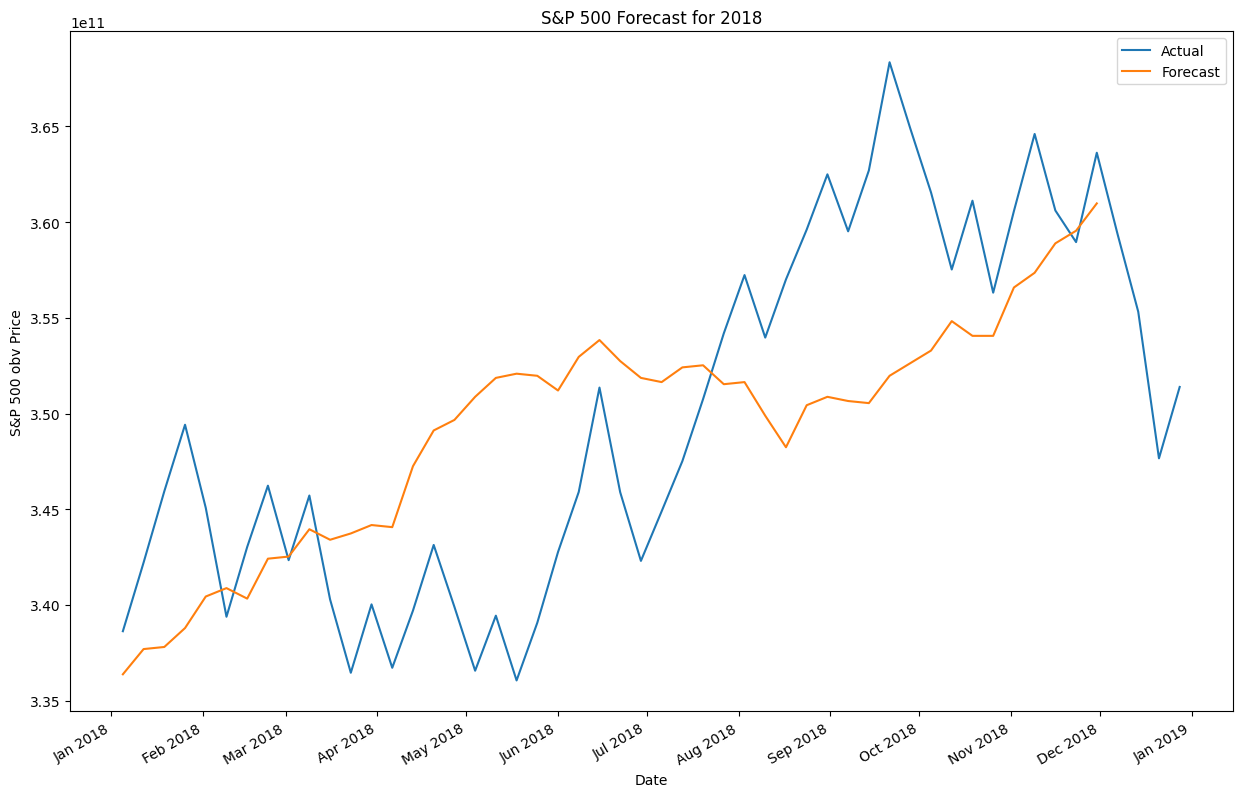

Average Error Rate: 1.89%


In [33]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2018, train_years=[60, 40, 20, 1], forecast_months=1, month_offset=11) 

### 2019

actual_values [3.5562211e+11 3.5906957e+11 3.6307858e+11 3.5925758e+11 3.6304007e+11
 3.6668958e+11 3.7033826e+11 3.7376761e+11 3.7776256e+11 3.7433826e+11
 3.8030804e+11 3.7605431e+11 3.7980683e+11 3.8296280e+11 3.8668885e+11
 3.8318175e+11 3.8644614e+11 3.8980332e+11 3.8623654e+11 3.8292050e+11
 3.8003127e+11 3.7604860e+11 3.7929298e+11 3.8228579e+11 3.8728933e+11
 3.8186668e+11 3.8430136e+11 3.8728550e+11 3.8399961e+11 3.8725978e+11
 3.8337697e+11 3.8002012e+11 3.7649604e+11 3.7255352e+11 3.7556343e+11
 3.7877277e+11 3.8232978e+11 3.7622634e+11 3.7297986e+11 3.6997426e+11
 3.7355558e+11 3.7682455e+11 3.8020361e+11 3.8415990e+11 3.8766806e+11
 3.9102786e+11 3.8779259e+11 3.8953601e+11]
predicted_values [3.49524787e+11 3.48370371e+11 3.47728970e+11 3.47215921e+11
 3.48498559e+11 3.48755132e+11 3.48370305e+11 3.49524689e+11
 3.47857191e+11 3.45804997e+11 3.45548456e+11 3.43239655e+11
 3.43624450e+11 3.44778834e+11 3.43624417e+11 3.42085337e+11
 3.41059109e+11 3.40930822e+11 3.42854861e

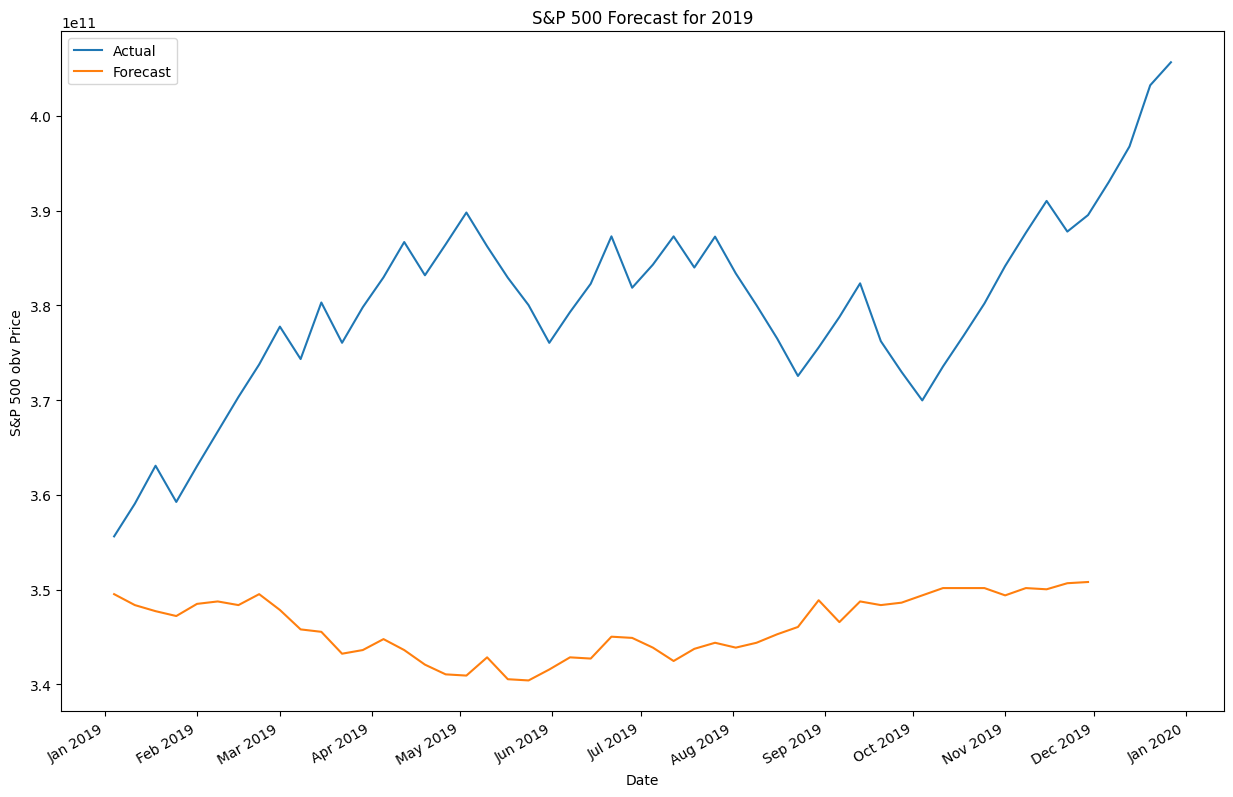

Average Error Rate: 8.49%


In [32]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2019, train_years=[60, 40, 20, 1], forecast_months=1, month_offset=11) 

### 2020

actual_values [4.0217890e+11 4.0539348e+11 4.0911970e+11 4.0541092e+11 4.0088122e+11
 4.0461514e+11 4.0803484e+11 4.0412606e+11 3.9555649e+11 4.0211173e+11
 3.9381266e+11 3.8475871e+11 3.9096038e+11 3.8486341e+11 3.9276296e+11
 3.9856777e+11 3.9318496e+11 3.8842515e+11 3.9330118e+11 3.8779348e+11
 3.9176434e+11 3.9906189e+11 4.0770119e+11 4.0185586e+11 4.1020251e+11
 4.0209466e+11 4.0629238e+11 4.1081657e+11 4.1482942e+11 4.1114001e+11
 4.1614754e+11 4.2025757e+11 4.2345763e+11 4.2696264e+11 4.3083115e+11
 4.2639243e+11 4.2268234e+11 4.1560594e+11 4.1180261e+11 4.1577779e+11
 4.1972188e+11 4.2440991e+11 4.2075831e+11 4.1591438e+11 4.2075684e+11
 4.2547642e+11 4.2124005e+11 4.2401844e+11]
predicted_values [4.08515445e+11 4.08097554e+11 4.09908806e+11 4.10744783e+11
 4.10605355e+11 4.09072763e+11 4.09351422e+11 4.11162739e+11
 4.10884080e+11 4.10187366e+11 4.10048102e+11 4.10187465e+11
 4.09072763e+11 4.08933532e+11 4.10326761e+11 4.09490784e+11
 4.10326729e+11 4.11580695e+11 4.12138045e

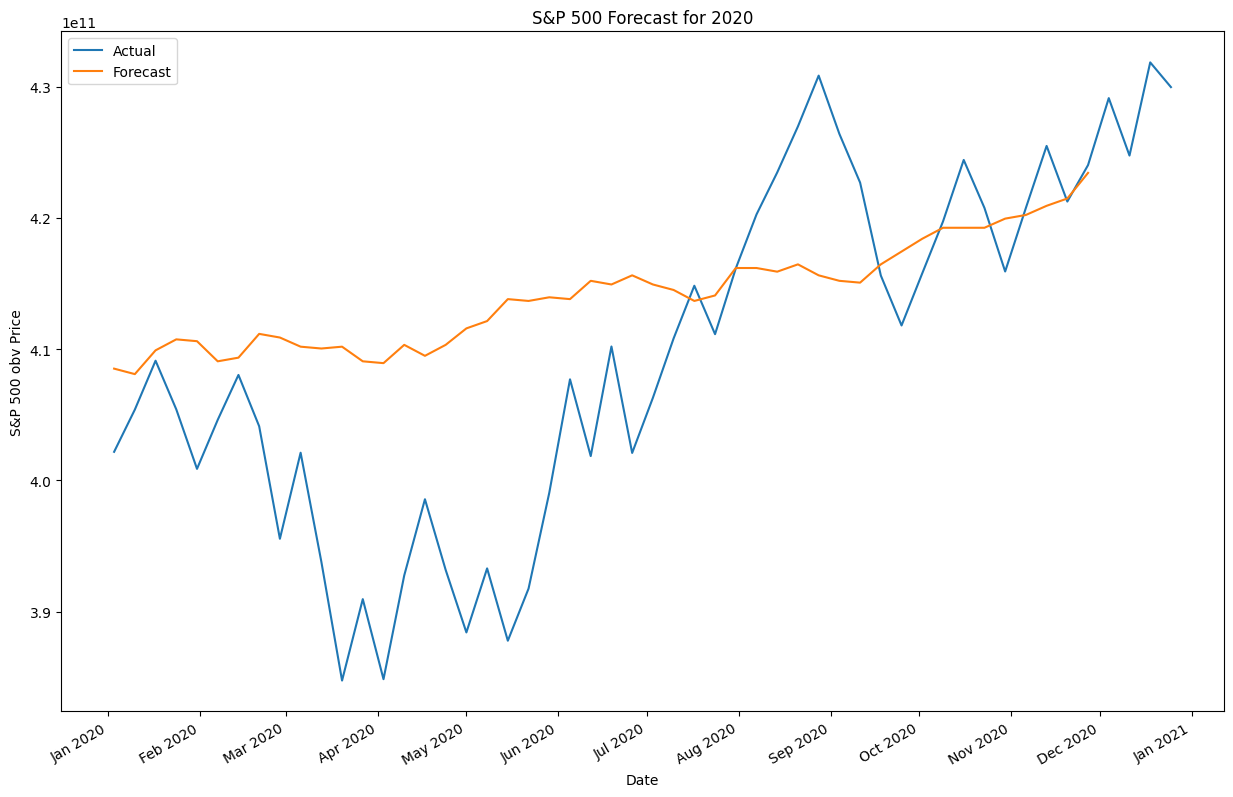

Average Error Rate: 2.25%


In [31]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2020, train_years=[60, 40, 20, 1], forecast_months=1, month_offset=11) 

### 2021

actual_values [4.3313495e+11 4.3790799e+11 4.3253817e+11 4.3764906e+11 4.3100569e+11
 4.3588516e+11 4.4002022e+11 4.3517490e+11 4.2864883e+11 4.3549990e+11
 4.3997618e+11 4.3221876e+11 4.3770192e+11 4.4186405e+11 4.4550444e+11
 4.4966826e+11 4.4609838e+11 4.5039926e+11 4.5441534e+11 4.5040646e+11
 4.4641121e+11 4.5106046e+11 4.5520025e+11 4.5901526e+11 4.5219825e+11
 4.5953970e+11 4.6276554e+11 4.6629666e+11 4.6231096e+11 4.6685103e+11
 4.6289429e+11 4.6634616e+11 4.6936263e+11 4.6571002e+11 4.6904122e+11
 4.7225875e+11 4.6863557e+11 4.6134604e+11 4.6473033e+11 4.6071996e+11
 4.6400012e+11 4.6781950e+11 4.7157772e+11 4.7608792e+11 4.8055510e+11
 4.7682650e+11 4.8107968e+11 4.7756198e+11]
predicted_values [4.28524372e+11 4.28073976e+11 4.24770601e+11 4.25521349e+11
 4.28374163e+11 4.27173020e+11 4.26722558e+11 4.25221095e+11
 4.26272162e+11 4.27172987e+11 4.27323163e+11 4.25821635e+11
 4.24470315e+11 4.27473306e+11 4.28073878e+11 4.28374196e+11
 4.28073976e+11 4.30926725e+11 4.31677473e

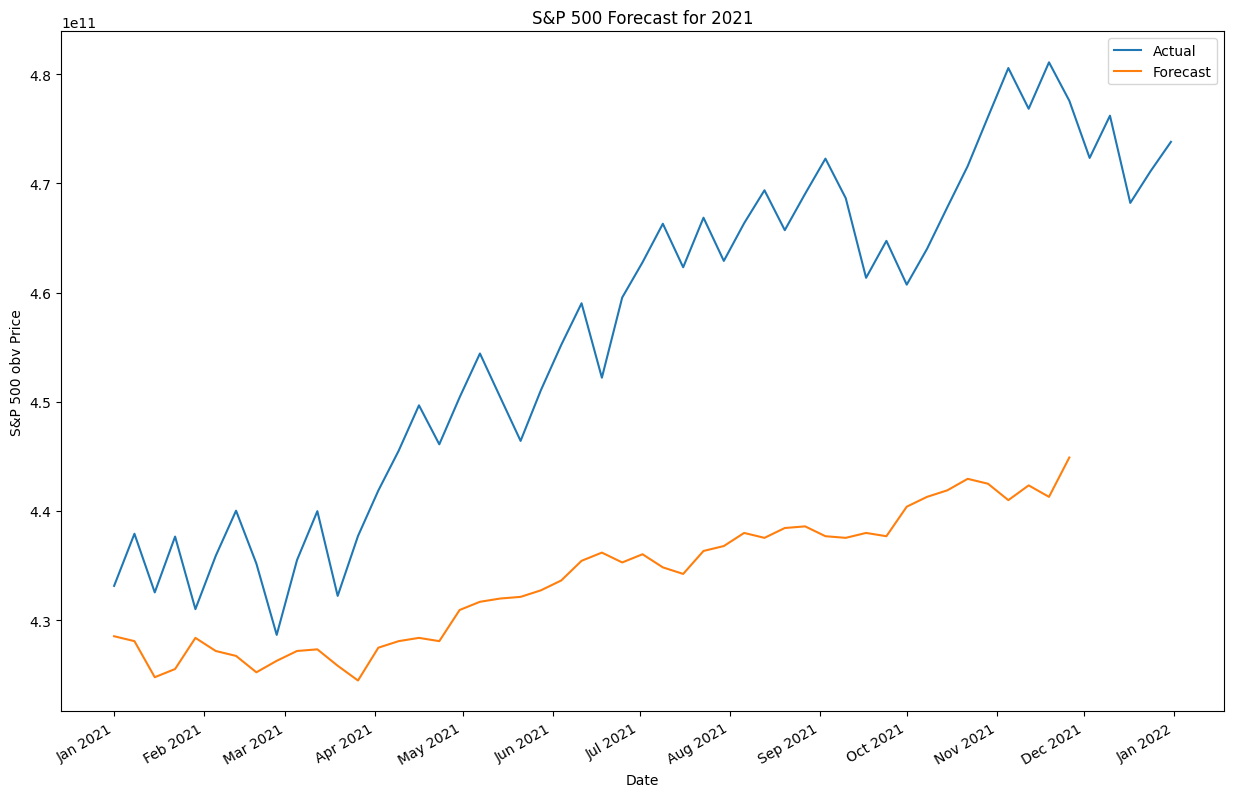

Average Error Rate: 4.59%


In [30]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2021, train_years=[60, 40, 20, 1], forecast_months=1, month_offset=11) 

### 2022

actual_values [4.6961428e+11 4.6527579e+11 4.5968669e+11 4.6471778e+11 4.6942407e+11
 4.6417257e+11 4.5946451e+11 4.6464157e+11 4.5884419e+11 4.5390555e+11
 4.6218398e+11 4.6648900e+11 4.7105194e+11 4.6696874e+11 4.6288565e+11
 4.5823371e+11 4.5314968e+11 4.4803274e+11 4.4284940e+11 4.3771867e+11
 4.4209429e+11 4.3838318e+11 4.3349354e+11 4.2497280e+11 4.3309306e+11
 4.2904611e+11 4.3256773e+11 4.2842393e+11 4.3240317e+11 4.3701953e+11
 4.4110547e+11 4.4489348e+11 4.4113214e+11 4.3729939e+11 4.3363354e+11
 4.3753548e+11 4.2958083e+11 4.2443656e+11 4.1879120e+11 4.2324086e+11
 4.1899783e+11 4.2407585e+11 4.2853526e+11 4.2313508e+11 4.2872839e+11
 4.2469103e+11 4.2639749e+11]
predicted_values [4.75597472e+11 4.76601483e+11 4.75597439e+11 4.76601450e+11
 4.78609506e+11 4.75932033e+11 4.75095269e+11 4.73589252e+11
 4.74928022e+11 4.75429962e+11 4.75262714e+11 4.77438149e+11
 4.78442226e+11 4.80115753e+11 4.80617791e+11 4.79780995e+11
 4.81956463e+11 4.82793292e+11 4.80785039e+11 4.82793292

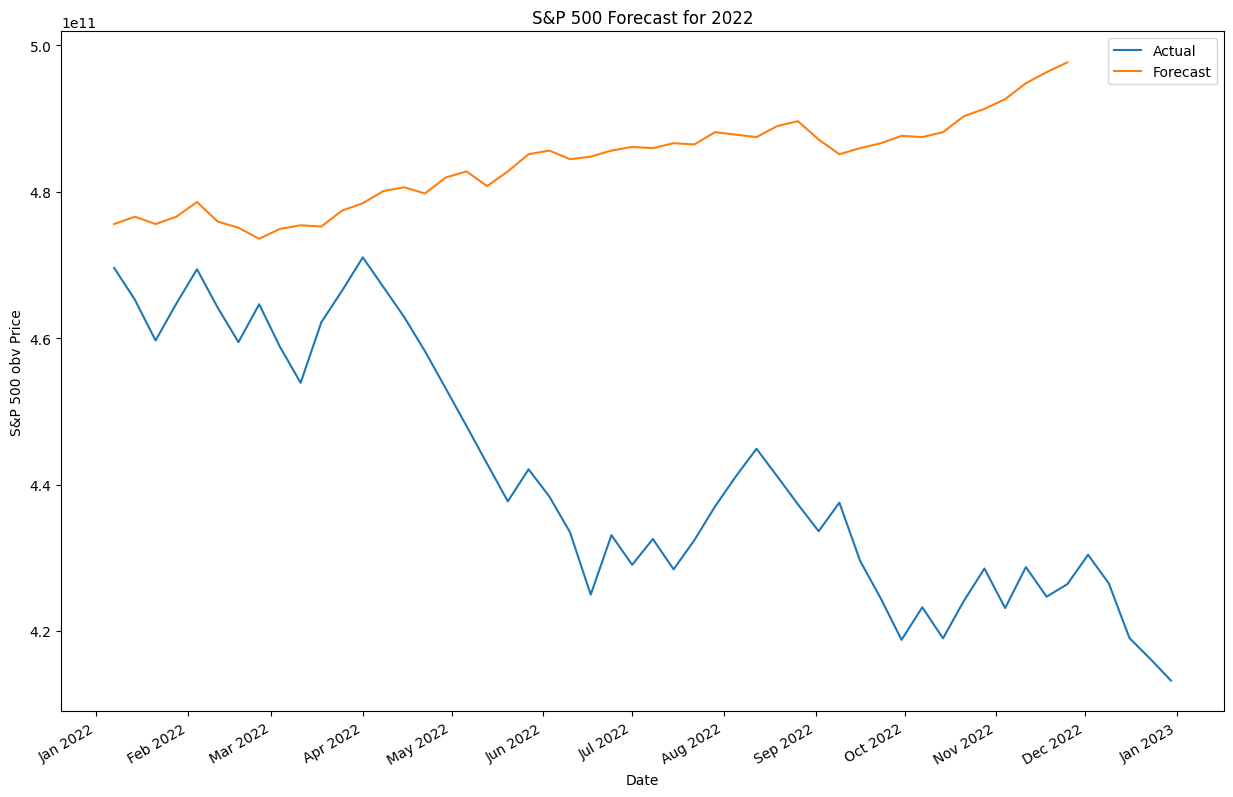

Average Error Rate: 9.33%


In [29]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2022, train_years=[60, 40, 20, 1], forecast_months=1, month_offset=11) 

### 2023

actual_values [4.1715260e+11 4.2109230e+11 4.1707894e+11 4.2098670e+11 4.2568121e+11
 4.2178969e+11 4.1774421e+11 4.1386651e+11 4.1795124e+11 4.1243305e+11
 4.2178733e+11 4.2637130e+11 4.3089642e+11 4.2740973e+11 4.3098542e+11
 4.2737367e+11 4.3146147e+11 4.2727520e+11 4.2374146e+11 4.2778336e+11
 4.3149882e+11 4.3595302e+11 4.3973953e+11 4.4658813e+11 4.4053451e+11
 4.4445796e+11 4.4082748e+11 4.4447493e+11 4.4804512e+11 4.5202613e+11
 4.4788282e+11 4.4412953e+11 4.4018913e+11 4.4348531e+11 4.4673157e+11
 4.4347228e+11 4.3654005e+11 4.3319048e+11 4.2932452e+11 4.3322655e+11
 4.3679311e+11 4.3278908e+11 4.2876958e+11 4.3334054e+11 4.3700562e+11
 4.4078286e+11 4.4242236e+11]
predicted_values [4.10309755e+11 4.13059219e+11 4.15808553e+11 4.16940687e+11
 4.18234565e+11 4.18234532e+11 4.18557985e+11 4.18881438e+11
 4.20822221e+11 4.19528409e+11 4.19204989e+11 4.20822319e+11
 4.20660576e+11 4.19851862e+11 4.19690152e+11 4.18719793e+11
 4.17911144e+11 4.16293814e+11 4.15323455e+11 4.11603665

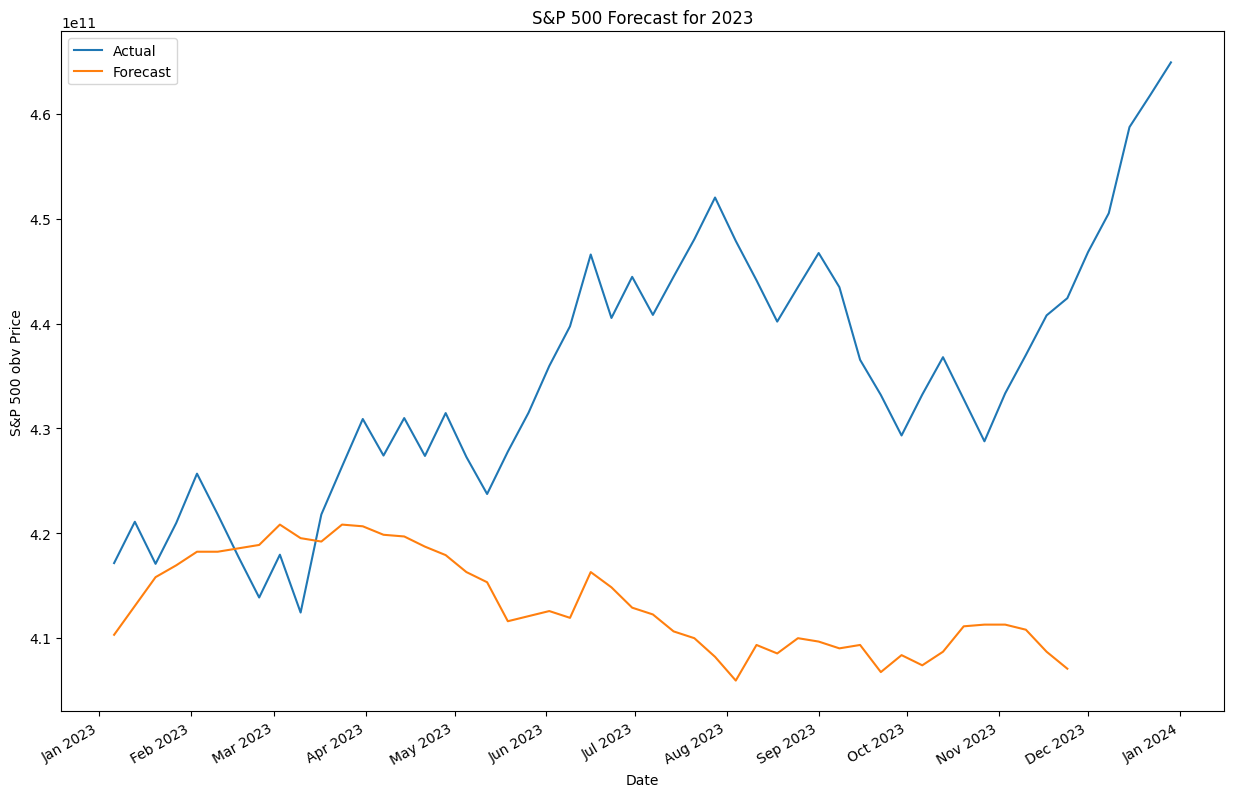

Average Error Rate: 4.57%


In [28]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2023, train_years=[60, 40, 20, 1], forecast_months=1, month_offset=11) 
# forecast_month=1 actually means 1 year because month offset is 11

### 2024 

actual_values [4.6107393e+11 4.6456027e+11 4.6884747e+11 4.7220087e+11 4.7617522e+11
 4.8008821e+11 4.7625494e+11 4.7992773e+11 4.8467584e+11 4.8046697e+11
 4.7271330e+11 4.7608800e+11 4.8008627e+11 4.7669949e+11 4.7273627e+11
 4.6885752e+11 4.7246166e+11 4.7638665e+11 4.8000455e+11 4.8358267e+11
 4.8658818e+11 4.8115102e+11 4.8484378e+11 4.8828243e+11 4.9505623e+11
 4.8785701e+11 4.9111009e+11 4.9481037e+11 4.9104980e+11 4.8741103e+11
 4.8225458e+11 4.7873818e+11 4.8209587e+11 4.8538781e+11 4.8957366e+11
 4.8575086e+11 4.8925165e+11 4.9711891e+11 5.0101744e+11]
predicted_values [4.67326206e+11 4.65891295e+11 4.68442317e+11 4.69398979e+11
 4.68761084e+11 4.66688410e+11 4.66529026e+11 4.66369577e+11
 4.66210095e+11 4.66050679e+11 4.66369544e+11 4.66050679e+11
 4.64296772e+11 4.63499592e+11 4.64456188e+11 4.65093984e+11
 4.65731748e+11 4.67485655e+11 4.67166757e+11 4.67804455e+11
 4.66847859e+11 4.66529026e+11 4.66528961e+11 4.68282868e+11
 4.68920631e+11 4.70993338e+11 4.71790617e+11 4.

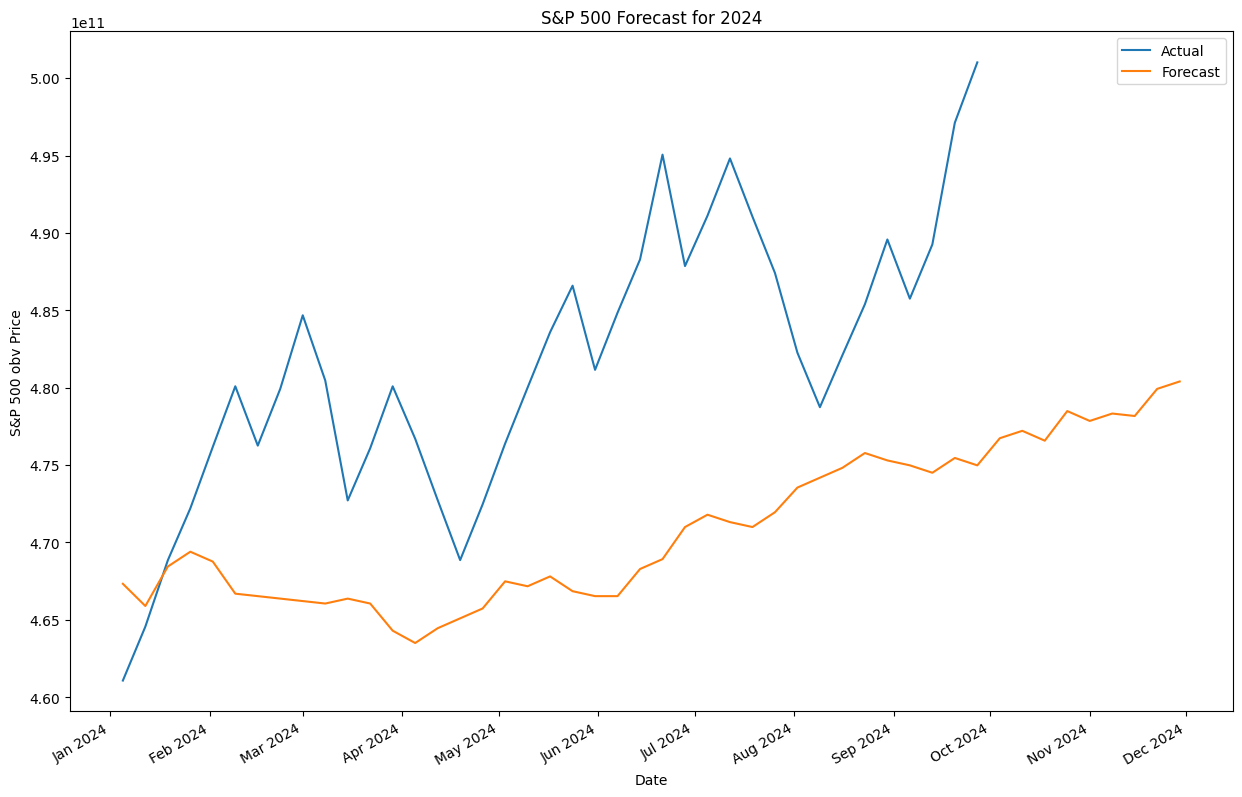

In [27]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2024, train_years=[60, 40, 20, 1], forecast_months=1, month_offset=11)

actual_values [4697.24023438 4783.83007812 4839.81005859 4890.97021484]
predicted_values [4782.14599609 4782.14599609 4829.33911133 4797.87768555]


actual_values [4958.60986328 5026.60986328 5005.56982422 5088.79980469]
predicted_values [4884.24462891 4916.16601562 4916.16601562 4916.16601562]


actual_values [5137.08007812 5123.68994141 5117.08984375 5234.18017578 5254.35009766]
predicted_values [5096.12646484 5096.12890625 5096.12890625 5161.04736328 5193.50488281]


actual_values [5204.33984375 5123.41015625 4967.22998047 5099.95996094]
predicted_values [5294.70263672 5311.3515625  5328.00048828 5328.00048828]


actual_values [5127.79003906 5222.68017578 5303.27001953 5304.72021484 5277.50976562]
predicted_values [5110.25146484 5076.40625    5144.09399414 5110.25146484 5161.01416016]


actual_values [5346.99023438 5431.60009766 5464.62011719 5460.47998047]
predicted_values [5300.21850586 5317.48193359 5317.48193359 5317.48193359]


actual_values [5567.18994141 5615.35009766 5505.         5459.10009766]
predicted_values [5453.06054688 5470.64990234 5435.46899414 5435.46899414]
actual_values [5346.56005859 5344.16015625 5554.25       5634.60986328 5648.39990234]
predicted_values [5471.65087891 5507.41113281 5507.41113281 5525.29345703 5561.0559082 ]


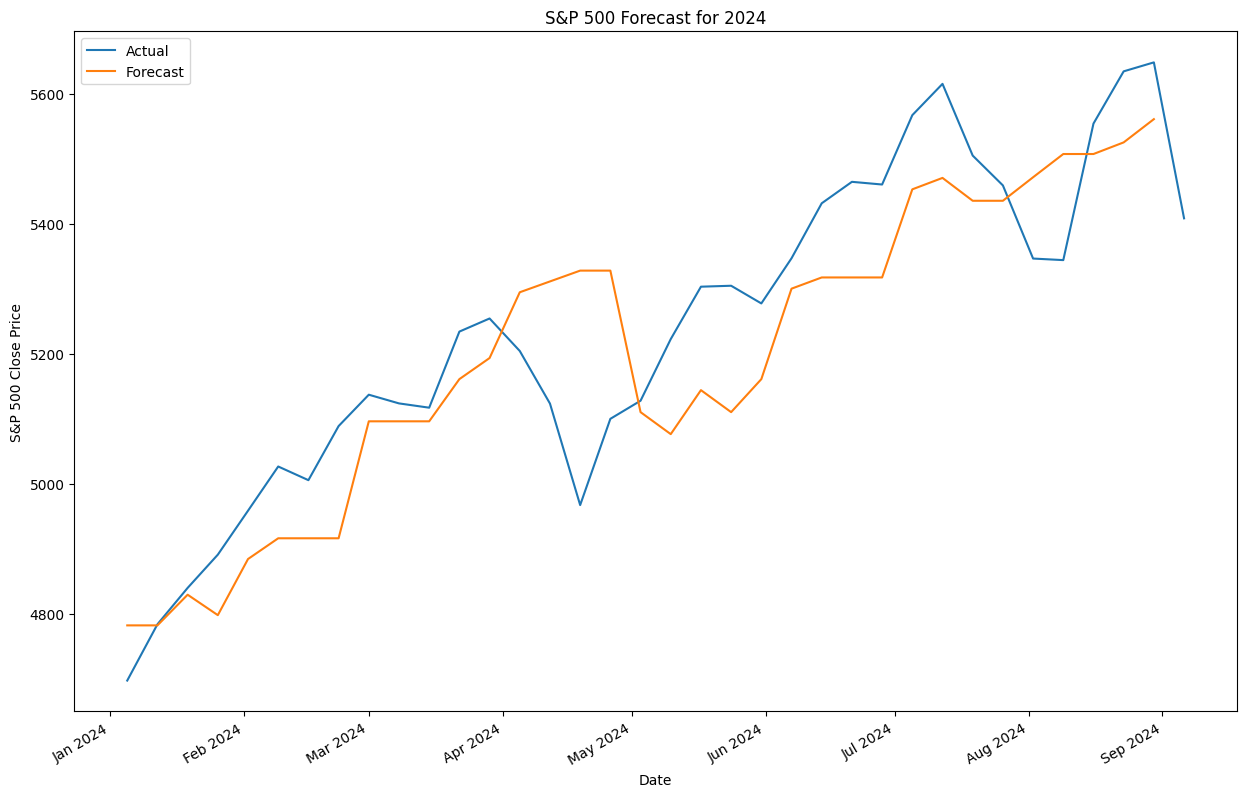

Average Error Rate: 2.04%


In [80]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2024, train_years=[60, 40, 20, 1], forecast_months=8)

## 10

### 2024 10

actual_values [4697.24023438 4783.83007812 4839.81005859 4890.97021484]
predicted_values [4761.93652344 4797.65161133 4785.74755859 4857.17822266]


actual_values [4958.60986328 5026.60986328 5005.56982422 5088.79980469]
predicted_values [4936.75463867 4912.73144531 4900.72070312 4924.7421875 ]


actual_values [5137.08007812 5123.68994141 5117.08984375 5234.18017578 5254.35009766]
predicted_values [5060.79516602 5097.37841797 5133.96337891 5097.37841797 5146.15722656]


actual_values [5204.33984375 5123.41015625 4967.22998047 5099.95996094]
predicted_values [5278.67919922 5291.1887207  5303.69824219 5328.71386719]


actual_values [5127.79003906 5222.68017578 5303.27001953 5304.72021484 5277.50976562]
predicted_values [5122.39550781 5160.43554688 5160.43554688 5173.11572266 5185.79394531]


actual_values [5346.99023438 5431.60009766 5464.62011719 5460.47998047]
predicted_values [5320.88061523 5320.88061523 5307.93359375 5307.93359375]


actual_values [5567.18994141 5615.35009766 5505.         5459.10009766]
predicted_values [5422.51708984 5422.51708984 5422.51708984 5474.90869141]
actual_values [5346.56005859 5344.16015625 5554.25       5634.60986328 5648.39990234]
predicted_values [5471.51855469 5471.51855469 5471.51855469 5524.38330078 5537.60058594]


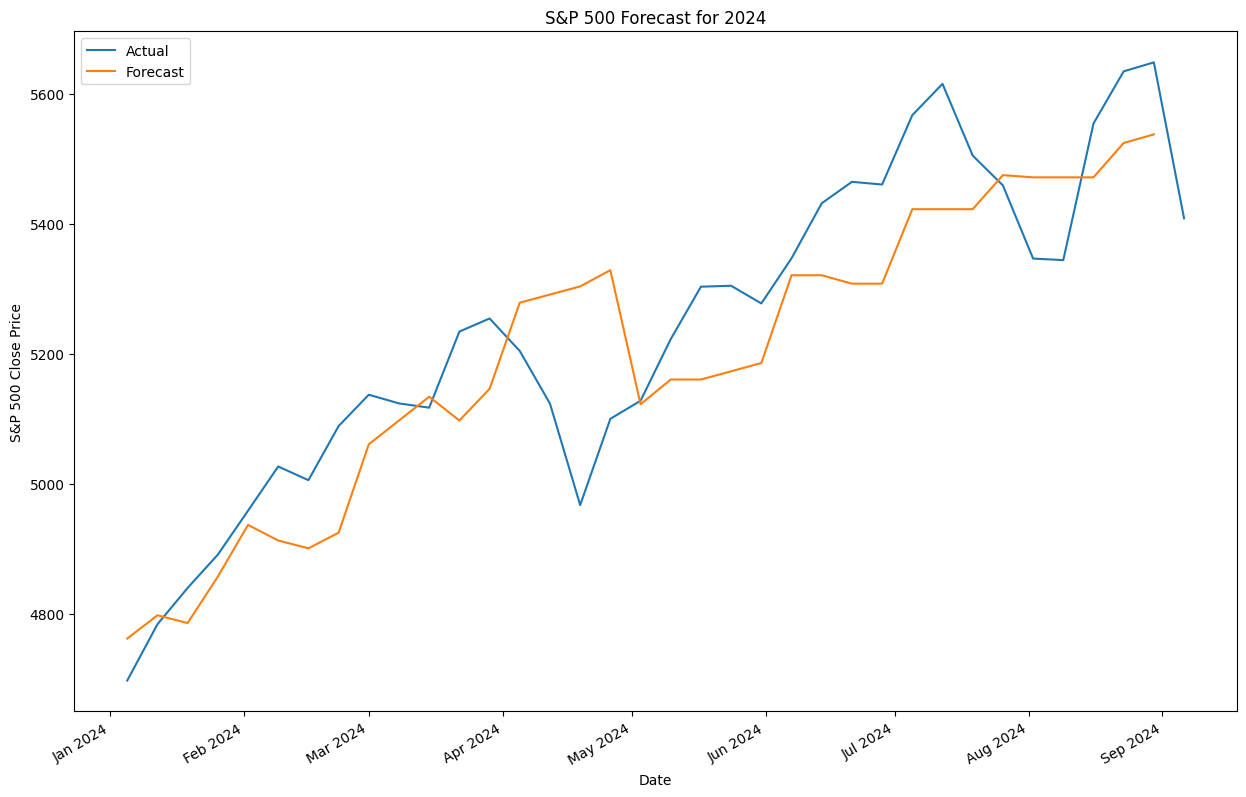

Average Error Rate: 1.99%


In [28]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2024, train_all_years=False, every_10=True, forecast_months=8)

## corr

### 2024 corr

actual_values [4697.24023438 4783.83007812 4839.81005859 4890.97021484]
predicted_values [4782.14599609 4782.14599609 4829.33911133 4797.87768555]
Top correlated years: [(1976, 0.998865872163599), (1937, 0.9962185706296909), (1964, 0.9955417710326131)]


actual_values [4958.60986328 5026.60986328 5005.56982422 5088.79980469]
predicted_values [4884.24462891 4916.16601562 4916.16601562 4916.16601562]
Top correlated years: [(1987, 0.9877159623908983), (1995, 0.9759612979678567), (1943, 0.9735068088483687)]


actual_values [5137.08007812 5123.68994141 5117.08984375 5234.18017578 5254.35009766]
predicted_values [5096.12646484 5096.12890625 5096.12890625 5161.04736328 5193.50488281]


Top correlated years: [(1987, 0.9838595539156765), (1961, 0.9787578004521845), (1995, 0.9747133271123244)]
actual_values [5204.33984375 5123.41015625 4967.22998047 5099.95996094]
predicted_values [5294.70263672 5311.3515625  5328.00048828 5328.00048828]
Top correlated years: [(1987, 0.9557495206938732), (2012, 0.925360955531544), (1991, 0.8437494913471815)]


actual_values [5127.79003906 5222.68017578 5303.27001953 5304.72021484 5277.50976562]
predicted_values [5110.25146484 5076.40625    5144.09399414 5110.25146484 5161.01416016]
Top correlated years: [(1943, 0.8815404108435393), (1961, 0.8780898983675498), (1987, 0.8677097259418791)]


actual_values [5346.99023438 5431.60009766 5464.62011719 5460.47998047]
predicted_values [5300.21850586 5317.48193359 5317.48193359 5317.48193359]
Top correlated years: [(1943, 0.9119664738790763), (1995, 0.905028905908501), (1987, 0.9007690184418151)]


actual_values [5567.18994141 5615.35009766 5505.         5459.10009766]
predicted_values [5453.06054688 5470.64990234 5435.46899414 5435.46899414]
Top correlated years: [(1995, 0.9340910132757502), (1943, 0.9317314453338895), (1987, 0.918679888552798)]


actual_values [5346.56005859 5344.16015625 5554.25       5634.60986328 5648.39990234]
predicted_values [5471.65087891 5507.41113281 5507.41113281 5525.29345703 5561.0559082 ]


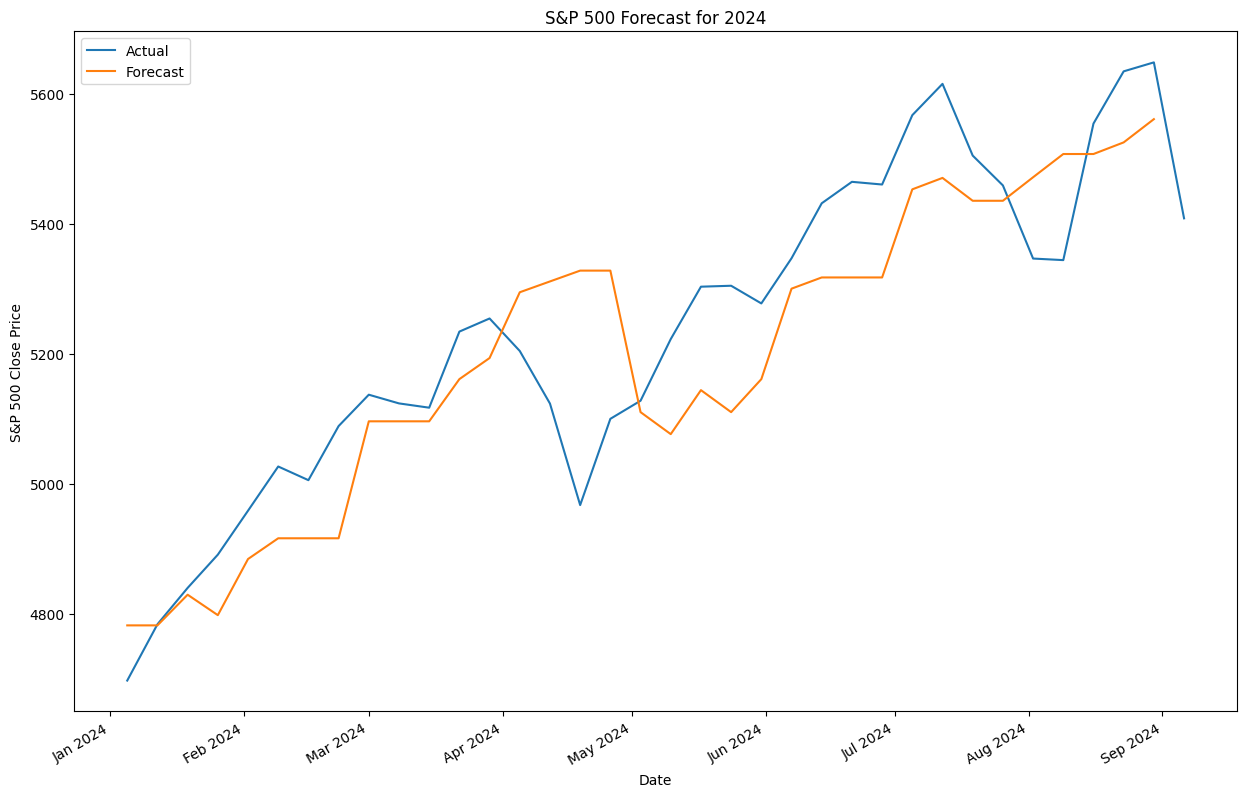

Average Error Rate: 2.04%


In [72]:
forecast, errors = forecast_sp500(sp500_filled_week, forecast_year=2024, forecast_months=8, find_most_correlated=True)